In [1]:
from cc.env import make_env
from cc.examples.neural_ode_model_compact_example import make_neural_ode_model
from cc.train import (
    ModelControllerTrainer, 
    Tracker, make_dataloader, 
    UnsupervisedDataset
)
import jax.random as jrand
import optax
import jax.numpy as jnp
import equinox as eqx
from cc.env.sample_envs import TWO_SEGMENT_V1

/home/simon/miniforge3/envs/chain_control/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
time_limit = 10.0
control_timestep = 0.01

env = make_env(TWO_SEGMENT_V1, time_limit=time_limit, control_timestep=control_timestep, random=1)

In [3]:
# make sure this definition matches exactly (!) the
# definition as it was used in notebook 3
model = make_neural_ode_model(
    env.action_spec(),
    env.observation_spec(),
    env.control_timestep,
    state_dim=50,
    f_depth=0, 
    u_transform=jnp.arctan
)

In [4]:
# trained in notebook 3
fitted_model = eqx.tree_deserialise_leaves("model.eqx", model)

# Training a controller

In [5]:
from cc.train import TrainingOptionsController
from cc.examples.neural_ode_controller_compact_example import make_neural_ode_controller
from cc.env.collect.collect import collect_random_step_source
from cc.env.wrappers import AddRefSignalRewardFnWrapper

source = collect_random_step_source(env, seeds=list(range(30)))
env_w_source = AddRefSignalRewardFnWrapper(env, source)

In [6]:
controller = make_neural_ode_controller(
    env_w_source.observation_spec(),
    env.action_spec(),
    env.control_timestep,
    5,
    f_depth=0
)

In [7]:
controller_dataloader = make_dataloader(
    UnsupervisedDataset(source.get_references_for_optimisation()),
    jrand.PRNGKey(1,),
    n_minibatches=5
)

optimizer = optax.chain(optax.clip_by_global_norm(1.0), optax.adam(1e-3))

controller_train_options = TrainingOptionsController(
    controller_dataloader, optimizer, 
)

controller_trainer = ModelControllerTrainer(
    fitted_model, controller, controller_train_options=controller_train_options, 
    trackers=[Tracker("loss")]
)

This model has been registered with model name `model0`.
                    When using multiple models individual model names have to
                    be provided by passing a dictionary in the `model` argument


In [8]:
controller_trainer.run(500)


  0%|                                                                                                                              | 0/500 [00:00<?, ?it/s]


loss:    27.1290 | loss_without_regu:    27.1290 | model0_train_mse:    27.1290 | train_loss:    27.1290 | :   0%|                 | 0/500 [00:03<?, ?it/s]


loss:    27.1290 | loss_without_regu:    27.1290 | model0_train_mse:    27.1290 | train_loss:    27.1290 | :   0%|         | 1/500 [00:03<27:00,  3.25s/it]


loss:    21.3217 | loss_without_regu:    21.3217 | model0_train_mse:    21.3217 | train_loss:    21.3217 | :   0%|         | 1/500 [00:06<27:00,  3.25s/it]


loss:    21.3217 | loss_without_regu:    21.3217 | model0_train_mse:    21.3217 | train_loss:    21.3217 | :   0%|         | 2/500 [00:06<29:11,  3.52s/it]


loss:    18.2464 | loss_without_regu:    18.2464 | model0_train_mse:    18.2464 | train_loss:    18.2464 | :   0%|         | 2/500 [00:07<29:11,  3.52s/it]


loss:    15.7470 | loss_without_regu:    15.7470 | model0_train_mse:    15.7470 | train_loss:    15.7470 | :   0%|         | 2/500 [00:07<29:11,  3.52s/it]


loss:    15.7470 | loss_without_regu:    15.7470 | model0_train_mse:    15.7470 | train_loss:    15.7470 | :   1%|         | 4/500 [00:07<11:21,  1.37s/it]


loss:    13.4829 | loss_without_regu:    13.4829 | model0_train_mse:    13.4829 | train_loss:    13.4829 | :   1%|         | 4/500 [00:07<11:21,  1.37s/it]


loss:    11.5559 | loss_without_regu:    11.5559 | model0_train_mse:    11.5559 | train_loss:    11.5559 | :   1%|         | 4/500 [00:07<11:21,  1.37s/it]


loss:    11.5559 | loss_without_regu:    11.5559 | model0_train_mse:    11.5559 | train_loss:    11.5559 | :   1%|         | 6/500 [00:07<06:20,  1.30it/s]


loss:     9.7429 | loss_without_regu:     9.7429 | model0_train_mse:     9.7429 | train_loss:     9.7429 | :   1%|         | 6/500 [00:07<06:20,  1.30it/s]


loss:     8.2336 | loss_without_regu:     8.2336 | model0_train_mse:     8.2336 | train_loss:     8.2336 | :   1%|         | 6/500 [00:07<06:20,  1.30it/s]


loss:     8.2336 | loss_without_regu:     8.2336 | model0_train_mse:     8.2336 | train_loss:     8.2336 | :   2%|▏        | 8/500 [00:07<04:05,  2.00it/s]


loss:     7.0585 | loss_without_regu:     7.0585 | model0_train_mse:     7.0585 | train_loss:     7.0585 | :   2%|▏        | 8/500 [00:07<04:05,  2.00it/s]


loss:     5.9430 | loss_without_regu:     5.9430 | model0_train_mse:     5.9430 | train_loss:     5.9430 | :   2%|▏        | 8/500 [00:07<04:05,  2.00it/s]


loss:     5.9430 | loss_without_regu:     5.9430 | model0_train_mse:     5.9430 | train_loss:     5.9430 | :   2%|▏       | 10/500 [00:07<02:52,  2.83it/s]


loss:     5.1156 | loss_without_regu:     5.1156 | model0_train_mse:     5.1156 | train_loss:     5.1156 | :   2%|▏       | 10/500 [00:07<02:52,  2.83it/s]


loss:     4.3854 | loss_without_regu:     4.3854 | model0_train_mse:     4.3854 | train_loss:     4.3854 | :   2%|▏       | 10/500 [00:07<02:52,  2.83it/s]


loss:     4.3854 | loss_without_regu:     4.3854 | model0_train_mse:     4.3854 | train_loss:     4.3854 | :   2%|▏       | 12/500 [00:07<02:09,  3.76it/s]


loss:     3.7863 | loss_without_regu:     3.7863 | model0_train_mse:     3.7863 | train_loss:     3.7863 | :   2%|▏       | 12/500 [00:08<02:09,  3.76it/s]


loss:     3.2985 | loss_without_regu:     3.2985 | model0_train_mse:     3.2985 | train_loss:     3.2985 | :   2%|▏       | 12/500 [00:08<02:09,  3.76it/s]


loss:     3.2985 | loss_without_regu:     3.2985 | model0_train_mse:     3.2985 | train_loss:     3.2985 | :   3%|▏       | 14/500 [00:08<01:42,  4.75it/s]


loss:     2.8373 | loss_without_regu:     2.8373 | model0_train_mse:     2.8373 | train_loss:     2.8373 | :   3%|▏       | 14/500 [00:08<01:42,  4.75it/s]


loss:     2.5094 | loss_without_regu:     2.5094 | model0_train_mse:     2.5094 | train_loss:     2.5094 | :   3%|▏       | 14/500 [00:08<01:42,  4.75it/s]


loss:     2.5094 | loss_without_regu:     2.5094 | model0_train_mse:     2.5094 | train_loss:     2.5094 | :   3%|▎       | 16/500 [00:08<01:24,  5.72it/s]


loss:     2.2408 | loss_without_regu:     2.2408 | model0_train_mse:     2.2408 | train_loss:     2.2408 | :   3%|▎       | 16/500 [00:08<01:24,  5.72it/s]


loss:     2.0537 | loss_without_regu:     2.0537 | model0_train_mse:     2.0537 | train_loss:     2.0537 | :   3%|▎       | 16/500 [00:08<01:24,  5.72it/s]


loss:     2.0537 | loss_without_regu:     2.0537 | model0_train_mse:     2.0537 | train_loss:     2.0537 | :   4%|▎       | 18/500 [00:08<01:12,  6.63it/s]


loss:     1.9155 | loss_without_regu:     1.9155 | model0_train_mse:     1.9155 | train_loss:     1.9155 | :   4%|▎       | 18/500 [00:08<01:12,  6.63it/s]


loss:     1.8154 | loss_without_regu:     1.8154 | model0_train_mse:     1.8154 | train_loss:     1.8154 | :   4%|▎       | 18/500 [00:08<01:12,  6.63it/s]


loss:     1.8154 | loss_without_regu:     1.8154 | model0_train_mse:     1.8154 | train_loss:     1.8154 | :   4%|▎       | 20/500 [00:08<01:04,  7.43it/s]


loss:     1.7404 | loss_without_regu:     1.7404 | model0_train_mse:     1.7404 | train_loss:     1.7404 | :   4%|▎       | 20/500 [00:08<01:04,  7.43it/s]


loss:     1.6602 | loss_without_regu:     1.6602 | model0_train_mse:     1.6602 | train_loss:     1.6602 | :   4%|▎       | 20/500 [00:08<01:04,  7.43it/s]


loss:     1.6602 | loss_without_regu:     1.6602 | model0_train_mse:     1.6602 | train_loss:     1.6602 | :   4%|▎       | 22/500 [00:08<00:59,  8.10it/s]


loss:     1.6013 | loss_without_regu:     1.6013 | model0_train_mse:     1.6013 | train_loss:     1.6013 | :   4%|▎       | 22/500 [00:09<00:59,  8.10it/s]


loss:     1.5370 | loss_without_regu:     1.5370 | model0_train_mse:     1.5370 | train_loss:     1.5370 | :   4%|▎       | 22/500 [00:09<00:59,  8.10it/s]


loss:     1.5370 | loss_without_regu:     1.5370 | model0_train_mse:     1.5370 | train_loss:     1.5370 | :   5%|▍       | 24/500 [00:09<00:55,  8.63it/s]


loss:     1.4685 | loss_without_regu:     1.4685 | model0_train_mse:     1.4685 | train_loss:     1.4685 | :   5%|▍       | 24/500 [00:09<00:55,  8.63it/s]


loss:     1.4267 | loss_without_regu:     1.4267 | model0_train_mse:     1.4267 | train_loss:     1.4267 | :   5%|▍       | 24/500 [00:09<00:55,  8.63it/s]


loss:     1.4267 | loss_without_regu:     1.4267 | model0_train_mse:     1.4267 | train_loss:     1.4267 | :   5%|▍       | 26/500 [00:09<00:52,  9.06it/s]


loss:     1.4338 | loss_without_regu:     1.4338 | model0_train_mse:     1.4338 | train_loss:     1.4338 | :   5%|▍       | 26/500 [00:09<00:52,  9.06it/s]


loss:     1.3651 | loss_without_regu:     1.3651 | model0_train_mse:     1.3651 | train_loss:     1.3651 | :   5%|▍       | 26/500 [00:09<00:52,  9.06it/s]


loss:     1.3651 | loss_without_regu:     1.3651 | model0_train_mse:     1.3651 | train_loss:     1.3651 | :   6%|▍       | 28/500 [00:09<00:50,  9.36it/s]


loss:     1.3341 | loss_without_regu:     1.3341 | model0_train_mse:     1.3341 | train_loss:     1.3341 | :   6%|▍       | 28/500 [00:09<00:50,  9.36it/s]


loss:     1.2914 | loss_without_regu:     1.2914 | model0_train_mse:     1.2914 | train_loss:     1.2914 | :   6%|▍       | 28/500 [00:09<00:50,  9.36it/s]


loss:     1.2914 | loss_without_regu:     1.2914 | model0_train_mse:     1.2914 | train_loss:     1.2914 | :   6%|▍       | 30/500 [00:09<00:49,  9.59it/s]


loss:     1.2620 | loss_without_regu:     1.2620 | model0_train_mse:     1.2620 | train_loss:     1.2620 | :   6%|▍       | 30/500 [00:09<00:49,  9.59it/s]


loss:     1.2570 | loss_without_regu:     1.2570 | model0_train_mse:     1.2570 | train_loss:     1.2570 | :   6%|▍       | 30/500 [00:09<00:49,  9.59it/s]


loss:     1.2570 | loss_without_regu:     1.2570 | model0_train_mse:     1.2570 | train_loss:     1.2570 | :   6%|▌       | 32/500 [00:09<00:48,  9.66it/s]


loss:     1.2252 | loss_without_regu:     1.2252 | model0_train_mse:     1.2252 | train_loss:     1.2252 | :   6%|▌       | 32/500 [00:10<00:48,  9.66it/s]


loss:     1.1976 | loss_without_regu:     1.1976 | model0_train_mse:     1.1976 | train_loss:     1.1976 | :   6%|▌       | 32/500 [00:10<00:48,  9.66it/s]


loss:     1.1976 | loss_without_regu:     1.1976 | model0_train_mse:     1.1976 | train_loss:     1.1976 | :   7%|▌       | 34/500 [00:10<00:47,  9.73it/s]


loss:     1.1858 | loss_without_regu:     1.1858 | model0_train_mse:     1.1858 | train_loss:     1.1858 | :   7%|▌       | 34/500 [00:10<00:47,  9.73it/s]


loss:     1.1858 | loss_without_regu:     1.1858 | model0_train_mse:     1.1858 | train_loss:     1.1858 | :   7%|▌       | 35/500 [00:10<00:47,  9.75it/s]


loss:     1.1636 | loss_without_regu:     1.1636 | model0_train_mse:     1.1636 | train_loss:     1.1636 | :   7%|▌       | 35/500 [00:10<00:47,  9.75it/s]


loss:     1.1636 | loss_without_regu:     1.1636 | model0_train_mse:     1.1636 | train_loss:     1.1636 | :   7%|▌       | 36/500 [00:10<00:47,  9.76it/s]


loss:     1.1292 | loss_without_regu:     1.1292 | model0_train_mse:     1.1292 | train_loss:     1.1292 | :   7%|▌       | 36/500 [00:10<00:47,  9.76it/s]


loss:     1.1292 | loss_without_regu:     1.1292 | model0_train_mse:     1.1292 | train_loss:     1.1292 | :   7%|▌       | 37/500 [00:10<00:47,  9.77it/s]


loss:     1.0988 | loss_without_regu:     1.0988 | model0_train_mse:     1.0988 | train_loss:     1.0988 | :   7%|▌       | 37/500 [00:10<00:47,  9.77it/s]


loss:     1.0988 | loss_without_regu:     1.0988 | model0_train_mse:     1.0988 | train_loss:     1.0988 | :   8%|▌       | 38/500 [00:10<00:47,  9.80it/s]


loss:     1.0834 | loss_without_regu:     1.0834 | model0_train_mse:     1.0834 | train_loss:     1.0834 | :   8%|▌       | 38/500 [00:10<00:47,  9.80it/s]


loss:     1.0834 | loss_without_regu:     1.0834 | model0_train_mse:     1.0834 | train_loss:     1.0834 | :   8%|▌       | 39/500 [00:10<00:46,  9.81it/s]


loss:     1.0620 | loss_without_regu:     1.0620 | model0_train_mse:     1.0620 | train_loss:     1.0620 | :   8%|▌       | 39/500 [00:10<00:46,  9.81it/s]


loss:     1.0620 | loss_without_regu:     1.0620 | model0_train_mse:     1.0620 | train_loss:     1.0620 | :   8%|▋       | 40/500 [00:10<00:46,  9.82it/s]


loss:     1.0544 | loss_without_regu:     1.0544 | model0_train_mse:     1.0544 | train_loss:     1.0544 | :   8%|▋       | 40/500 [00:10<00:46,  9.82it/s]


loss:     1.0544 | loss_without_regu:     1.0544 | model0_train_mse:     1.0544 | train_loss:     1.0544 | :   8%|▋       | 41/500 [00:10<00:46,  9.84it/s]


loss:     1.0436 | loss_without_regu:     1.0436 | model0_train_mse:     1.0436 | train_loss:     1.0436 | :   8%|▋       | 41/500 [00:10<00:46,  9.84it/s]


loss:     1.0436 | loss_without_regu:     1.0436 | model0_train_mse:     1.0436 | train_loss:     1.0436 | :   8%|▋       | 42/500 [00:10<00:46,  9.84it/s]


loss:     1.0306 | loss_without_regu:     1.0306 | model0_train_mse:     1.0306 | train_loss:     1.0306 | :   8%|▋       | 42/500 [00:11<00:46,  9.84it/s]


loss:     1.0306 | loss_without_regu:     1.0306 | model0_train_mse:     1.0306 | train_loss:     1.0306 | :   9%|▋       | 43/500 [00:11<00:46,  9.84it/s]


loss:     1.0204 | loss_without_regu:     1.0204 | model0_train_mse:     1.0204 | train_loss:     1.0204 | :   9%|▋       | 43/500 [00:11<00:46,  9.84it/s]


loss:     1.0204 | loss_without_regu:     1.0204 | model0_train_mse:     1.0204 | train_loss:     1.0204 | :   9%|▋       | 44/500 [00:11<00:46,  9.84it/s]


loss:     1.0095 | loss_without_regu:     1.0095 | model0_train_mse:     1.0095 | train_loss:     1.0095 | :   9%|▋       | 44/500 [00:11<00:46,  9.84it/s]


loss:     1.0095 | loss_without_regu:     1.0095 | model0_train_mse:     1.0095 | train_loss:     1.0095 | :   9%|▋       | 45/500 [00:11<00:46,  9.86it/s]


loss:     0.9952 | loss_without_regu:     0.9952 | model0_train_mse:     0.9952 | train_loss:     0.9952 | :   9%|▋       | 45/500 [00:11<00:46,  9.86it/s]


loss:     0.9952 | loss_without_regu:     0.9952 | model0_train_mse:     0.9952 | train_loss:     0.9952 | :   9%|▋       | 46/500 [00:11<00:46,  9.86it/s]


loss:     0.9794 | loss_without_regu:     0.9794 | model0_train_mse:     0.9794 | train_loss:     0.9794 | :   9%|▋       | 46/500 [00:11<00:46,  9.86it/s]


loss:     0.9794 | loss_without_regu:     0.9794 | model0_train_mse:     0.9794 | train_loss:     0.9794 | :   9%|▊       | 47/500 [00:11<00:45,  9.88it/s]


loss:     0.9698 | loss_without_regu:     0.9698 | model0_train_mse:     0.9698 | train_loss:     0.9698 | :   9%|▊       | 47/500 [00:11<00:45,  9.88it/s]


loss:     0.9698 | loss_without_regu:     0.9698 | model0_train_mse:     0.9698 | train_loss:     0.9698 | :  10%|▊       | 48/500 [00:11<00:45,  9.85it/s]


loss:     0.9982 | loss_without_regu:     0.9982 | model0_train_mse:     0.9982 | train_loss:     0.9982 | :  10%|▊       | 48/500 [00:11<00:45,  9.85it/s]


loss:     0.9982 | loss_without_regu:     0.9982 | model0_train_mse:     0.9982 | train_loss:     0.9982 | :  10%|▊       | 49/500 [00:11<00:45,  9.84it/s]


loss:     0.9717 | loss_without_regu:     0.9717 | model0_train_mse:     0.9717 | train_loss:     0.9717 | :  10%|▊       | 49/500 [00:11<00:45,  9.84it/s]


loss:     0.9717 | loss_without_regu:     0.9717 | model0_train_mse:     0.9717 | train_loss:     0.9717 | :  10%|▊       | 50/500 [00:11<00:45,  9.84it/s]


loss:     0.9631 | loss_without_regu:     0.9631 | model0_train_mse:     0.9631 | train_loss:     0.9631 | :  10%|▊       | 50/500 [00:11<00:45,  9.84it/s]


loss:     0.9631 | loss_without_regu:     0.9631 | model0_train_mse:     0.9631 | train_loss:     0.9631 | :  10%|▊       | 51/500 [00:11<00:45,  9.86it/s]


loss:     0.9500 | loss_without_regu:     0.9500 | model0_train_mse:     0.9500 | train_loss:     0.9500 | :  10%|▊       | 51/500 [00:11<00:45,  9.86it/s]


loss:     0.9500 | loss_without_regu:     0.9500 | model0_train_mse:     0.9500 | train_loss:     0.9500 | :  10%|▊       | 52/500 [00:11<00:45,  9.87it/s]


loss:     0.9277 | loss_without_regu:     0.9277 | model0_train_mse:     0.9277 | train_loss:     0.9277 | :  10%|▊       | 52/500 [00:12<00:45,  9.87it/s]


loss:     0.9277 | loss_without_regu:     0.9277 | model0_train_mse:     0.9277 | train_loss:     0.9277 | :  11%|▊       | 53/500 [00:12<00:45,  9.86it/s]


loss:     0.9300 | loss_without_regu:     0.9300 | model0_train_mse:     0.9300 | train_loss:     0.9300 | :  11%|▊       | 53/500 [00:12<00:45,  9.86it/s]


loss:     0.9300 | loss_without_regu:     0.9300 | model0_train_mse:     0.9300 | train_loss:     0.9300 | :  11%|▊       | 54/500 [00:12<00:45,  9.87it/s]


loss:     0.9206 | loss_without_regu:     0.9206 | model0_train_mse:     0.9206 | train_loss:     0.9206 | :  11%|▊       | 54/500 [00:12<00:45,  9.87it/s]


loss:     0.9206 | loss_without_regu:     0.9206 | model0_train_mse:     0.9206 | train_loss:     0.9206 | :  11%|▉       | 55/500 [00:12<00:45,  9.87it/s]


loss:     0.9100 | loss_without_regu:     0.9100 | model0_train_mse:     0.9100 | train_loss:     0.9100 | :  11%|▉       | 55/500 [00:12<00:45,  9.87it/s]


loss:     0.9100 | loss_without_regu:     0.9100 | model0_train_mse:     0.9100 | train_loss:     0.9100 | :  11%|▉       | 56/500 [00:12<00:45,  9.86it/s]


loss:     0.9055 | loss_without_regu:     0.9055 | model0_train_mse:     0.9055 | train_loss:     0.9055 | :  11%|▉       | 56/500 [00:12<00:45,  9.86it/s]


loss:     0.9055 | loss_without_regu:     0.9055 | model0_train_mse:     0.9055 | train_loss:     0.9055 | :  11%|▉       | 57/500 [00:12<00:44,  9.86it/s]


loss:     0.9035 | loss_without_regu:     0.9035 | model0_train_mse:     0.9035 | train_loss:     0.9035 | :  11%|▉       | 57/500 [00:12<00:44,  9.86it/s]


loss:     0.9035 | loss_without_regu:     0.9035 | model0_train_mse:     0.9035 | train_loss:     0.9035 | :  12%|▉       | 58/500 [00:12<00:44,  9.87it/s]


loss:     0.8925 | loss_without_regu:     0.8925 | model0_train_mse:     0.8925 | train_loss:     0.8925 | :  12%|▉       | 58/500 [00:12<00:44,  9.87it/s]


loss:     0.8925 | loss_without_regu:     0.8925 | model0_train_mse:     0.8925 | train_loss:     0.8925 | :  12%|▉       | 59/500 [00:12<00:44,  9.88it/s]


loss:     0.8783 | loss_without_regu:     0.8783 | model0_train_mse:     0.8783 | train_loss:     0.8783 | :  12%|▉       | 59/500 [00:12<00:44,  9.88it/s]


loss:     0.8783 | loss_without_regu:     0.8783 | model0_train_mse:     0.8783 | train_loss:     0.8783 | :  12%|▉       | 60/500 [00:12<00:44,  9.89it/s]


loss:     0.8719 | loss_without_regu:     0.8719 | model0_train_mse:     0.8719 | train_loss:     0.8719 | :  12%|▉       | 60/500 [00:12<00:44,  9.89it/s]


loss:     0.8719 | loss_without_regu:     0.8719 | model0_train_mse:     0.8719 | train_loss:     0.8719 | :  12%|▉       | 61/500 [00:12<00:44,  9.88it/s]


loss:     0.8690 | loss_without_regu:     0.8690 | model0_train_mse:     0.8690 | train_loss:     0.8690 | :  12%|▉       | 61/500 [00:12<00:44,  9.88it/s]


loss:     0.8690 | loss_without_regu:     0.8690 | model0_train_mse:     0.8690 | train_loss:     0.8690 | :  12%|▉       | 62/500 [00:12<00:44,  9.88it/s]


loss:     0.8707 | loss_without_regu:     0.8707 | model0_train_mse:     0.8707 | train_loss:     0.8707 | :  12%|▉       | 62/500 [00:13<00:44,  9.88it/s]


loss:     0.8707 | loss_without_regu:     0.8707 | model0_train_mse:     0.8707 | train_loss:     0.8707 | :  13%|█       | 63/500 [00:13<00:44,  9.89it/s]


loss:     0.8625 | loss_without_regu:     0.8625 | model0_train_mse:     0.8625 | train_loss:     0.8625 | :  13%|█       | 63/500 [00:13<00:44,  9.89it/s]


loss:     0.8625 | loss_without_regu:     0.8625 | model0_train_mse:     0.8625 | train_loss:     0.8625 | :  13%|█       | 64/500 [00:13<00:44,  9.89it/s]


loss:     0.8535 | loss_without_regu:     0.8535 | model0_train_mse:     0.8535 | train_loss:     0.8535 | :  13%|█       | 64/500 [00:13<00:44,  9.89it/s]


loss:     0.8535 | loss_without_regu:     0.8535 | model0_train_mse:     0.8535 | train_loss:     0.8535 | :  13%|█       | 65/500 [00:13<00:43,  9.89it/s]


loss:     0.8434 | loss_without_regu:     0.8434 | model0_train_mse:     0.8434 | train_loss:     0.8434 | :  13%|█       | 65/500 [00:13<00:43,  9.89it/s]


loss:     0.8434 | loss_without_regu:     0.8434 | model0_train_mse:     0.8434 | train_loss:     0.8434 | :  13%|█       | 66/500 [00:13<00:44,  9.86it/s]


loss:     0.8364 | loss_without_regu:     0.8364 | model0_train_mse:     0.8364 | train_loss:     0.8364 | :  13%|█       | 66/500 [00:13<00:44,  9.86it/s]


loss:     0.8364 | loss_without_regu:     0.8364 | model0_train_mse:     0.8364 | train_loss:     0.8364 | :  13%|█       | 67/500 [00:13<00:43,  9.86it/s]


loss:     0.8301 | loss_without_regu:     0.8301 | model0_train_mse:     0.8301 | train_loss:     0.8301 | :  13%|█       | 67/500 [00:13<00:43,  9.86it/s]


loss:     0.8301 | loss_without_regu:     0.8301 | model0_train_mse:     0.8301 | train_loss:     0.8301 | :  14%|█       | 68/500 [00:13<00:43,  9.85it/s]


loss:     0.8246 | loss_without_regu:     0.8246 | model0_train_mse:     0.8246 | train_loss:     0.8246 | :  14%|█       | 68/500 [00:13<00:43,  9.85it/s]


loss:     0.8246 | loss_without_regu:     0.8246 | model0_train_mse:     0.8246 | train_loss:     0.8246 | :  14%|█       | 69/500 [00:13<00:43,  9.86it/s]


loss:     0.8191 | loss_without_regu:     0.8191 | model0_train_mse:     0.8191 | train_loss:     0.8191 | :  14%|█       | 69/500 [00:13<00:43,  9.86it/s]


loss:     0.8191 | loss_without_regu:     0.8191 | model0_train_mse:     0.8191 | train_loss:     0.8191 | :  14%|█       | 70/500 [00:13<00:43,  9.86it/s]


loss:     0.8128 | loss_without_regu:     0.8128 | model0_train_mse:     0.8128 | train_loss:     0.8128 | :  14%|█       | 70/500 [00:13<00:43,  9.86it/s]


loss:     0.8128 | loss_without_regu:     0.8128 | model0_train_mse:     0.8128 | train_loss:     0.8128 | :  14%|█▏      | 71/500 [00:13<00:43,  9.86it/s]


loss:     0.8298 | loss_without_regu:     0.8298 | model0_train_mse:     0.8298 | train_loss:     0.8298 | :  14%|█▏      | 71/500 [00:13<00:43,  9.86it/s]


loss:     0.8298 | loss_without_regu:     0.8298 | model0_train_mse:     0.8298 | train_loss:     0.8298 | :  14%|█▏      | 72/500 [00:13<00:43,  9.85it/s]


loss:     0.8151 | loss_without_regu:     0.8151 | model0_train_mse:     0.8151 | train_loss:     0.8151 | :  14%|█▏      | 72/500 [00:14<00:43,  9.85it/s]


loss:     0.8151 | loss_without_regu:     0.8151 | model0_train_mse:     0.8151 | train_loss:     0.8151 | :  15%|█▏      | 73/500 [00:14<00:43,  9.86it/s]


loss:     0.8055 | loss_without_regu:     0.8055 | model0_train_mse:     0.8055 | train_loss:     0.8055 | :  15%|█▏      | 73/500 [00:14<00:43,  9.86it/s]


loss:     0.8055 | loss_without_regu:     0.8055 | model0_train_mse:     0.8055 | train_loss:     0.8055 | :  15%|█▏      | 74/500 [00:14<00:43,  9.86it/s]


loss:     0.8065 | loss_without_regu:     0.8065 | model0_train_mse:     0.8065 | train_loss:     0.8065 | :  15%|█▏      | 74/500 [00:14<00:43,  9.86it/s]


loss:     0.8065 | loss_without_regu:     0.8065 | model0_train_mse:     0.8065 | train_loss:     0.8065 | :  15%|█▏      | 75/500 [00:14<00:43,  9.86it/s]


loss:     0.8038 | loss_without_regu:     0.8038 | model0_train_mse:     0.8038 | train_loss:     0.8038 | :  15%|█▏      | 75/500 [00:14<00:43,  9.86it/s]


loss:     0.8038 | loss_without_regu:     0.8038 | model0_train_mse:     0.8038 | train_loss:     0.8038 | :  15%|█▏      | 76/500 [00:14<00:42,  9.86it/s]


loss:     0.8024 | loss_without_regu:     0.8024 | model0_train_mse:     0.8024 | train_loss:     0.8024 | :  15%|█▏      | 76/500 [00:14<00:42,  9.86it/s]


loss:     0.8024 | loss_without_regu:     0.8024 | model0_train_mse:     0.8024 | train_loss:     0.8024 | :  15%|█▏      | 77/500 [00:14<00:42,  9.86it/s]


loss:     0.8123 | loss_without_regu:     0.8123 | model0_train_mse:     0.8123 | train_loss:     0.8123 | :  15%|█▏      | 77/500 [00:14<00:42,  9.86it/s]


loss:     0.8123 | loss_without_regu:     0.8123 | model0_train_mse:     0.8123 | train_loss:     0.8123 | :  16%|█▏      | 78/500 [00:14<00:42,  9.86it/s]


loss:     0.7991 | loss_without_regu:     0.7991 | model0_train_mse:     0.7991 | train_loss:     0.7991 | :  16%|█▏      | 78/500 [00:14<00:42,  9.86it/s]


loss:     0.7991 | loss_without_regu:     0.7991 | model0_train_mse:     0.7991 | train_loss:     0.7991 | :  16%|█▎      | 79/500 [00:14<00:42,  9.87it/s]


loss:     0.7924 | loss_without_regu:     0.7924 | model0_train_mse:     0.7924 | train_loss:     0.7924 | :  16%|█▎      | 79/500 [00:14<00:42,  9.87it/s]


loss:     0.7924 | loss_without_regu:     0.7924 | model0_train_mse:     0.7924 | train_loss:     0.7924 | :  16%|█▎      | 80/500 [00:14<00:42,  9.87it/s]


loss:     0.8021 | loss_without_regu:     0.8021 | model0_train_mse:     0.8021 | train_loss:     0.8021 | :  16%|█▎      | 80/500 [00:14<00:42,  9.87it/s]


loss:     0.8021 | loss_without_regu:     0.8021 | model0_train_mse:     0.8021 | train_loss:     0.8021 | :  16%|█▎      | 81/500 [00:14<00:42,  9.86it/s]


loss:     0.8055 | loss_without_regu:     0.8055 | model0_train_mse:     0.8055 | train_loss:     0.8055 | :  16%|█▎      | 81/500 [00:14<00:42,  9.86it/s]


loss:     0.8055 | loss_without_regu:     0.8055 | model0_train_mse:     0.8055 | train_loss:     0.8055 | :  16%|█▎      | 82/500 [00:14<00:42,  9.86it/s]


loss:     0.8321 | loss_without_regu:     0.8321 | model0_train_mse:     0.8321 | train_loss:     0.8321 | :  16%|█▎      | 82/500 [00:15<00:42,  9.86it/s]


loss:     0.8321 | loss_without_regu:     0.8321 | model0_train_mse:     0.8321 | train_loss:     0.8321 | :  17%|█▎      | 83/500 [00:15<00:42,  9.87it/s]


loss:     0.7874 | loss_without_regu:     0.7874 | model0_train_mse:     0.7874 | train_loss:     0.7874 | :  17%|█▎      | 83/500 [00:15<00:42,  9.87it/s]


loss:     0.7874 | loss_without_regu:     0.7874 | model0_train_mse:     0.7874 | train_loss:     0.7874 | :  17%|█▎      | 84/500 [00:15<00:42,  9.85it/s]


loss:     0.7885 | loss_without_regu:     0.7885 | model0_train_mse:     0.7885 | train_loss:     0.7885 | :  17%|█▎      | 84/500 [00:15<00:42,  9.85it/s]


loss:     0.7885 | loss_without_regu:     0.7885 | model0_train_mse:     0.7885 | train_loss:     0.7885 | :  17%|█▎      | 85/500 [00:15<00:42,  9.86it/s]


loss:     0.7998 | loss_without_regu:     0.7998 | model0_train_mse:     0.7998 | train_loss:     0.7998 | :  17%|█▎      | 85/500 [00:15<00:42,  9.86it/s]


loss:     0.7998 | loss_without_regu:     0.7998 | model0_train_mse:     0.7998 | train_loss:     0.7998 | :  17%|█▍      | 86/500 [00:15<00:41,  9.88it/s]


loss:     0.7852 | loss_without_regu:     0.7852 | model0_train_mse:     0.7852 | train_loss:     0.7852 | :  17%|█▍      | 86/500 [00:15<00:41,  9.88it/s]


loss:     0.7852 | loss_without_regu:     0.7852 | model0_train_mse:     0.7852 | train_loss:     0.7852 | :  17%|█▍      | 87/500 [00:15<00:41,  9.87it/s]


loss:     0.7816 | loss_without_regu:     0.7816 | model0_train_mse:     0.7816 | train_loss:     0.7816 | :  17%|█▍      | 87/500 [00:15<00:41,  9.87it/s]


loss:     0.7816 | loss_without_regu:     0.7816 | model0_train_mse:     0.7816 | train_loss:     0.7816 | :  18%|█▍      | 88/500 [00:15<00:41,  9.88it/s]


loss:     0.7815 | loss_without_regu:     0.7815 | model0_train_mse:     0.7815 | train_loss:     0.7815 | :  18%|█▍      | 88/500 [00:15<00:41,  9.88it/s]


loss:     0.7815 | loss_without_regu:     0.7815 | model0_train_mse:     0.7815 | train_loss:     0.7815 | :  18%|█▍      | 89/500 [00:15<00:41,  9.88it/s]


loss:     0.7837 | loss_without_regu:     0.7837 | model0_train_mse:     0.7837 | train_loss:     0.7837 | :  18%|█▍      | 89/500 [00:15<00:41,  9.88it/s]


loss:     0.7837 | loss_without_regu:     0.7837 | model0_train_mse:     0.7837 | train_loss:     0.7837 | :  18%|█▍      | 90/500 [00:15<00:41,  9.87it/s]


loss:     0.7793 | loss_without_regu:     0.7793 | model0_train_mse:     0.7793 | train_loss:     0.7793 | :  18%|█▍      | 90/500 [00:15<00:41,  9.87it/s]


loss:     0.7793 | loss_without_regu:     0.7793 | model0_train_mse:     0.7793 | train_loss:     0.7793 | :  18%|█▍      | 91/500 [00:15<00:41,  9.88it/s]


loss:     0.7756 | loss_without_regu:     0.7756 | model0_train_mse:     0.7756 | train_loss:     0.7756 | :  18%|█▍      | 91/500 [00:15<00:41,  9.88it/s]


loss:     0.7756 | loss_without_regu:     0.7756 | model0_train_mse:     0.7756 | train_loss:     0.7756 | :  18%|█▍      | 92/500 [00:15<00:41,  9.87it/s]


loss:     0.7842 | loss_without_regu:     0.7842 | model0_train_mse:     0.7842 | train_loss:     0.7842 | :  18%|█▍      | 92/500 [00:16<00:41,  9.87it/s]


loss:     0.7842 | loss_without_regu:     0.7842 | model0_train_mse:     0.7842 | train_loss:     0.7842 | :  19%|█▍      | 93/500 [00:16<00:41,  9.86it/s]


loss:     0.7820 | loss_without_regu:     0.7820 | model0_train_mse:     0.7820 | train_loss:     0.7820 | :  19%|█▍      | 93/500 [00:16<00:41,  9.86it/s]


loss:     0.7820 | loss_without_regu:     0.7820 | model0_train_mse:     0.7820 | train_loss:     0.7820 | :  19%|█▌      | 94/500 [00:16<00:41,  9.85it/s]


loss:     0.7746 | loss_without_regu:     0.7746 | model0_train_mse:     0.7746 | train_loss:     0.7746 | :  19%|█▌      | 94/500 [00:16<00:41,  9.85it/s]


loss:     0.7746 | loss_without_regu:     0.7746 | model0_train_mse:     0.7746 | train_loss:     0.7746 | :  19%|█▌      | 95/500 [00:16<00:41,  9.84it/s]


loss:     0.7759 | loss_without_regu:     0.7759 | model0_train_mse:     0.7759 | train_loss:     0.7759 | :  19%|█▌      | 95/500 [00:16<00:41,  9.84it/s]


loss:     0.7759 | loss_without_regu:     0.7759 | model0_train_mse:     0.7759 | train_loss:     0.7759 | :  19%|█▌      | 96/500 [00:16<00:41,  9.85it/s]


loss:     0.7720 | loss_without_regu:     0.7720 | model0_train_mse:     0.7720 | train_loss:     0.7720 | :  19%|█▌      | 96/500 [00:16<00:41,  9.85it/s]


loss:     0.7720 | loss_without_regu:     0.7720 | model0_train_mse:     0.7720 | train_loss:     0.7720 | :  19%|█▌      | 97/500 [00:16<00:40,  9.84it/s]


loss:     0.7731 | loss_without_regu:     0.7731 | model0_train_mse:     0.7731 | train_loss:     0.7731 | :  19%|█▌      | 97/500 [00:16<00:40,  9.84it/s]


loss:     0.7731 | loss_without_regu:     0.7731 | model0_train_mse:     0.7731 | train_loss:     0.7731 | :  20%|█▌      | 98/500 [00:16<00:40,  9.84it/s]


loss:     0.7764 | loss_without_regu:     0.7764 | model0_train_mse:     0.7764 | train_loss:     0.7764 | :  20%|█▌      | 98/500 [00:16<00:40,  9.84it/s]


loss:     0.7764 | loss_without_regu:     0.7764 | model0_train_mse:     0.7764 | train_loss:     0.7764 | :  20%|█▌      | 99/500 [00:16<00:40,  9.83it/s]


loss:     0.7957 | loss_without_regu:     0.7957 | model0_train_mse:     0.7957 | train_loss:     0.7957 | :  20%|█▌      | 99/500 [00:16<00:40,  9.83it/s]


loss:     0.7957 | loss_without_regu:     0.7957 | model0_train_mse:     0.7957 | train_loss:     0.7957 | :  20%|█▍     | 100/500 [00:16<00:40,  9.83it/s]


loss:     0.7764 | loss_without_regu:     0.7764 | model0_train_mse:     0.7764 | train_loss:     0.7764 | :  20%|█▍     | 100/500 [00:16<00:40,  9.83it/s]


loss:     0.7764 | loss_without_regu:     0.7764 | model0_train_mse:     0.7764 | train_loss:     0.7764 | :  20%|█▍     | 101/500 [00:16<00:40,  9.84it/s]


loss:     0.7779 | loss_without_regu:     0.7779 | model0_train_mse:     0.7779 | train_loss:     0.7779 | :  20%|█▍     | 101/500 [00:17<00:40,  9.84it/s]


loss:     0.7779 | loss_without_regu:     0.7779 | model0_train_mse:     0.7779 | train_loss:     0.7779 | :  20%|█▍     | 102/500 [00:17<00:40,  9.82it/s]


loss:     0.7721 | loss_without_regu:     0.7721 | model0_train_mse:     0.7721 | train_loss:     0.7721 | :  20%|█▍     | 102/500 [00:17<00:40,  9.82it/s]


loss:     0.7721 | loss_without_regu:     0.7721 | model0_train_mse:     0.7721 | train_loss:     0.7721 | :  21%|█▍     | 103/500 [00:17<00:40,  9.81it/s]


loss:     0.7920 | loss_without_regu:     0.7920 | model0_train_mse:     0.7920 | train_loss:     0.7920 | :  21%|█▍     | 103/500 [00:17<00:40,  9.81it/s]


loss:     0.7920 | loss_without_regu:     0.7920 | model0_train_mse:     0.7920 | train_loss:     0.7920 | :  21%|█▍     | 104/500 [00:17<00:40,  9.82it/s]


loss:     0.7829 | loss_without_regu:     0.7829 | model0_train_mse:     0.7829 | train_loss:     0.7829 | :  21%|█▍     | 104/500 [00:17<00:40,  9.82it/s]


loss:     0.7829 | loss_without_regu:     0.7829 | model0_train_mse:     0.7829 | train_loss:     0.7829 | :  21%|█▍     | 105/500 [00:17<00:40,  9.82it/s]


loss:     0.7813 | loss_without_regu:     0.7813 | model0_train_mse:     0.7813 | train_loss:     0.7813 | :  21%|█▍     | 105/500 [00:17<00:40,  9.82it/s]


loss:     0.7813 | loss_without_regu:     0.7813 | model0_train_mse:     0.7813 | train_loss:     0.7813 | :  21%|█▍     | 106/500 [00:17<00:40,  9.84it/s]


loss:     0.7782 | loss_without_regu:     0.7782 | model0_train_mse:     0.7782 | train_loss:     0.7782 | :  21%|█▍     | 106/500 [00:17<00:40,  9.84it/s]


loss:     0.7782 | loss_without_regu:     0.7782 | model0_train_mse:     0.7782 | train_loss:     0.7782 | :  21%|█▍     | 107/500 [00:17<00:39,  9.84it/s]


loss:     0.7820 | loss_without_regu:     0.7820 | model0_train_mse:     0.7820 | train_loss:     0.7820 | :  21%|█▍     | 107/500 [00:17<00:39,  9.84it/s]


loss:     0.7820 | loss_without_regu:     0.7820 | model0_train_mse:     0.7820 | train_loss:     0.7820 | :  22%|█▌     | 108/500 [00:17<00:39,  9.85it/s]


loss:     0.7877 | loss_without_regu:     0.7877 | model0_train_mse:     0.7877 | train_loss:     0.7877 | :  22%|█▌     | 108/500 [00:17<00:39,  9.85it/s]


loss:     0.7877 | loss_without_regu:     0.7877 | model0_train_mse:     0.7877 | train_loss:     0.7877 | :  22%|█▌     | 109/500 [00:17<00:39,  9.86it/s]


loss:     0.7874 | loss_without_regu:     0.7874 | model0_train_mse:     0.7874 | train_loss:     0.7874 | :  22%|█▌     | 109/500 [00:17<00:39,  9.86it/s]


loss:     0.7874 | loss_without_regu:     0.7874 | model0_train_mse:     0.7874 | train_loss:     0.7874 | :  22%|█▌     | 110/500 [00:17<00:39,  9.87it/s]


loss:     0.7907 | loss_without_regu:     0.7907 | model0_train_mse:     0.7907 | train_loss:     0.7907 | :  22%|█▌     | 110/500 [00:17<00:39,  9.87it/s]


loss:     0.7907 | loss_without_regu:     0.7907 | model0_train_mse:     0.7907 | train_loss:     0.7907 | :  22%|█▌     | 111/500 [00:17<00:39,  9.87it/s]


loss:     0.7787 | loss_without_regu:     0.7787 | model0_train_mse:     0.7787 | train_loss:     0.7787 | :  22%|█▌     | 111/500 [00:18<00:39,  9.87it/s]


loss:     0.7787 | loss_without_regu:     0.7787 | model0_train_mse:     0.7787 | train_loss:     0.7787 | :  22%|█▌     | 112/500 [00:18<00:39,  9.88it/s]


loss:     0.7760 | loss_without_regu:     0.7760 | model0_train_mse:     0.7760 | train_loss:     0.7760 | :  22%|█▌     | 112/500 [00:18<00:39,  9.88it/s]


loss:     0.7760 | loss_without_regu:     0.7760 | model0_train_mse:     0.7760 | train_loss:     0.7760 | :  23%|█▌     | 113/500 [00:18<00:39,  9.86it/s]


loss:     0.7877 | loss_without_regu:     0.7877 | model0_train_mse:     0.7877 | train_loss:     0.7877 | :  23%|█▌     | 113/500 [00:18<00:39,  9.86it/s]


loss:     0.7877 | loss_without_regu:     0.7877 | model0_train_mse:     0.7877 | train_loss:     0.7877 | :  23%|█▌     | 114/500 [00:18<00:39,  9.86it/s]


loss:     0.8211 | loss_without_regu:     0.8211 | model0_train_mse:     0.8211 | train_loss:     0.8211 | :  23%|█▌     | 114/500 [00:18<00:39,  9.86it/s]


loss:     0.8211 | loss_without_regu:     0.8211 | model0_train_mse:     0.8211 | train_loss:     0.8211 | :  23%|█▌     | 115/500 [00:18<00:39,  9.87it/s]


loss:     0.7942 | loss_without_regu:     0.7942 | model0_train_mse:     0.7942 | train_loss:     0.7942 | :  23%|█▌     | 115/500 [00:18<00:39,  9.87it/s]


loss:     0.7657 | loss_without_regu:     0.7657 | model0_train_mse:     0.7657 | train_loss:     0.7657 | :  23%|█▌     | 115/500 [00:18<00:39,  9.87it/s]


loss:     0.7657 | loss_without_regu:     0.7657 | model0_train_mse:     0.7657 | train_loss:     0.7657 | :  23%|█▋     | 117/500 [00:18<00:38, 10.03it/s]


loss:     0.7675 | loss_without_regu:     0.7675 | model0_train_mse:     0.7675 | train_loss:     0.7675 | :  23%|█▋     | 117/500 [00:18<00:38, 10.03it/s]


loss:     0.7751 | loss_without_regu:     0.7751 | model0_train_mse:     0.7751 | train_loss:     0.7751 | :  23%|█▋     | 117/500 [00:18<00:38, 10.03it/s]


loss:     0.7751 | loss_without_regu:     0.7751 | model0_train_mse:     0.7751 | train_loss:     0.7751 | :  24%|█▋     | 119/500 [00:18<00:37, 10.05it/s]


loss:     0.7794 | loss_without_regu:     0.7794 | model0_train_mse:     0.7794 | train_loss:     0.7794 | :  24%|█▋     | 119/500 [00:18<00:37, 10.05it/s]


loss:     0.7722 | loss_without_regu:     0.7722 | model0_train_mse:     0.7722 | train_loss:     0.7722 | :  24%|█▋     | 119/500 [00:18<00:37, 10.05it/s]


loss:     0.7722 | loss_without_regu:     0.7722 | model0_train_mse:     0.7722 | train_loss:     0.7722 | :  24%|█▋     | 121/500 [00:18<00:37, 10.08it/s]


loss:     0.7861 | loss_without_regu:     0.7861 | model0_train_mse:     0.7861 | train_loss:     0.7861 | :  24%|█▋     | 121/500 [00:19<00:37, 10.08it/s]


loss:     0.7981 | loss_without_regu:     0.7981 | model0_train_mse:     0.7981 | train_loss:     0.7981 | :  24%|█▋     | 121/500 [00:19<00:37, 10.08it/s]


loss:     0.7981 | loss_without_regu:     0.7981 | model0_train_mse:     0.7981 | train_loss:     0.7981 | :  25%|█▋     | 123/500 [00:19<00:37, 10.12it/s]


loss:     0.7996 | loss_without_regu:     0.7996 | model0_train_mse:     0.7996 | train_loss:     0.7996 | :  25%|█▋     | 123/500 [00:19<00:37, 10.12it/s]


loss:     0.7708 | loss_without_regu:     0.7708 | model0_train_mse:     0.7708 | train_loss:     0.7708 | :  25%|█▋     | 123/500 [00:19<00:37, 10.12it/s]


loss:     0.7708 | loss_without_regu:     0.7708 | model0_train_mse:     0.7708 | train_loss:     0.7708 | :  25%|█▊     | 125/500 [00:19<00:36, 10.14it/s]


loss:     0.7758 | loss_without_regu:     0.7758 | model0_train_mse:     0.7758 | train_loss:     0.7758 | :  25%|█▊     | 125/500 [00:19<00:36, 10.14it/s]


loss:     0.7797 | loss_without_regu:     0.7797 | model0_train_mse:     0.7797 | train_loss:     0.7797 | :  25%|█▊     | 125/500 [00:19<00:36, 10.14it/s]


loss:     0.7797 | loss_without_regu:     0.7797 | model0_train_mse:     0.7797 | train_loss:     0.7797 | :  25%|█▊     | 127/500 [00:19<00:36, 10.14it/s]


loss:     0.7709 | loss_without_regu:     0.7709 | model0_train_mse:     0.7709 | train_loss:     0.7709 | :  25%|█▊     | 127/500 [00:19<00:36, 10.14it/s]


loss:     0.7726 | loss_without_regu:     0.7726 | model0_train_mse:     0.7726 | train_loss:     0.7726 | :  25%|█▊     | 127/500 [00:19<00:36, 10.14it/s]


loss:     0.7726 | loss_without_regu:     0.7726 | model0_train_mse:     0.7726 | train_loss:     0.7726 | :  26%|█▊     | 129/500 [00:19<00:36, 10.07it/s]


loss:     0.7828 | loss_without_regu:     0.7828 | model0_train_mse:     0.7828 | train_loss:     0.7828 | :  26%|█▊     | 129/500 [00:19<00:36, 10.07it/s]


loss:     0.8237 | loss_without_regu:     0.8237 | model0_train_mse:     0.8237 | train_loss:     0.8237 | :  26%|█▊     | 129/500 [00:19<00:36, 10.07it/s]


loss:     0.8237 | loss_without_regu:     0.8237 | model0_train_mse:     0.8237 | train_loss:     0.8237 | :  26%|█▊     | 131/500 [00:19<00:36,  9.99it/s]


loss:     0.8142 | loss_without_regu:     0.8142 | model0_train_mse:     0.8142 | train_loss:     0.8142 | :  26%|█▊     | 131/500 [00:20<00:36,  9.99it/s]


loss:     0.8142 | loss_without_regu:     0.8142 | model0_train_mse:     0.8142 | train_loss:     0.8142 | :  26%|█▊     | 132/500 [00:20<00:36,  9.96it/s]


loss:     0.7843 | loss_without_regu:     0.7843 | model0_train_mse:     0.7843 | train_loss:     0.7843 | :  26%|█▊     | 132/500 [00:20<00:36,  9.96it/s]


loss:     0.7843 | loss_without_regu:     0.7843 | model0_train_mse:     0.7843 | train_loss:     0.7843 | :  27%|█▊     | 133/500 [00:20<00:36,  9.93it/s]


loss:     0.8080 | loss_without_regu:     0.8080 | model0_train_mse:     0.8080 | train_loss:     0.8080 | :  27%|█▊     | 133/500 [00:20<00:36,  9.93it/s]


loss:     0.8080 | loss_without_regu:     0.8080 | model0_train_mse:     0.8080 | train_loss:     0.8080 | :  27%|█▉     | 134/500 [00:20<00:36,  9.90it/s]


loss:     0.8148 | loss_without_regu:     0.8148 | model0_train_mse:     0.8148 | train_loss:     0.8148 | :  27%|█▉     | 134/500 [00:20<00:36,  9.90it/s]


loss:     0.8148 | loss_without_regu:     0.8148 | model0_train_mse:     0.8148 | train_loss:     0.8148 | :  27%|█▉     | 135/500 [00:20<00:36,  9.88it/s]


loss:     0.7808 | loss_without_regu:     0.7808 | model0_train_mse:     0.7808 | train_loss:     0.7808 | :  27%|█▉     | 135/500 [00:20<00:36,  9.88it/s]


loss:     0.7808 | loss_without_regu:     0.7808 | model0_train_mse:     0.7808 | train_loss:     0.7808 | :  27%|█▉     | 136/500 [00:20<00:36,  9.86it/s]


loss:     0.7726 | loss_without_regu:     0.7726 | model0_train_mse:     0.7726 | train_loss:     0.7726 | :  27%|█▉     | 136/500 [00:20<00:36,  9.86it/s]


loss:     0.7726 | loss_without_regu:     0.7726 | model0_train_mse:     0.7726 | train_loss:     0.7726 | :  27%|█▉     | 137/500 [00:20<00:37,  9.79it/s]


loss:     0.7673 | loss_without_regu:     0.7673 | model0_train_mse:     0.7673 | train_loss:     0.7673 | :  27%|█▉     | 137/500 [00:20<00:37,  9.79it/s]


loss:     0.7673 | loss_without_regu:     0.7673 | model0_train_mse:     0.7673 | train_loss:     0.7673 | :  28%|█▉     | 138/500 [00:20<00:37,  9.68it/s]


loss:     0.7715 | loss_without_regu:     0.7715 | model0_train_mse:     0.7715 | train_loss:     0.7715 | :  28%|█▉     | 138/500 [00:20<00:37,  9.68it/s]


loss:     0.7715 | loss_without_regu:     0.7715 | model0_train_mse:     0.7715 | train_loss:     0.7715 | :  28%|█▉     | 139/500 [00:20<00:37,  9.65it/s]


loss:     0.7730 | loss_without_regu:     0.7730 | model0_train_mse:     0.7730 | train_loss:     0.7730 | :  28%|█▉     | 139/500 [00:20<00:37,  9.65it/s]


loss:     0.7730 | loss_without_regu:     0.7730 | model0_train_mse:     0.7730 | train_loss:     0.7730 | :  28%|█▉     | 140/500 [00:20<00:37,  9.62it/s]


loss:     0.7601 | loss_without_regu:     0.7601 | model0_train_mse:     0.7601 | train_loss:     0.7601 | :  28%|█▉     | 140/500 [00:20<00:37,  9.62it/s]


loss:     0.7601 | loss_without_regu:     0.7601 | model0_train_mse:     0.7601 | train_loss:     0.7601 | :  28%|█▉     | 141/500 [00:20<00:37,  9.60it/s]


loss:     0.7661 | loss_without_regu:     0.7661 | model0_train_mse:     0.7661 | train_loss:     0.7661 | :  28%|█▉     | 141/500 [00:21<00:37,  9.60it/s]


loss:     0.7661 | loss_without_regu:     0.7661 | model0_train_mse:     0.7661 | train_loss:     0.7661 | :  28%|█▉     | 142/500 [00:21<00:37,  9.65it/s]


loss:     0.7697 | loss_without_regu:     0.7697 | model0_train_mse:     0.7697 | train_loss:     0.7697 | :  28%|█▉     | 142/500 [00:21<00:37,  9.65it/s]


loss:     0.7697 | loss_without_regu:     0.7697 | model0_train_mse:     0.7697 | train_loss:     0.7697 | :  29%|██     | 143/500 [00:21<00:36,  9.68it/s]


loss:     0.7609 | loss_without_regu:     0.7609 | model0_train_mse:     0.7609 | train_loss:     0.7609 | :  29%|██     | 143/500 [00:21<00:36,  9.68it/s]


loss:     0.7609 | loss_without_regu:     0.7609 | model0_train_mse:     0.7609 | train_loss:     0.7609 | :  29%|██     | 144/500 [00:21<00:37,  9.61it/s]


loss:     0.7690 | loss_without_regu:     0.7690 | model0_train_mse:     0.7690 | train_loss:     0.7690 | :  29%|██     | 144/500 [00:21<00:37,  9.61it/s]


loss:     0.7690 | loss_without_regu:     0.7690 | model0_train_mse:     0.7690 | train_loss:     0.7690 | :  29%|██     | 145/500 [00:21<00:37,  9.59it/s]


loss:     0.8183 | loss_without_regu:     0.8183 | model0_train_mse:     0.8183 | train_loss:     0.8183 | :  29%|██     | 145/500 [00:21<00:37,  9.59it/s]


loss:     0.8183 | loss_without_regu:     0.8183 | model0_train_mse:     0.8183 | train_loss:     0.8183 | :  29%|██     | 146/500 [00:21<00:36,  9.59it/s]


loss:     0.7955 | loss_without_regu:     0.7955 | model0_train_mse:     0.7955 | train_loss:     0.7955 | :  29%|██     | 146/500 [00:21<00:36,  9.59it/s]


loss:     0.7955 | loss_without_regu:     0.7955 | model0_train_mse:     0.7955 | train_loss:     0.7955 | :  29%|██     | 147/500 [00:21<00:36,  9.57it/s]


loss:     0.7700 | loss_without_regu:     0.7700 | model0_train_mse:     0.7700 | train_loss:     0.7700 | :  29%|██     | 147/500 [00:21<00:36,  9.57it/s]


loss:     0.7700 | loss_without_regu:     0.7700 | model0_train_mse:     0.7700 | train_loss:     0.7700 | :  30%|██     | 148/500 [00:21<00:36,  9.63it/s]


loss:     0.7553 | loss_without_regu:     0.7553 | model0_train_mse:     0.7553 | train_loss:     0.7553 | :  30%|██     | 148/500 [00:21<00:36,  9.63it/s]


loss:     0.7553 | loss_without_regu:     0.7553 | model0_train_mse:     0.7553 | train_loss:     0.7553 | :  30%|██     | 149/500 [00:21<00:36,  9.68it/s]


loss:     0.7599 | loss_without_regu:     0.7599 | model0_train_mse:     0.7599 | train_loss:     0.7599 | :  30%|██     | 149/500 [00:21<00:36,  9.68it/s]


loss:     0.7599 | loss_without_regu:     0.7599 | model0_train_mse:     0.7599 | train_loss:     0.7599 | :  30%|██     | 150/500 [00:21<00:36,  9.69it/s]


loss:     0.7549 | loss_without_regu:     0.7549 | model0_train_mse:     0.7549 | train_loss:     0.7549 | :  30%|██     | 150/500 [00:21<00:36,  9.69it/s]


loss:     0.7549 | loss_without_regu:     0.7549 | model0_train_mse:     0.7549 | train_loss:     0.7549 | :  30%|██     | 151/500 [00:21<00:35,  9.73it/s]


loss:     0.7657 | loss_without_regu:     0.7657 | model0_train_mse:     0.7657 | train_loss:     0.7657 | :  30%|██     | 151/500 [00:22<00:35,  9.73it/s]


loss:     0.7657 | loss_without_regu:     0.7657 | model0_train_mse:     0.7657 | train_loss:     0.7657 | :  30%|██▏    | 152/500 [00:22<00:35,  9.72it/s]


loss:     0.7705 | loss_without_regu:     0.7705 | model0_train_mse:     0.7705 | train_loss:     0.7705 | :  30%|██▏    | 152/500 [00:22<00:35,  9.72it/s]


loss:     0.7705 | loss_without_regu:     0.7705 | model0_train_mse:     0.7705 | train_loss:     0.7705 | :  31%|██▏    | 153/500 [00:22<00:35,  9.75it/s]


loss:     0.7675 | loss_without_regu:     0.7675 | model0_train_mse:     0.7675 | train_loss:     0.7675 | :  31%|██▏    | 153/500 [00:22<00:35,  9.75it/s]


loss:     0.7675 | loss_without_regu:     0.7675 | model0_train_mse:     0.7675 | train_loss:     0.7675 | :  31%|██▏    | 154/500 [00:22<00:35,  9.72it/s]


loss:     0.7653 | loss_without_regu:     0.7653 | model0_train_mse:     0.7653 | train_loss:     0.7653 | :  31%|██▏    | 154/500 [00:22<00:35,  9.72it/s]


loss:     0.7653 | loss_without_regu:     0.7653 | model0_train_mse:     0.7653 | train_loss:     0.7653 | :  31%|██▏    | 155/500 [00:22<00:35,  9.59it/s]


loss:     0.7629 | loss_without_regu:     0.7629 | model0_train_mse:     0.7629 | train_loss:     0.7629 | :  31%|██▏    | 155/500 [00:22<00:35,  9.59it/s]


loss:     0.7629 | loss_without_regu:     0.7629 | model0_train_mse:     0.7629 | train_loss:     0.7629 | :  31%|██▏    | 156/500 [00:22<00:35,  9.61it/s]


loss:     0.7706 | loss_without_regu:     0.7706 | model0_train_mse:     0.7706 | train_loss:     0.7706 | :  31%|██▏    | 156/500 [00:22<00:35,  9.61it/s]


loss:     0.7706 | loss_without_regu:     0.7706 | model0_train_mse:     0.7706 | train_loss:     0.7706 | :  31%|██▏    | 157/500 [00:22<00:35,  9.60it/s]


loss:     0.7772 | loss_without_regu:     0.7772 | model0_train_mse:     0.7772 | train_loss:     0.7772 | :  31%|██▏    | 157/500 [00:22<00:35,  9.60it/s]


loss:     0.7772 | loss_without_regu:     0.7772 | model0_train_mse:     0.7772 | train_loss:     0.7772 | :  32%|██▏    | 158/500 [00:22<00:35,  9.60it/s]


loss:     0.7659 | loss_without_regu:     0.7659 | model0_train_mse:     0.7659 | train_loss:     0.7659 | :  32%|██▏    | 158/500 [00:22<00:35,  9.60it/s]


loss:     0.7659 | loss_without_regu:     0.7659 | model0_train_mse:     0.7659 | train_loss:     0.7659 | :  32%|██▏    | 159/500 [00:22<00:35,  9.60it/s]


loss:     0.7616 | loss_without_regu:     0.7616 | model0_train_mse:     0.7616 | train_loss:     0.7616 | :  32%|██▏    | 159/500 [00:22<00:35,  9.60it/s]


loss:     0.7616 | loss_without_regu:     0.7616 | model0_train_mse:     0.7616 | train_loss:     0.7616 | :  32%|██▏    | 160/500 [00:22<00:35,  9.66it/s]


loss:     0.7594 | loss_without_regu:     0.7594 | model0_train_mse:     0.7594 | train_loss:     0.7594 | :  32%|██▏    | 160/500 [00:23<00:35,  9.66it/s]


loss:     0.7594 | loss_without_regu:     0.7594 | model0_train_mse:     0.7594 | train_loss:     0.7594 | :  32%|██▎    | 161/500 [00:23<00:34,  9.70it/s]


loss:     0.7773 | loss_without_regu:     0.7773 | model0_train_mse:     0.7773 | train_loss:     0.7773 | :  32%|██▎    | 161/500 [00:23<00:34,  9.70it/s]


loss:     0.7773 | loss_without_regu:     0.7773 | model0_train_mse:     0.7773 | train_loss:     0.7773 | :  32%|██▎    | 162/500 [00:23<00:34,  9.71it/s]


loss:     0.7594 | loss_without_regu:     0.7594 | model0_train_mse:     0.7594 | train_loss:     0.7594 | :  32%|██▎    | 162/500 [00:23<00:34,  9.71it/s]


loss:     0.7594 | loss_without_regu:     0.7594 | model0_train_mse:     0.7594 | train_loss:     0.7594 | :  33%|██▎    | 163/500 [00:23<00:34,  9.75it/s]


loss:     0.7721 | loss_without_regu:     0.7721 | model0_train_mse:     0.7721 | train_loss:     0.7721 | :  33%|██▎    | 163/500 [00:23<00:34,  9.75it/s]


loss:     0.7721 | loss_without_regu:     0.7721 | model0_train_mse:     0.7721 | train_loss:     0.7721 | :  33%|██▎    | 164/500 [00:23<00:34,  9.77it/s]


loss:     0.7635 | loss_without_regu:     0.7635 | model0_train_mse:     0.7635 | train_loss:     0.7635 | :  33%|██▎    | 164/500 [00:23<00:34,  9.77it/s]


loss:     0.7635 | loss_without_regu:     0.7635 | model0_train_mse:     0.7635 | train_loss:     0.7635 | :  33%|██▎    | 165/500 [00:23<00:34,  9.78it/s]


loss:     0.7537 | loss_without_regu:     0.7537 | model0_train_mse:     0.7537 | train_loss:     0.7537 | :  33%|██▎    | 165/500 [00:23<00:34,  9.78it/s]


loss:     0.7537 | loss_without_regu:     0.7537 | model0_train_mse:     0.7537 | train_loss:     0.7537 | :  33%|██▎    | 166/500 [00:23<00:34,  9.76it/s]


loss:     0.7561 | loss_without_regu:     0.7561 | model0_train_mse:     0.7561 | train_loss:     0.7561 | :  33%|██▎    | 166/500 [00:23<00:34,  9.76it/s]


loss:     0.7561 | loss_without_regu:     0.7561 | model0_train_mse:     0.7561 | train_loss:     0.7561 | :  33%|██▎    | 167/500 [00:23<00:34,  9.76it/s]


loss:     0.7486 | loss_without_regu:     0.7486 | model0_train_mse:     0.7486 | train_loss:     0.7486 | :  33%|██▎    | 167/500 [00:23<00:34,  9.76it/s]


loss:     0.7486 | loss_without_regu:     0.7486 | model0_train_mse:     0.7486 | train_loss:     0.7486 | :  34%|██▎    | 168/500 [00:23<00:33,  9.78it/s]


loss:     0.7501 | loss_without_regu:     0.7501 | model0_train_mse:     0.7501 | train_loss:     0.7501 | :  34%|██▎    | 168/500 [00:23<00:33,  9.78it/s]


loss:     0.7501 | loss_without_regu:     0.7501 | model0_train_mse:     0.7501 | train_loss:     0.7501 | :  34%|██▎    | 169/500 [00:23<00:33,  9.79it/s]


loss:     0.7575 | loss_without_regu:     0.7575 | model0_train_mse:     0.7575 | train_loss:     0.7575 | :  34%|██▎    | 169/500 [00:23<00:33,  9.79it/s]


loss:     0.7575 | loss_without_regu:     0.7575 | model0_train_mse:     0.7575 | train_loss:     0.7575 | :  34%|██▍    | 170/500 [00:23<00:33,  9.81it/s]


loss:     0.7677 | loss_without_regu:     0.7677 | model0_train_mse:     0.7677 | train_loss:     0.7677 | :  34%|██▍    | 170/500 [00:24<00:33,  9.81it/s]


loss:     0.7677 | loss_without_regu:     0.7677 | model0_train_mse:     0.7677 | train_loss:     0.7677 | :  34%|██▍    | 171/500 [00:24<00:33,  9.77it/s]


loss:     0.7580 | loss_without_regu:     0.7580 | model0_train_mse:     0.7580 | train_loss:     0.7580 | :  34%|██▍    | 171/500 [00:24<00:33,  9.77it/s]


loss:     0.7580 | loss_without_regu:     0.7580 | model0_train_mse:     0.7580 | train_loss:     0.7580 | :  34%|██▍    | 172/500 [00:24<00:34,  9.63it/s]


loss:     0.7602 | loss_without_regu:     0.7602 | model0_train_mse:     0.7602 | train_loss:     0.7602 | :  34%|██▍    | 172/500 [00:24<00:34,  9.63it/s]


loss:     0.7602 | loss_without_regu:     0.7602 | model0_train_mse:     0.7602 | train_loss:     0.7602 | :  35%|██▍    | 173/500 [00:24<00:34,  9.60it/s]


loss:     0.7688 | loss_without_regu:     0.7688 | model0_train_mse:     0.7688 | train_loss:     0.7688 | :  35%|██▍    | 173/500 [00:24<00:34,  9.60it/s]


loss:     0.7688 | loss_without_regu:     0.7688 | model0_train_mse:     0.7688 | train_loss:     0.7688 | :  35%|██▍    | 174/500 [00:24<00:33,  9.60it/s]


loss:     0.7559 | loss_without_regu:     0.7559 | model0_train_mse:     0.7559 | train_loss:     0.7559 | :  35%|██▍    | 174/500 [00:24<00:33,  9.60it/s]


loss:     0.7559 | loss_without_regu:     0.7559 | model0_train_mse:     0.7559 | train_loss:     0.7559 | :  35%|██▍    | 175/500 [00:24<00:33,  9.63it/s]


loss:     0.7457 | loss_without_regu:     0.7457 | model0_train_mse:     0.7457 | train_loss:     0.7457 | :  35%|██▍    | 175/500 [00:24<00:33,  9.63it/s]


loss:     0.7457 | loss_without_regu:     0.7457 | model0_train_mse:     0.7457 | train_loss:     0.7457 | :  35%|██▍    | 176/500 [00:24<00:33,  9.69it/s]


loss:     0.7513 | loss_without_regu:     0.7513 | model0_train_mse:     0.7513 | train_loss:     0.7513 | :  35%|██▍    | 176/500 [00:24<00:33,  9.69it/s]


loss:     0.7513 | loss_without_regu:     0.7513 | model0_train_mse:     0.7513 | train_loss:     0.7513 | :  35%|██▍    | 177/500 [00:24<00:33,  9.73it/s]


loss:     0.7480 | loss_without_regu:     0.7480 | model0_train_mse:     0.7480 | train_loss:     0.7480 | :  35%|██▍    | 177/500 [00:24<00:33,  9.73it/s]


loss:     0.7480 | loss_without_regu:     0.7480 | model0_train_mse:     0.7480 | train_loss:     0.7480 | :  36%|██▍    | 178/500 [00:24<00:33,  9.75it/s]


loss:     0.7491 | loss_without_regu:     0.7491 | model0_train_mse:     0.7491 | train_loss:     0.7491 | :  36%|██▍    | 178/500 [00:24<00:33,  9.75it/s]


loss:     0.7491 | loss_without_regu:     0.7491 | model0_train_mse:     0.7491 | train_loss:     0.7491 | :  36%|██▌    | 179/500 [00:24<00:32,  9.77it/s]


loss:     0.7414 | loss_without_regu:     0.7414 | model0_train_mse:     0.7414 | train_loss:     0.7414 | :  36%|██▌    | 179/500 [00:24<00:32,  9.77it/s]


loss:     0.7414 | loss_without_regu:     0.7414 | model0_train_mse:     0.7414 | train_loss:     0.7414 | :  36%|██▌    | 180/500 [00:24<00:32,  9.77it/s]


loss:     0.7432 | loss_without_regu:     0.7432 | model0_train_mse:     0.7432 | train_loss:     0.7432 | :  36%|██▌    | 180/500 [00:25<00:32,  9.77it/s]


loss:     0.7432 | loss_without_regu:     0.7432 | model0_train_mse:     0.7432 | train_loss:     0.7432 | :  36%|██▌    | 181/500 [00:25<00:32,  9.77it/s]


loss:     0.7408 | loss_without_regu:     0.7408 | model0_train_mse:     0.7408 | train_loss:     0.7408 | :  36%|██▌    | 181/500 [00:25<00:32,  9.77it/s]


loss:     0.7408 | loss_without_regu:     0.7408 | model0_train_mse:     0.7408 | train_loss:     0.7408 | :  36%|██▌    | 182/500 [00:25<00:32,  9.79it/s]


loss:     0.7532 | loss_without_regu:     0.7532 | model0_train_mse:     0.7532 | train_loss:     0.7532 | :  36%|██▌    | 182/500 [00:25<00:32,  9.79it/s]


loss:     0.7532 | loss_without_regu:     0.7532 | model0_train_mse:     0.7532 | train_loss:     0.7532 | :  37%|██▌    | 183/500 [00:25<00:32,  9.78it/s]


loss:     0.7534 | loss_without_regu:     0.7534 | model0_train_mse:     0.7534 | train_loss:     0.7534 | :  37%|██▌    | 183/500 [00:25<00:32,  9.78it/s]


loss:     0.7534 | loss_without_regu:     0.7534 | model0_train_mse:     0.7534 | train_loss:     0.7534 | :  37%|██▌    | 184/500 [00:25<00:32,  9.79it/s]


loss:     0.7604 | loss_without_regu:     0.7604 | model0_train_mse:     0.7604 | train_loss:     0.7604 | :  37%|██▌    | 184/500 [00:25<00:32,  9.79it/s]


loss:     0.7604 | loss_without_regu:     0.7604 | model0_train_mse:     0.7604 | train_loss:     0.7604 | :  37%|██▌    | 185/500 [00:25<00:32,  9.78it/s]


loss:     0.7428 | loss_without_regu:     0.7428 | model0_train_mse:     0.7428 | train_loss:     0.7428 | :  37%|██▌    | 185/500 [00:25<00:32,  9.78it/s]


loss:     0.7428 | loss_without_regu:     0.7428 | model0_train_mse:     0.7428 | train_loss:     0.7428 | :  37%|██▌    | 186/500 [00:25<00:32,  9.74it/s]


loss:     0.7420 | loss_without_regu:     0.7420 | model0_train_mse:     0.7420 | train_loss:     0.7420 | :  37%|██▌    | 186/500 [00:25<00:32,  9.74it/s]


loss:     0.7420 | loss_without_regu:     0.7420 | model0_train_mse:     0.7420 | train_loss:     0.7420 | :  37%|██▌    | 187/500 [00:25<00:32,  9.75it/s]


loss:     0.7503 | loss_without_regu:     0.7503 | model0_train_mse:     0.7503 | train_loss:     0.7503 | :  37%|██▌    | 187/500 [00:25<00:32,  9.75it/s]


loss:     0.7503 | loss_without_regu:     0.7503 | model0_train_mse:     0.7503 | train_loss:     0.7503 | :  38%|██▋    | 188/500 [00:25<00:31,  9.76it/s]


loss:     0.7551 | loss_without_regu:     0.7551 | model0_train_mse:     0.7551 | train_loss:     0.7551 | :  38%|██▋    | 188/500 [00:25<00:31,  9.76it/s]


loss:     0.7551 | loss_without_regu:     0.7551 | model0_train_mse:     0.7551 | train_loss:     0.7551 | :  38%|██▋    | 189/500 [00:25<00:31,  9.75it/s]


loss:     0.7815 | loss_without_regu:     0.7815 | model0_train_mse:     0.7815 | train_loss:     0.7815 | :  38%|██▋    | 189/500 [00:25<00:31,  9.75it/s]


loss:     0.7815 | loss_without_regu:     0.7815 | model0_train_mse:     0.7815 | train_loss:     0.7815 | :  38%|██▋    | 190/500 [00:25<00:32,  9.68it/s]


loss:     0.8018 | loss_without_regu:     0.8018 | model0_train_mse:     0.8018 | train_loss:     0.8018 | :  38%|██▋    | 190/500 [00:26<00:32,  9.68it/s]


loss:     0.8018 | loss_without_regu:     0.8018 | model0_train_mse:     0.8018 | train_loss:     0.8018 | :  38%|██▋    | 191/500 [00:26<00:32,  9.65it/s]


loss:     0.7757 | loss_without_regu:     0.7757 | model0_train_mse:     0.7757 | train_loss:     0.7757 | :  38%|██▋    | 191/500 [00:26<00:32,  9.65it/s]


loss:     0.7757 | loss_without_regu:     0.7757 | model0_train_mse:     0.7757 | train_loss:     0.7757 | :  38%|██▋    | 192/500 [00:26<00:31,  9.65it/s]


loss:     0.7604 | loss_without_regu:     0.7604 | model0_train_mse:     0.7604 | train_loss:     0.7604 | :  38%|██▋    | 192/500 [00:26<00:31,  9.65it/s]


loss:     0.7604 | loss_without_regu:     0.7604 | model0_train_mse:     0.7604 | train_loss:     0.7604 | :  39%|██▋    | 193/500 [00:26<00:31,  9.62it/s]


loss:     0.7875 | loss_without_regu:     0.7875 | model0_train_mse:     0.7875 | train_loss:     0.7875 | :  39%|██▋    | 193/500 [00:26<00:31,  9.62it/s]


loss:     0.7875 | loss_without_regu:     0.7875 | model0_train_mse:     0.7875 | train_loss:     0.7875 | :  39%|██▋    | 194/500 [00:26<00:31,  9.61it/s]


loss:     0.7617 | loss_without_regu:     0.7617 | model0_train_mse:     0.7617 | train_loss:     0.7617 | :  39%|██▋    | 194/500 [00:26<00:31,  9.61it/s]


loss:     0.7617 | loss_without_regu:     0.7617 | model0_train_mse:     0.7617 | train_loss:     0.7617 | :  39%|██▋    | 195/500 [00:26<00:31,  9.60it/s]


loss:     0.8050 | loss_without_regu:     0.8050 | model0_train_mse:     0.8050 | train_loss:     0.8050 | :  39%|██▋    | 195/500 [00:26<00:31,  9.60it/s]


loss:     0.8050 | loss_without_regu:     0.8050 | model0_train_mse:     0.8050 | train_loss:     0.8050 | :  39%|██▋    | 196/500 [00:26<00:31,  9.62it/s]


loss:     0.8619 | loss_without_regu:     0.8619 | model0_train_mse:     0.8619 | train_loss:     0.8619 | :  39%|██▋    | 196/500 [00:26<00:31,  9.62it/s]


loss:     0.8619 | loss_without_regu:     0.8619 | model0_train_mse:     0.8619 | train_loss:     0.8619 | :  39%|██▊    | 197/500 [00:26<00:31,  9.68it/s]


loss:     0.8165 | loss_without_regu:     0.8165 | model0_train_mse:     0.8165 | train_loss:     0.8165 | :  39%|██▊    | 197/500 [00:26<00:31,  9.68it/s]


loss:     0.8165 | loss_without_regu:     0.8165 | model0_train_mse:     0.8165 | train_loss:     0.8165 | :  40%|██▊    | 198/500 [00:26<00:31,  9.72it/s]


loss:     0.7837 | loss_without_regu:     0.7837 | model0_train_mse:     0.7837 | train_loss:     0.7837 | :  40%|██▊    | 198/500 [00:26<00:31,  9.72it/s]


loss:     0.7837 | loss_without_regu:     0.7837 | model0_train_mse:     0.7837 | train_loss:     0.7837 | :  40%|██▊    | 199/500 [00:26<00:30,  9.73it/s]


loss:     0.7847 | loss_without_regu:     0.7847 | model0_train_mse:     0.7847 | train_loss:     0.7847 | :  40%|██▊    | 199/500 [00:27<00:30,  9.73it/s]


loss:     0.7847 | loss_without_regu:     0.7847 | model0_train_mse:     0.7847 | train_loss:     0.7847 | :  40%|██▊    | 200/500 [00:27<00:30,  9.76it/s]


loss:     0.8077 | loss_without_regu:     0.8077 | model0_train_mse:     0.8077 | train_loss:     0.8077 | :  40%|██▊    | 200/500 [00:27<00:30,  9.76it/s]


loss:     0.8077 | loss_without_regu:     0.8077 | model0_train_mse:     0.8077 | train_loss:     0.8077 | :  40%|██▊    | 201/500 [00:27<00:30,  9.77it/s]


loss:     0.7900 | loss_without_regu:     0.7900 | model0_train_mse:     0.7900 | train_loss:     0.7900 | :  40%|██▊    | 201/500 [00:27<00:30,  9.77it/s]


loss:     0.7900 | loss_without_regu:     0.7900 | model0_train_mse:     0.7900 | train_loss:     0.7900 | :  40%|██▊    | 202/500 [00:27<00:30,  9.76it/s]


loss:     0.7602 | loss_without_regu:     0.7602 | model0_train_mse:     0.7602 | train_loss:     0.7602 | :  40%|██▊    | 202/500 [00:27<00:30,  9.76it/s]


loss:     0.7602 | loss_without_regu:     0.7602 | model0_train_mse:     0.7602 | train_loss:     0.7602 | :  41%|██▊    | 203/500 [00:27<00:30,  9.71it/s]


loss:     0.7513 | loss_without_regu:     0.7513 | model0_train_mse:     0.7513 | train_loss:     0.7513 | :  41%|██▊    | 203/500 [00:27<00:30,  9.71it/s]


loss:     0.7513 | loss_without_regu:     0.7513 | model0_train_mse:     0.7513 | train_loss:     0.7513 | :  41%|██▊    | 204/500 [00:27<00:30,  9.74it/s]


loss:     0.7534 | loss_without_regu:     0.7534 | model0_train_mse:     0.7534 | train_loss:     0.7534 | :  41%|██▊    | 204/500 [00:27<00:30,  9.74it/s]


loss:     0.7534 | loss_without_regu:     0.7534 | model0_train_mse:     0.7534 | train_loss:     0.7534 | :  41%|██▊    | 205/500 [00:27<00:30,  9.77it/s]


loss:     0.7625 | loss_without_regu:     0.7625 | model0_train_mse:     0.7625 | train_loss:     0.7625 | :  41%|██▊    | 205/500 [00:27<00:30,  9.77it/s]


loss:     0.7625 | loss_without_regu:     0.7625 | model0_train_mse:     0.7625 | train_loss:     0.7625 | :  41%|██▉    | 206/500 [00:27<00:30,  9.77it/s]


loss:     0.7594 | loss_without_regu:     0.7594 | model0_train_mse:     0.7594 | train_loss:     0.7594 | :  41%|██▉    | 206/500 [00:27<00:30,  9.77it/s]


loss:     0.7594 | loss_without_regu:     0.7594 | model0_train_mse:     0.7594 | train_loss:     0.7594 | :  41%|██▉    | 207/500 [00:27<00:30,  9.63it/s]


loss:     0.7485 | loss_without_regu:     0.7485 | model0_train_mse:     0.7485 | train_loss:     0.7485 | :  41%|██▉    | 207/500 [00:27<00:30,  9.63it/s]


loss:     0.7485 | loss_without_regu:     0.7485 | model0_train_mse:     0.7485 | train_loss:     0.7485 | :  42%|██▉    | 208/500 [00:27<00:30,  9.62it/s]


loss:     0.7488 | loss_without_regu:     0.7488 | model0_train_mse:     0.7488 | train_loss:     0.7488 | :  42%|██▉    | 208/500 [00:27<00:30,  9.62it/s]


loss:     0.7488 | loss_without_regu:     0.7488 | model0_train_mse:     0.7488 | train_loss:     0.7488 | :  42%|██▉    | 209/500 [00:27<00:30,  9.63it/s]


loss:     0.8367 | loss_without_regu:     0.8367 | model0_train_mse:     0.8367 | train_loss:     0.8367 | :  42%|██▉    | 209/500 [00:28<00:30,  9.63it/s]


loss:     0.8367 | loss_without_regu:     0.8367 | model0_train_mse:     0.8367 | train_loss:     0.8367 | :  42%|██▉    | 210/500 [00:28<00:29,  9.68it/s]


loss:     0.8312 | loss_without_regu:     0.8312 | model0_train_mse:     0.8312 | train_loss:     0.8312 | :  42%|██▉    | 210/500 [00:28<00:29,  9.68it/s]


loss:     0.8312 | loss_without_regu:     0.8312 | model0_train_mse:     0.8312 | train_loss:     0.8312 | :  42%|██▉    | 211/500 [00:28<00:29,  9.72it/s]


loss:     0.7847 | loss_without_regu:     0.7847 | model0_train_mse:     0.7847 | train_loss:     0.7847 | :  42%|██▉    | 211/500 [00:28<00:29,  9.72it/s]


loss:     0.7847 | loss_without_regu:     0.7847 | model0_train_mse:     0.7847 | train_loss:     0.7847 | :  42%|██▉    | 212/500 [00:28<00:29,  9.75it/s]


loss:     0.7568 | loss_without_regu:     0.7568 | model0_train_mse:     0.7568 | train_loss:     0.7568 | :  42%|██▉    | 212/500 [00:28<00:29,  9.75it/s]


loss:     0.7568 | loss_without_regu:     0.7568 | model0_train_mse:     0.7568 | train_loss:     0.7568 | :  43%|██▉    | 213/500 [00:28<00:29,  9.77it/s]


loss:     0.7745 | loss_without_regu:     0.7745 | model0_train_mse:     0.7745 | train_loss:     0.7745 | :  43%|██▉    | 213/500 [00:28<00:29,  9.77it/s]


loss:     0.7745 | loss_without_regu:     0.7745 | model0_train_mse:     0.7745 | train_loss:     0.7745 | :  43%|██▉    | 214/500 [00:28<00:29,  9.79it/s]


loss:     0.7628 | loss_without_regu:     0.7628 | model0_train_mse:     0.7628 | train_loss:     0.7628 | :  43%|██▉    | 214/500 [00:28<00:29,  9.79it/s]


loss:     0.7628 | loss_without_regu:     0.7628 | model0_train_mse:     0.7628 | train_loss:     0.7628 | :  43%|███    | 215/500 [00:28<00:29,  9.80it/s]


loss:     0.7507 | loss_without_regu:     0.7507 | model0_train_mse:     0.7507 | train_loss:     0.7507 | :  43%|███    | 215/500 [00:28<00:29,  9.80it/s]


loss:     0.7507 | loss_without_regu:     0.7507 | model0_train_mse:     0.7507 | train_loss:     0.7507 | :  43%|███    | 216/500 [00:28<00:28,  9.80it/s]


loss:     0.7551 | loss_without_regu:     0.7551 | model0_train_mse:     0.7551 | train_loss:     0.7551 | :  43%|███    | 216/500 [00:28<00:28,  9.80it/s]


loss:     0.7551 | loss_without_regu:     0.7551 | model0_train_mse:     0.7551 | train_loss:     0.7551 | :  43%|███    | 217/500 [00:28<00:28,  9.81it/s]


loss:     0.7337 | loss_without_regu:     0.7337 | model0_train_mse:     0.7337 | train_loss:     0.7337 | :  43%|███    | 217/500 [00:28<00:28,  9.81it/s]


loss:     0.7337 | loss_without_regu:     0.7337 | model0_train_mse:     0.7337 | train_loss:     0.7337 | :  44%|███    | 218/500 [00:28<00:28,  9.81it/s]


loss:     0.7466 | loss_without_regu:     0.7466 | model0_train_mse:     0.7466 | train_loss:     0.7466 | :  44%|███    | 218/500 [00:28<00:28,  9.81it/s]


loss:     0.7466 | loss_without_regu:     0.7466 | model0_train_mse:     0.7466 | train_loss:     0.7466 | :  44%|███    | 219/500 [00:28<00:28,  9.83it/s]


loss:     0.7374 | loss_without_regu:     0.7374 | model0_train_mse:     0.7374 | train_loss:     0.7374 | :  44%|███    | 219/500 [00:29<00:28,  9.83it/s]


loss:     0.7374 | loss_without_regu:     0.7374 | model0_train_mse:     0.7374 | train_loss:     0.7374 | :  44%|███    | 220/500 [00:29<00:28,  9.82it/s]


loss:     0.7443 | loss_without_regu:     0.7443 | model0_train_mse:     0.7443 | train_loss:     0.7443 | :  44%|███    | 220/500 [00:29<00:28,  9.82it/s]


loss:     0.7443 | loss_without_regu:     0.7443 | model0_train_mse:     0.7443 | train_loss:     0.7443 | :  44%|███    | 221/500 [00:29<00:28,  9.82it/s]


loss:     0.7418 | loss_without_regu:     0.7418 | model0_train_mse:     0.7418 | train_loss:     0.7418 | :  44%|███    | 221/500 [00:29<00:28,  9.82it/s]


loss:     0.7418 | loss_without_regu:     0.7418 | model0_train_mse:     0.7418 | train_loss:     0.7418 | :  44%|███    | 222/500 [00:29<00:28,  9.82it/s]


loss:     0.7335 | loss_without_regu:     0.7335 | model0_train_mse:     0.7335 | train_loss:     0.7335 | :  44%|███    | 222/500 [00:29<00:28,  9.82it/s]


loss:     0.7335 | loss_without_regu:     0.7335 | model0_train_mse:     0.7335 | train_loss:     0.7335 | :  45%|███    | 223/500 [00:29<00:28,  9.82it/s]


loss:     0.7429 | loss_without_regu:     0.7429 | model0_train_mse:     0.7429 | train_loss:     0.7429 | :  45%|███    | 223/500 [00:29<00:28,  9.82it/s]


loss:     0.7429 | loss_without_regu:     0.7429 | model0_train_mse:     0.7429 | train_loss:     0.7429 | :  45%|███▏   | 224/500 [00:29<00:28,  9.77it/s]


loss:     0.7439 | loss_without_regu:     0.7439 | model0_train_mse:     0.7439 | train_loss:     0.7439 | :  45%|███▏   | 224/500 [00:29<00:28,  9.77it/s]


loss:     0.7439 | loss_without_regu:     0.7439 | model0_train_mse:     0.7439 | train_loss:     0.7439 | :  45%|███▏   | 225/500 [00:29<00:28,  9.65it/s]


loss:     0.7388 | loss_without_regu:     0.7388 | model0_train_mse:     0.7388 | train_loss:     0.7388 | :  45%|███▏   | 225/500 [00:29<00:28,  9.65it/s]


loss:     0.7388 | loss_without_regu:     0.7388 | model0_train_mse:     0.7388 | train_loss:     0.7388 | :  45%|███▏   | 226/500 [00:29<00:28,  9.61it/s]


loss:     0.7519 | loss_without_regu:     0.7519 | model0_train_mse:     0.7519 | train_loss:     0.7519 | :  45%|███▏   | 226/500 [00:29<00:28,  9.61it/s]


loss:     0.7519 | loss_without_regu:     0.7519 | model0_train_mse:     0.7519 | train_loss:     0.7519 | :  45%|███▏   | 227/500 [00:29<00:28,  9.64it/s]


loss:     0.7345 | loss_without_regu:     0.7345 | model0_train_mse:     0.7345 | train_loss:     0.7345 | :  45%|███▏   | 227/500 [00:29<00:28,  9.64it/s]


loss:     0.7345 | loss_without_regu:     0.7345 | model0_train_mse:     0.7345 | train_loss:     0.7345 | :  46%|███▏   | 228/500 [00:29<00:28,  9.69it/s]


loss:     0.7567 | loss_without_regu:     0.7567 | model0_train_mse:     0.7567 | train_loss:     0.7567 | :  46%|███▏   | 228/500 [00:30<00:28,  9.69it/s]


loss:     0.7567 | loss_without_regu:     0.7567 | model0_train_mse:     0.7567 | train_loss:     0.7567 | :  46%|███▏   | 229/500 [00:30<00:27,  9.73it/s]


loss:     0.7653 | loss_without_regu:     0.7653 | model0_train_mse:     0.7653 | train_loss:     0.7653 | :  46%|███▏   | 229/500 [00:30<00:27,  9.73it/s]


loss:     0.7653 | loss_without_regu:     0.7653 | model0_train_mse:     0.7653 | train_loss:     0.7653 | :  46%|███▏   | 230/500 [00:30<00:27,  9.75it/s]


loss:     0.7935 | loss_without_regu:     0.7935 | model0_train_mse:     0.7935 | train_loss:     0.7935 | :  46%|███▏   | 230/500 [00:30<00:27,  9.75it/s]


loss:     0.7935 | loss_without_regu:     0.7935 | model0_train_mse:     0.7935 | train_loss:     0.7935 | :  46%|███▏   | 231/500 [00:30<00:27,  9.77it/s]


loss:     0.7906 | loss_without_regu:     0.7906 | model0_train_mse:     0.7906 | train_loss:     0.7906 | :  46%|███▏   | 231/500 [00:30<00:27,  9.77it/s]


loss:     0.7906 | loss_without_regu:     0.7906 | model0_train_mse:     0.7906 | train_loss:     0.7906 | :  46%|███▏   | 232/500 [00:30<00:27,  9.79it/s]


loss:     0.7338 | loss_without_regu:     0.7338 | model0_train_mse:     0.7338 | train_loss:     0.7338 | :  46%|███▏   | 232/500 [00:30<00:27,  9.79it/s]


loss:     0.7338 | loss_without_regu:     0.7338 | model0_train_mse:     0.7338 | train_loss:     0.7338 | :  47%|███▎   | 233/500 [00:30<00:27,  9.80it/s]


loss:     0.7319 | loss_without_regu:     0.7319 | model0_train_mse:     0.7319 | train_loss:     0.7319 | :  47%|███▎   | 233/500 [00:30<00:27,  9.80it/s]


loss:     0.7319 | loss_without_regu:     0.7319 | model0_train_mse:     0.7319 | train_loss:     0.7319 | :  47%|███▎   | 234/500 [00:30<00:27,  9.81it/s]


loss:     0.7349 | loss_without_regu:     0.7349 | model0_train_mse:     0.7349 | train_loss:     0.7349 | :  47%|███▎   | 234/500 [00:30<00:27,  9.81it/s]


loss:     0.7349 | loss_without_regu:     0.7349 | model0_train_mse:     0.7349 | train_loss:     0.7349 | :  47%|███▎   | 235/500 [00:30<00:26,  9.82it/s]


loss:     0.7341 | loss_without_regu:     0.7341 | model0_train_mse:     0.7341 | train_loss:     0.7341 | :  47%|███▎   | 235/500 [00:30<00:26,  9.82it/s]


loss:     0.7341 | loss_without_regu:     0.7341 | model0_train_mse:     0.7341 | train_loss:     0.7341 | :  47%|███▎   | 236/500 [00:30<00:26,  9.82it/s]


loss:     0.7329 | loss_without_regu:     0.7329 | model0_train_mse:     0.7329 | train_loss:     0.7329 | :  47%|███▎   | 236/500 [00:30<00:26,  9.82it/s]


loss:     0.7329 | loss_without_regu:     0.7329 | model0_train_mse:     0.7329 | train_loss:     0.7329 | :  47%|███▎   | 237/500 [00:30<00:26,  9.83it/s]


loss:     0.7317 | loss_without_regu:     0.7317 | model0_train_mse:     0.7317 | train_loss:     0.7317 | :  47%|███▎   | 237/500 [00:30<00:26,  9.83it/s]


loss:     0.7317 | loss_without_regu:     0.7317 | model0_train_mse:     0.7317 | train_loss:     0.7317 | :  48%|███▎   | 238/500 [00:30<00:26,  9.83it/s]


loss:     0.7290 | loss_without_regu:     0.7290 | model0_train_mse:     0.7290 | train_loss:     0.7290 | :  48%|███▎   | 238/500 [00:31<00:26,  9.83it/s]


loss:     0.7290 | loss_without_regu:     0.7290 | model0_train_mse:     0.7290 | train_loss:     0.7290 | :  48%|███▎   | 239/500 [00:31<00:26,  9.83it/s]


loss:     0.7470 | loss_without_regu:     0.7470 | model0_train_mse:     0.7470 | train_loss:     0.7470 | :  48%|███▎   | 239/500 [00:31<00:26,  9.83it/s]


loss:     0.7470 | loss_without_regu:     0.7470 | model0_train_mse:     0.7470 | train_loss:     0.7470 | :  48%|███▎   | 240/500 [00:31<00:26,  9.84it/s]


loss:     0.7486 | loss_without_regu:     0.7486 | model0_train_mse:     0.7486 | train_loss:     0.7486 | :  48%|███▎   | 240/500 [00:31<00:26,  9.84it/s]


loss:     0.7486 | loss_without_regu:     0.7486 | model0_train_mse:     0.7486 | train_loss:     0.7486 | :  48%|███▎   | 241/500 [00:31<00:26,  9.83it/s]


loss:     0.7354 | loss_without_regu:     0.7354 | model0_train_mse:     0.7354 | train_loss:     0.7354 | :  48%|███▎   | 241/500 [00:31<00:26,  9.83it/s]


loss:     0.7354 | loss_without_regu:     0.7354 | model0_train_mse:     0.7354 | train_loss:     0.7354 | :  48%|███▍   | 242/500 [00:31<00:26,  9.78it/s]


loss:     0.7561 | loss_without_regu:     0.7561 | model0_train_mse:     0.7561 | train_loss:     0.7561 | :  48%|███▍   | 242/500 [00:31<00:26,  9.78it/s]


loss:     0.7561 | loss_without_regu:     0.7561 | model0_train_mse:     0.7561 | train_loss:     0.7561 | :  49%|███▍   | 243/500 [00:31<00:26,  9.71it/s]


loss:     0.7733 | loss_without_regu:     0.7733 | model0_train_mse:     0.7733 | train_loss:     0.7733 | :  49%|███▍   | 243/500 [00:31<00:26,  9.71it/s]


loss:     0.7733 | loss_without_regu:     0.7733 | model0_train_mse:     0.7733 | train_loss:     0.7733 | :  49%|███▍   | 244/500 [00:31<00:26,  9.67it/s]


loss:     0.7543 | loss_without_regu:     0.7543 | model0_train_mse:     0.7543 | train_loss:     0.7543 | :  49%|███▍   | 244/500 [00:31<00:26,  9.67it/s]


loss:     0.7543 | loss_without_regu:     0.7543 | model0_train_mse:     0.7543 | train_loss:     0.7543 | :  49%|███▍   | 245/500 [00:31<00:26,  9.65it/s]


loss:     0.7354 | loss_without_regu:     0.7354 | model0_train_mse:     0.7354 | train_loss:     0.7354 | :  49%|███▍   | 245/500 [00:31<00:26,  9.65it/s]


loss:     0.7354 | loss_without_regu:     0.7354 | model0_train_mse:     0.7354 | train_loss:     0.7354 | :  49%|███▍   | 246/500 [00:31<00:26,  9.71it/s]


loss:     0.7426 | loss_without_regu:     0.7426 | model0_train_mse:     0.7426 | train_loss:     0.7426 | :  49%|███▍   | 246/500 [00:31<00:26,  9.71it/s]


loss:     0.7426 | loss_without_regu:     0.7426 | model0_train_mse:     0.7426 | train_loss:     0.7426 | :  49%|███▍   | 247/500 [00:31<00:26,  9.73it/s]


loss:     0.7337 | loss_without_regu:     0.7337 | model0_train_mse:     0.7337 | train_loss:     0.7337 | :  49%|███▍   | 247/500 [00:31<00:26,  9.73it/s]


loss:     0.7337 | loss_without_regu:     0.7337 | model0_train_mse:     0.7337 | train_loss:     0.7337 | :  50%|███▍   | 248/500 [00:31<00:25,  9.76it/s]


loss:     0.7340 | loss_without_regu:     0.7340 | model0_train_mse:     0.7340 | train_loss:     0.7340 | :  50%|███▍   | 248/500 [00:32<00:25,  9.76it/s]


loss:     0.7340 | loss_without_regu:     0.7340 | model0_train_mse:     0.7340 | train_loss:     0.7340 | :  50%|███▍   | 249/500 [00:32<00:25,  9.79it/s]


loss:     0.7622 | loss_without_regu:     0.7622 | model0_train_mse:     0.7622 | train_loss:     0.7622 | :  50%|███▍   | 249/500 [00:32<00:25,  9.79it/s]


loss:     0.7622 | loss_without_regu:     0.7622 | model0_train_mse:     0.7622 | train_loss:     0.7622 | :  50%|███▌   | 250/500 [00:32<00:25,  9.79it/s]


loss:     0.7443 | loss_without_regu:     0.7443 | model0_train_mse:     0.7443 | train_loss:     0.7443 | :  50%|███▌   | 250/500 [00:32<00:25,  9.79it/s]


loss:     0.7443 | loss_without_regu:     0.7443 | model0_train_mse:     0.7443 | train_loss:     0.7443 | :  50%|███▌   | 251/500 [00:32<00:25,  9.81it/s]


loss:     0.7366 | loss_without_regu:     0.7366 | model0_train_mse:     0.7366 | train_loss:     0.7366 | :  50%|███▌   | 251/500 [00:32<00:25,  9.81it/s]


loss:     0.7366 | loss_without_regu:     0.7366 | model0_train_mse:     0.7366 | train_loss:     0.7366 | :  50%|███▌   | 252/500 [00:32<00:25,  9.82it/s]


loss:     0.7597 | loss_without_regu:     0.7597 | model0_train_mse:     0.7597 | train_loss:     0.7597 | :  50%|███▌   | 252/500 [00:32<00:25,  9.82it/s]


loss:     0.7597 | loss_without_regu:     0.7597 | model0_train_mse:     0.7597 | train_loss:     0.7597 | :  51%|███▌   | 253/500 [00:32<00:25,  9.82it/s]


loss:     0.7662 | loss_without_regu:     0.7662 | model0_train_mse:     0.7662 | train_loss:     0.7662 | :  51%|███▌   | 253/500 [00:32<00:25,  9.82it/s]


loss:     0.7662 | loss_without_regu:     0.7662 | model0_train_mse:     0.7662 | train_loss:     0.7662 | :  51%|███▌   | 254/500 [00:32<00:24,  9.85it/s]


loss:     0.7529 | loss_without_regu:     0.7529 | model0_train_mse:     0.7529 | train_loss:     0.7529 | :  51%|███▌   | 254/500 [00:32<00:24,  9.85it/s]


loss:     0.7529 | loss_without_regu:     0.7529 | model0_train_mse:     0.7529 | train_loss:     0.7529 | :  51%|███▌   | 255/500 [00:32<00:24,  9.85it/s]


loss:     0.7483 | loss_without_regu:     0.7483 | model0_train_mse:     0.7483 | train_loss:     0.7483 | :  51%|███▌   | 255/500 [00:32<00:24,  9.85it/s]


loss:     0.7483 | loss_without_regu:     0.7483 | model0_train_mse:     0.7483 | train_loss:     0.7483 | :  51%|███▌   | 256/500 [00:32<00:24,  9.88it/s]


loss:     0.7318 | loss_without_regu:     0.7318 | model0_train_mse:     0.7318 | train_loss:     0.7318 | :  51%|███▌   | 256/500 [00:32<00:24,  9.88it/s]


loss:     0.7318 | loss_without_regu:     0.7318 | model0_train_mse:     0.7318 | train_loss:     0.7318 | :  51%|███▌   | 257/500 [00:32<00:24,  9.87it/s]


loss:     0.7517 | loss_without_regu:     0.7517 | model0_train_mse:     0.7517 | train_loss:     0.7517 | :  51%|███▌   | 257/500 [00:32<00:24,  9.87it/s]


loss:     0.7517 | loss_without_regu:     0.7517 | model0_train_mse:     0.7517 | train_loss:     0.7517 | :  52%|███▌   | 258/500 [00:32<00:24,  9.87it/s]


loss:     0.7508 | loss_without_regu:     0.7508 | model0_train_mse:     0.7508 | train_loss:     0.7508 | :  52%|███▌   | 258/500 [00:33<00:24,  9.87it/s]


loss:     0.7508 | loss_without_regu:     0.7508 | model0_train_mse:     0.7508 | train_loss:     0.7508 | :  52%|███▋   | 259/500 [00:33<00:24,  9.87it/s]


loss:     0.7389 | loss_without_regu:     0.7389 | model0_train_mse:     0.7389 | train_loss:     0.7389 | :  52%|███▋   | 259/500 [00:33<00:24,  9.87it/s]


loss:     0.7389 | loss_without_regu:     0.7389 | model0_train_mse:     0.7389 | train_loss:     0.7389 | :  52%|███▋   | 260/500 [00:33<00:24,  9.81it/s]


loss:     0.7577 | loss_without_regu:     0.7577 | model0_train_mse:     0.7577 | train_loss:     0.7577 | :  52%|███▋   | 260/500 [00:33<00:24,  9.81it/s]


loss:     0.7577 | loss_without_regu:     0.7577 | model0_train_mse:     0.7577 | train_loss:     0.7577 | :  52%|███▋   | 261/500 [00:33<00:24,  9.78it/s]


loss:     0.7492 | loss_without_regu:     0.7492 | model0_train_mse:     0.7492 | train_loss:     0.7492 | :  52%|███▋   | 261/500 [00:33<00:24,  9.78it/s]


loss:     0.7492 | loss_without_regu:     0.7492 | model0_train_mse:     0.7492 | train_loss:     0.7492 | :  52%|███▋   | 262/500 [00:33<00:24,  9.79it/s]


loss:     0.7353 | loss_without_regu:     0.7353 | model0_train_mse:     0.7353 | train_loss:     0.7353 | :  52%|███▋   | 262/500 [00:33<00:24,  9.79it/s]


loss:     0.7353 | loss_without_regu:     0.7353 | model0_train_mse:     0.7353 | train_loss:     0.7353 | :  53%|███▋   | 263/500 [00:33<00:24,  9.80it/s]


loss:     0.7611 | loss_without_regu:     0.7611 | model0_train_mse:     0.7611 | train_loss:     0.7611 | :  53%|███▋   | 263/500 [00:33<00:24,  9.80it/s]


loss:     0.7611 | loss_without_regu:     0.7611 | model0_train_mse:     0.7611 | train_loss:     0.7611 | :  53%|███▋   | 264/500 [00:33<00:24,  9.81it/s]


loss:     0.7345 | loss_without_regu:     0.7345 | model0_train_mse:     0.7345 | train_loss:     0.7345 | :  53%|███▋   | 264/500 [00:33<00:24,  9.81it/s]


loss:     0.7345 | loss_without_regu:     0.7345 | model0_train_mse:     0.7345 | train_loss:     0.7345 | :  53%|███▋   | 265/500 [00:33<00:23,  9.81it/s]


loss:     0.7196 | loss_without_regu:     0.7196 | model0_train_mse:     0.7196 | train_loss:     0.7196 | :  53%|███▋   | 265/500 [00:33<00:23,  9.81it/s]


loss:     0.7196 | loss_without_regu:     0.7196 | model0_train_mse:     0.7196 | train_loss:     0.7196 | :  53%|███▋   | 266/500 [00:33<00:23,  9.79it/s]


loss:     0.7213 | loss_without_regu:     0.7213 | model0_train_mse:     0.7213 | train_loss:     0.7213 | :  53%|███▋   | 266/500 [00:33<00:23,  9.79it/s]


loss:     0.7213 | loss_without_regu:     0.7213 | model0_train_mse:     0.7213 | train_loss:     0.7213 | :  53%|███▋   | 267/500 [00:33<00:23,  9.80it/s]


loss:     0.7262 | loss_without_regu:     0.7262 | model0_train_mse:     0.7262 | train_loss:     0.7262 | :  53%|███▋   | 267/500 [00:33<00:23,  9.80it/s]


loss:     0.7262 | loss_without_regu:     0.7262 | model0_train_mse:     0.7262 | train_loss:     0.7262 | :  54%|███▊   | 268/500 [00:33<00:23,  9.80it/s]


loss:     0.7275 | loss_without_regu:     0.7275 | model0_train_mse:     0.7275 | train_loss:     0.7275 | :  54%|███▊   | 268/500 [00:34<00:23,  9.80it/s]


loss:     0.7275 | loss_without_regu:     0.7275 | model0_train_mse:     0.7275 | train_loss:     0.7275 | :  54%|███▊   | 269/500 [00:34<00:23,  9.82it/s]


loss:     0.7571 | loss_without_regu:     0.7571 | model0_train_mse:     0.7571 | train_loss:     0.7571 | :  54%|███▊   | 269/500 [00:34<00:23,  9.82it/s]


loss:     0.7571 | loss_without_regu:     0.7571 | model0_train_mse:     0.7571 | train_loss:     0.7571 | :  54%|███▊   | 270/500 [00:34<00:23,  9.81it/s]


loss:     0.8082 | loss_without_regu:     0.8082 | model0_train_mse:     0.8082 | train_loss:     0.8082 | :  54%|███▊   | 270/500 [00:34<00:23,  9.81it/s]


loss:     0.8082 | loss_without_regu:     0.8082 | model0_train_mse:     0.8082 | train_loss:     0.8082 | :  54%|███▊   | 271/500 [00:34<00:23,  9.81it/s]


loss:     0.7927 | loss_without_regu:     0.7927 | model0_train_mse:     0.7927 | train_loss:     0.7927 | :  54%|███▊   | 271/500 [00:34<00:23,  9.81it/s]


loss:     0.7927 | loss_without_regu:     0.7927 | model0_train_mse:     0.7927 | train_loss:     0.7927 | :  54%|███▊   | 272/500 [00:34<00:23,  9.84it/s]


loss:     0.8119 | loss_without_regu:     0.8119 | model0_train_mse:     0.8119 | train_loss:     0.8119 | :  54%|███▊   | 272/500 [00:34<00:23,  9.84it/s]


loss:     0.8119 | loss_without_regu:     0.8119 | model0_train_mse:     0.8119 | train_loss:     0.8119 | :  55%|███▊   | 273/500 [00:34<00:23,  9.83it/s]


loss:     0.7394 | loss_without_regu:     0.7394 | model0_train_mse:     0.7394 | train_loss:     0.7394 | :  55%|███▊   | 273/500 [00:34<00:23,  9.83it/s]


loss:     0.7394 | loss_without_regu:     0.7394 | model0_train_mse:     0.7394 | train_loss:     0.7394 | :  55%|███▊   | 274/500 [00:34<00:22,  9.86it/s]


loss:     0.8139 | loss_without_regu:     0.8139 | model0_train_mse:     0.8139 | train_loss:     0.8139 | :  55%|███▊   | 274/500 [00:34<00:22,  9.86it/s]


loss:     0.8139 | loss_without_regu:     0.8139 | model0_train_mse:     0.8139 | train_loss:     0.8139 | :  55%|███▊   | 275/500 [00:34<00:22,  9.84it/s]


loss:     0.7887 | loss_without_regu:     0.7887 | model0_train_mse:     0.7887 | train_loss:     0.7887 | :  55%|███▊   | 275/500 [00:34<00:22,  9.84it/s]


loss:     0.7887 | loss_without_regu:     0.7887 | model0_train_mse:     0.7887 | train_loss:     0.7887 | :  55%|███▊   | 276/500 [00:34<00:22,  9.87it/s]


loss:     0.7813 | loss_without_regu:     0.7813 | model0_train_mse:     0.7813 | train_loss:     0.7813 | :  55%|███▊   | 276/500 [00:34<00:22,  9.87it/s]


loss:     0.7813 | loss_without_regu:     0.7813 | model0_train_mse:     0.7813 | train_loss:     0.7813 | :  55%|███▉   | 277/500 [00:34<00:22,  9.86it/s]


loss:     0.7460 | loss_without_regu:     0.7460 | model0_train_mse:     0.7460 | train_loss:     0.7460 | :  55%|███▉   | 277/500 [00:35<00:22,  9.86it/s]


loss:     0.7460 | loss_without_regu:     0.7460 | model0_train_mse:     0.7460 | train_loss:     0.7460 | :  56%|███▉   | 278/500 [00:35<00:22,  9.79it/s]


loss:     0.7336 | loss_without_regu:     0.7336 | model0_train_mse:     0.7336 | train_loss:     0.7336 | :  56%|███▉   | 278/500 [00:35<00:22,  9.79it/s]


loss:     0.7336 | loss_without_regu:     0.7336 | model0_train_mse:     0.7336 | train_loss:     0.7336 | :  56%|███▉   | 279/500 [00:35<00:22,  9.75it/s]


loss:     0.7265 | loss_without_regu:     0.7265 | model0_train_mse:     0.7265 | train_loss:     0.7265 | :  56%|███▉   | 279/500 [00:35<00:22,  9.75it/s]


loss:     0.7265 | loss_without_regu:     0.7265 | model0_train_mse:     0.7265 | train_loss:     0.7265 | :  56%|███▉   | 280/500 [00:35<00:22,  9.78it/s]


loss:     0.7267 | loss_without_regu:     0.7267 | model0_train_mse:     0.7267 | train_loss:     0.7267 | :  56%|███▉   | 280/500 [00:35<00:22,  9.78it/s]


loss:     0.7267 | loss_without_regu:     0.7267 | model0_train_mse:     0.7267 | train_loss:     0.7267 | :  56%|███▉   | 281/500 [00:35<00:22,  9.79it/s]


loss:     0.7202 | loss_without_regu:     0.7202 | model0_train_mse:     0.7202 | train_loss:     0.7202 | :  56%|███▉   | 281/500 [00:35<00:22,  9.79it/s]


loss:     0.7202 | loss_without_regu:     0.7202 | model0_train_mse:     0.7202 | train_loss:     0.7202 | :  56%|███▉   | 282/500 [00:35<00:22,  9.80it/s]


loss:     0.7233 | loss_without_regu:     0.7233 | model0_train_mse:     0.7233 | train_loss:     0.7233 | :  56%|███▉   | 282/500 [00:35<00:22,  9.80it/s]


loss:     0.7233 | loss_without_regu:     0.7233 | model0_train_mse:     0.7233 | train_loss:     0.7233 | :  57%|███▉   | 283/500 [00:35<00:22,  9.81it/s]


loss:     0.7151 | loss_without_regu:     0.7151 | model0_train_mse:     0.7151 | train_loss:     0.7151 | :  57%|███▉   | 283/500 [00:35<00:22,  9.81it/s]


loss:     0.7151 | loss_without_regu:     0.7151 | model0_train_mse:     0.7151 | train_loss:     0.7151 | :  57%|███▉   | 284/500 [00:35<00:22,  9.80it/s]


loss:     0.7158 | loss_without_regu:     0.7158 | model0_train_mse:     0.7158 | train_loss:     0.7158 | :  57%|███▉   | 284/500 [00:35<00:22,  9.80it/s]


loss:     0.7158 | loss_without_regu:     0.7158 | model0_train_mse:     0.7158 | train_loss:     0.7158 | :  57%|███▉   | 285/500 [00:35<00:21,  9.78it/s]


loss:     0.7286 | loss_without_regu:     0.7286 | model0_train_mse:     0.7286 | train_loss:     0.7286 | :  57%|███▉   | 285/500 [00:35<00:21,  9.78it/s]


loss:     0.7286 | loss_without_regu:     0.7286 | model0_train_mse:     0.7286 | train_loss:     0.7286 | :  57%|████   | 286/500 [00:35<00:21,  9.78it/s]


loss:     0.7321 | loss_without_regu:     0.7321 | model0_train_mse:     0.7321 | train_loss:     0.7321 | :  57%|████   | 286/500 [00:35<00:21,  9.78it/s]


loss:     0.7321 | loss_without_regu:     0.7321 | model0_train_mse:     0.7321 | train_loss:     0.7321 | :  57%|████   | 287/500 [00:35<00:21,  9.78it/s]


loss:     0.7324 | loss_without_regu:     0.7324 | model0_train_mse:     0.7324 | train_loss:     0.7324 | :  57%|████   | 287/500 [00:36<00:21,  9.78it/s]


loss:     0.7324 | loss_without_regu:     0.7324 | model0_train_mse:     0.7324 | train_loss:     0.7324 | :  58%|████   | 288/500 [00:36<00:21,  9.78it/s]


loss:     0.7180 | loss_without_regu:     0.7180 | model0_train_mse:     0.7180 | train_loss:     0.7180 | :  58%|████   | 288/500 [00:36<00:21,  9.78it/s]


loss:     0.7180 | loss_without_regu:     0.7180 | model0_train_mse:     0.7180 | train_loss:     0.7180 | :  58%|████   | 289/500 [00:36<00:21,  9.79it/s]


loss:     0.7201 | loss_without_regu:     0.7201 | model0_train_mse:     0.7201 | train_loss:     0.7201 | :  58%|████   | 289/500 [00:36<00:21,  9.79it/s]


loss:     0.7201 | loss_without_regu:     0.7201 | model0_train_mse:     0.7201 | train_loss:     0.7201 | :  58%|████   | 290/500 [00:36<00:21,  9.83it/s]


loss:     0.7291 | loss_without_regu:     0.7291 | model0_train_mse:     0.7291 | train_loss:     0.7291 | :  58%|████   | 290/500 [00:36<00:21,  9.83it/s]


loss:     0.7291 | loss_without_regu:     0.7291 | model0_train_mse:     0.7291 | train_loss:     0.7291 | :  58%|████   | 291/500 [00:36<00:21,  9.53it/s]


loss:     0.7402 | loss_without_regu:     0.7402 | model0_train_mse:     0.7402 | train_loss:     0.7402 | :  58%|████   | 291/500 [00:36<00:21,  9.53it/s]


loss:     0.7402 | loss_without_regu:     0.7402 | model0_train_mse:     0.7402 | train_loss:     0.7402 | :  58%|████   | 292/500 [00:36<00:21,  9.59it/s]


loss:     0.7337 | loss_without_regu:     0.7337 | model0_train_mse:     0.7337 | train_loss:     0.7337 | :  58%|████   | 292/500 [00:36<00:21,  9.59it/s]


loss:     0.7337 | loss_without_regu:     0.7337 | model0_train_mse:     0.7337 | train_loss:     0.7337 | :  59%|████   | 293/500 [00:36<00:21,  9.65it/s]


loss:     0.7422 | loss_without_regu:     0.7422 | model0_train_mse:     0.7422 | train_loss:     0.7422 | :  59%|████   | 293/500 [00:36<00:21,  9.65it/s]


loss:     0.7422 | loss_without_regu:     0.7422 | model0_train_mse:     0.7422 | train_loss:     0.7422 | :  59%|████   | 294/500 [00:36<00:21,  9.69it/s]


loss:     0.7375 | loss_without_regu:     0.7375 | model0_train_mse:     0.7375 | train_loss:     0.7375 | :  59%|████   | 294/500 [00:36<00:21,  9.69it/s]


loss:     0.7375 | loss_without_regu:     0.7375 | model0_train_mse:     0.7375 | train_loss:     0.7375 | :  59%|████▏  | 295/500 [00:36<00:21,  9.69it/s]


loss:     0.7258 | loss_without_regu:     0.7258 | model0_train_mse:     0.7258 | train_loss:     0.7258 | :  59%|████▏  | 295/500 [00:36<00:21,  9.69it/s]


loss:     0.7258 | loss_without_regu:     0.7258 | model0_train_mse:     0.7258 | train_loss:     0.7258 | :  59%|████▏  | 296/500 [00:36<00:21,  9.66it/s]


loss:     0.7209 | loss_without_regu:     0.7209 | model0_train_mse:     0.7209 | train_loss:     0.7209 | :  59%|████▏  | 296/500 [00:36<00:21,  9.66it/s]


loss:     0.7209 | loss_without_regu:     0.7209 | model0_train_mse:     0.7209 | train_loss:     0.7209 | :  59%|████▏  | 297/500 [00:36<00:20,  9.70it/s]


loss:     0.7183 | loss_without_regu:     0.7183 | model0_train_mse:     0.7183 | train_loss:     0.7183 | :  59%|████▏  | 297/500 [00:37<00:20,  9.70it/s]


loss:     0.7183 | loss_without_regu:     0.7183 | model0_train_mse:     0.7183 | train_loss:     0.7183 | :  60%|████▏  | 298/500 [00:37<00:20,  9.72it/s]


loss:     0.7226 | loss_without_regu:     0.7226 | model0_train_mse:     0.7226 | train_loss:     0.7226 | :  60%|████▏  | 298/500 [00:37<00:20,  9.72it/s]


loss:     0.7226 | loss_without_regu:     0.7226 | model0_train_mse:     0.7226 | train_loss:     0.7226 | :  60%|████▏  | 299/500 [00:37<00:20,  9.74it/s]


loss:     0.7472 | loss_without_regu:     0.7472 | model0_train_mse:     0.7472 | train_loss:     0.7472 | :  60%|████▏  | 299/500 [00:37<00:20,  9.74it/s]


loss:     0.7472 | loss_without_regu:     0.7472 | model0_train_mse:     0.7472 | train_loss:     0.7472 | :  60%|████▏  | 300/500 [00:37<00:20,  9.74it/s]


loss:     0.7916 | loss_without_regu:     0.7916 | model0_train_mse:     0.7916 | train_loss:     0.7916 | :  60%|████▏  | 300/500 [00:37<00:20,  9.74it/s]


loss:     0.7916 | loss_without_regu:     0.7916 | model0_train_mse:     0.7916 | train_loss:     0.7916 | :  60%|████▏  | 301/500 [00:37<00:20,  9.75it/s]


loss:     0.7757 | loss_without_regu:     0.7757 | model0_train_mse:     0.7757 | train_loss:     0.7757 | :  60%|████▏  | 301/500 [00:37<00:20,  9.75it/s]


loss:     0.7757 | loss_without_regu:     0.7757 | model0_train_mse:     0.7757 | train_loss:     0.7757 | :  60%|████▏  | 302/500 [00:37<00:20,  9.75it/s]


loss:     0.7389 | loss_without_regu:     0.7389 | model0_train_mse:     0.7389 | train_loss:     0.7389 | :  60%|████▏  | 302/500 [00:37<00:20,  9.75it/s]


loss:     0.7389 | loss_without_regu:     0.7389 | model0_train_mse:     0.7389 | train_loss:     0.7389 | :  61%|████▏  | 303/500 [00:37<00:20,  9.76it/s]


loss:     0.7165 | loss_without_regu:     0.7165 | model0_train_mse:     0.7165 | train_loss:     0.7165 | :  61%|████▏  | 303/500 [00:37<00:20,  9.76it/s]


loss:     0.7165 | loss_without_regu:     0.7165 | model0_train_mse:     0.7165 | train_loss:     0.7165 | :  61%|████▎  | 304/500 [00:37<00:20,  9.76it/s]


loss:     0.7121 | loss_without_regu:     0.7121 | model0_train_mse:     0.7121 | train_loss:     0.7121 | :  61%|████▎  | 304/500 [00:37<00:20,  9.76it/s]


loss:     0.7121 | loss_without_regu:     0.7121 | model0_train_mse:     0.7121 | train_loss:     0.7121 | :  61%|████▎  | 305/500 [00:37<00:19,  9.76it/s]


loss:     0.7161 | loss_without_regu:     0.7161 | model0_train_mse:     0.7161 | train_loss:     0.7161 | :  61%|████▎  | 305/500 [00:37<00:19,  9.76it/s]


loss:     0.7161 | loss_without_regu:     0.7161 | model0_train_mse:     0.7161 | train_loss:     0.7161 | :  61%|████▎  | 306/500 [00:37<00:19,  9.78it/s]


loss:     0.7156 | loss_without_regu:     0.7156 | model0_train_mse:     0.7156 | train_loss:     0.7156 | :  61%|████▎  | 306/500 [00:37<00:19,  9.78it/s]


loss:     0.7156 | loss_without_regu:     0.7156 | model0_train_mse:     0.7156 | train_loss:     0.7156 | :  61%|████▎  | 307/500 [00:37<00:19,  9.79it/s]


loss:     0.7611 | loss_without_regu:     0.7611 | model0_train_mse:     0.7611 | train_loss:     0.7611 | :  61%|████▎  | 307/500 [00:38<00:19,  9.79it/s]


loss:     0.7611 | loss_without_regu:     0.7611 | model0_train_mse:     0.7611 | train_loss:     0.7611 | :  62%|████▎  | 308/500 [00:38<00:19,  9.81it/s]


loss:     0.7252 | loss_without_regu:     0.7252 | model0_train_mse:     0.7252 | train_loss:     0.7252 | :  62%|████▎  | 308/500 [00:38<00:19,  9.81it/s]


loss:     0.7252 | loss_without_regu:     0.7252 | model0_train_mse:     0.7252 | train_loss:     0.7252 | :  62%|████▎  | 309/500 [00:38<00:19,  9.82it/s]


loss:     0.7286 | loss_without_regu:     0.7286 | model0_train_mse:     0.7286 | train_loss:     0.7286 | :  62%|████▎  | 309/500 [00:38<00:19,  9.82it/s]


loss:     0.7286 | loss_without_regu:     0.7286 | model0_train_mse:     0.7286 | train_loss:     0.7286 | :  62%|████▎  | 310/500 [00:38<00:19,  9.86it/s]


loss:     0.7277 | loss_without_regu:     0.7277 | model0_train_mse:     0.7277 | train_loss:     0.7277 | :  62%|████▎  | 310/500 [00:38<00:19,  9.86it/s]


loss:     0.7277 | loss_without_regu:     0.7277 | model0_train_mse:     0.7277 | train_loss:     0.7277 | :  62%|████▎  | 311/500 [00:38<00:19,  9.84it/s]


loss:     0.7395 | loss_without_regu:     0.7395 | model0_train_mse:     0.7395 | train_loss:     0.7395 | :  62%|████▎  | 311/500 [00:38<00:19,  9.84it/s]


loss:     0.7395 | loss_without_regu:     0.7395 | model0_train_mse:     0.7395 | train_loss:     0.7395 | :  62%|████▎  | 312/500 [00:38<00:19,  9.83it/s]


loss:     0.7286 | loss_without_regu:     0.7286 | model0_train_mse:     0.7286 | train_loss:     0.7286 | :  62%|████▎  | 312/500 [00:38<00:19,  9.83it/s]


loss:     0.7286 | loss_without_regu:     0.7286 | model0_train_mse:     0.7286 | train_loss:     0.7286 | :  63%|████▍  | 313/500 [00:38<00:19,  9.75it/s]


loss:     0.7227 | loss_without_regu:     0.7227 | model0_train_mse:     0.7227 | train_loss:     0.7227 | :  63%|████▍  | 313/500 [00:38<00:19,  9.75it/s]


loss:     0.7227 | loss_without_regu:     0.7227 | model0_train_mse:     0.7227 | train_loss:     0.7227 | :  63%|████▍  | 314/500 [00:38<00:19,  9.74it/s]


loss:     0.7178 | loss_without_regu:     0.7178 | model0_train_mse:     0.7178 | train_loss:     0.7178 | :  63%|████▍  | 314/500 [00:38<00:19,  9.74it/s]


loss:     0.7178 | loss_without_regu:     0.7178 | model0_train_mse:     0.7178 | train_loss:     0.7178 | :  63%|████▍  | 315/500 [00:38<00:18,  9.76it/s]


loss:     0.7457 | loss_without_regu:     0.7457 | model0_train_mse:     0.7457 | train_loss:     0.7457 | :  63%|████▍  | 315/500 [00:38<00:18,  9.76it/s]


loss:     0.7457 | loss_without_regu:     0.7457 | model0_train_mse:     0.7457 | train_loss:     0.7457 | :  63%|████▍  | 316/500 [00:38<00:18,  9.76it/s]


loss:     0.8118 | loss_without_regu:     0.8118 | model0_train_mse:     0.8118 | train_loss:     0.8118 | :  63%|████▍  | 316/500 [00:39<00:18,  9.76it/s]


loss:     0.8118 | loss_without_regu:     0.8118 | model0_train_mse:     0.8118 | train_loss:     0.8118 | :  63%|████▍  | 317/500 [00:39<00:18,  9.77it/s]


loss:     0.8018 | loss_without_regu:     0.8018 | model0_train_mse:     0.8018 | train_loss:     0.8018 | :  63%|████▍  | 317/500 [00:39<00:18,  9.77it/s]


loss:     0.8018 | loss_without_regu:     0.8018 | model0_train_mse:     0.8018 | train_loss:     0.8018 | :  64%|████▍  | 318/500 [00:39<00:18,  9.77it/s]


loss:     0.7923 | loss_without_regu:     0.7923 | model0_train_mse:     0.7923 | train_loss:     0.7923 | :  64%|████▍  | 318/500 [00:39<00:18,  9.77it/s]


loss:     0.7923 | loss_without_regu:     0.7923 | model0_train_mse:     0.7923 | train_loss:     0.7923 | :  64%|████▍  | 319/500 [00:39<00:18,  9.77it/s]


loss:     0.7654 | loss_without_regu:     0.7654 | model0_train_mse:     0.7654 | train_loss:     0.7654 | :  64%|████▍  | 319/500 [00:39<00:18,  9.77it/s]


loss:     0.7654 | loss_without_regu:     0.7654 | model0_train_mse:     0.7654 | train_loss:     0.7654 | :  64%|████▍  | 320/500 [00:39<00:18,  9.78it/s]


loss:     0.7245 | loss_without_regu:     0.7245 | model0_train_mse:     0.7245 | train_loss:     0.7245 | :  64%|████▍  | 320/500 [00:39<00:18,  9.78it/s]


loss:     0.7245 | loss_without_regu:     0.7245 | model0_train_mse:     0.7245 | train_loss:     0.7245 | :  64%|████▍  | 321/500 [00:39<00:18,  9.77it/s]


loss:     0.7149 | loss_without_regu:     0.7149 | model0_train_mse:     0.7149 | train_loss:     0.7149 | :  64%|████▍  | 321/500 [00:39<00:18,  9.77it/s]


loss:     0.7149 | loss_without_regu:     0.7149 | model0_train_mse:     0.7149 | train_loss:     0.7149 | :  64%|████▌  | 322/500 [00:39<00:18,  9.78it/s]


loss:     0.7104 | loss_without_regu:     0.7104 | model0_train_mse:     0.7104 | train_loss:     0.7104 | :  64%|████▌  | 322/500 [00:39<00:18,  9.78it/s]


loss:     0.7104 | loss_without_regu:     0.7104 | model0_train_mse:     0.7104 | train_loss:     0.7104 | :  65%|████▌  | 323/500 [00:39<00:18,  9.78it/s]


loss:     0.7291 | loss_without_regu:     0.7291 | model0_train_mse:     0.7291 | train_loss:     0.7291 | :  65%|████▌  | 323/500 [00:39<00:18,  9.78it/s]


loss:     0.7291 | loss_without_regu:     0.7291 | model0_train_mse:     0.7291 | train_loss:     0.7291 | :  65%|████▌  | 324/500 [00:39<00:17,  9.78it/s]


loss:     0.7551 | loss_without_regu:     0.7551 | model0_train_mse:     0.7551 | train_loss:     0.7551 | :  65%|████▌  | 324/500 [00:39<00:17,  9.78it/s]


loss:     0.7551 | loss_without_regu:     0.7551 | model0_train_mse:     0.7551 | train_loss:     0.7551 | :  65%|████▌  | 325/500 [00:39<00:17,  9.82it/s]


loss:     0.7197 | loss_without_regu:     0.7197 | model0_train_mse:     0.7197 | train_loss:     0.7197 | :  65%|████▌  | 325/500 [00:39<00:17,  9.82it/s]


loss:     0.7197 | loss_without_regu:     0.7197 | model0_train_mse:     0.7197 | train_loss:     0.7197 | :  65%|████▌  | 326/500 [00:39<00:17,  9.82it/s]


loss:     0.7258 | loss_without_regu:     0.7258 | model0_train_mse:     0.7258 | train_loss:     0.7258 | :  65%|████▌  | 326/500 [00:40<00:17,  9.82it/s]


loss:     0.7258 | loss_without_regu:     0.7258 | model0_train_mse:     0.7258 | train_loss:     0.7258 | :  65%|████▌  | 327/500 [00:40<00:17,  9.85it/s]


loss:     0.7283 | loss_without_regu:     0.7283 | model0_train_mse:     0.7283 | train_loss:     0.7283 | :  65%|████▌  | 327/500 [00:40<00:17,  9.85it/s]


loss:     0.7283 | loss_without_regu:     0.7283 | model0_train_mse:     0.7283 | train_loss:     0.7283 | :  66%|████▌  | 328/500 [00:40<00:17,  9.82it/s]


loss:     0.7316 | loss_without_regu:     0.7316 | model0_train_mse:     0.7316 | train_loss:     0.7316 | :  66%|████▌  | 328/500 [00:40<00:17,  9.82it/s]


loss:     0.7316 | loss_without_regu:     0.7316 | model0_train_mse:     0.7316 | train_loss:     0.7316 | :  66%|████▌  | 329/500 [00:40<00:17,  9.86it/s]


loss:     0.7260 | loss_without_regu:     0.7260 | model0_train_mse:     0.7260 | train_loss:     0.7260 | :  66%|████▌  | 329/500 [00:40<00:17,  9.86it/s]


loss:     0.7260 | loss_without_regu:     0.7260 | model0_train_mse:     0.7260 | train_loss:     0.7260 | :  66%|████▌  | 330/500 [00:40<00:17,  9.81it/s]


loss:     0.7302 | loss_without_regu:     0.7302 | model0_train_mse:     0.7302 | train_loss:     0.7302 | :  66%|████▌  | 330/500 [00:40<00:17,  9.81it/s]


loss:     0.7302 | loss_without_regu:     0.7302 | model0_train_mse:     0.7302 | train_loss:     0.7302 | :  66%|████▋  | 331/500 [00:40<00:17,  9.74it/s]


loss:     0.7221 | loss_without_regu:     0.7221 | model0_train_mse:     0.7221 | train_loss:     0.7221 | :  66%|████▋  | 331/500 [00:40<00:17,  9.74it/s]


loss:     0.7221 | loss_without_regu:     0.7221 | model0_train_mse:     0.7221 | train_loss:     0.7221 | :  66%|████▋  | 332/500 [00:40<00:17,  9.76it/s]


loss:     0.7840 | loss_without_regu:     0.7840 | model0_train_mse:     0.7840 | train_loss:     0.7840 | :  66%|████▋  | 332/500 [00:40<00:17,  9.76it/s]


loss:     0.7840 | loss_without_regu:     0.7840 | model0_train_mse:     0.7840 | train_loss:     0.7840 | :  67%|████▋  | 333/500 [00:40<00:17,  9.77it/s]


loss:     0.7505 | loss_without_regu:     0.7505 | model0_train_mse:     0.7505 | train_loss:     0.7505 | :  67%|████▋  | 333/500 [00:40<00:17,  9.77it/s]


loss:     0.7505 | loss_without_regu:     0.7505 | model0_train_mse:     0.7505 | train_loss:     0.7505 | :  67%|████▋  | 334/500 [00:40<00:16,  9.77it/s]


loss:     0.7128 | loss_without_regu:     0.7128 | model0_train_mse:     0.7128 | train_loss:     0.7128 | :  67%|████▋  | 334/500 [00:40<00:16,  9.77it/s]


loss:     0.7128 | loss_without_regu:     0.7128 | model0_train_mse:     0.7128 | train_loss:     0.7128 | :  67%|████▋  | 335/500 [00:40<00:16,  9.77it/s]


loss:     0.7139 | loss_without_regu:     0.7139 | model0_train_mse:     0.7139 | train_loss:     0.7139 | :  67%|████▋  | 335/500 [00:40<00:16,  9.77it/s]


loss:     0.7139 | loss_without_regu:     0.7139 | model0_train_mse:     0.7139 | train_loss:     0.7139 | :  67%|████▋  | 336/500 [00:40<00:16,  9.78it/s]


loss:     0.7160 | loss_without_regu:     0.7160 | model0_train_mse:     0.7160 | train_loss:     0.7160 | :  67%|████▋  | 336/500 [00:41<00:16,  9.78it/s]


loss:     0.7160 | loss_without_regu:     0.7160 | model0_train_mse:     0.7160 | train_loss:     0.7160 | :  67%|████▋  | 337/500 [00:41<00:16,  9.79it/s]


loss:     0.7547 | loss_without_regu:     0.7547 | model0_train_mse:     0.7547 | train_loss:     0.7547 | :  67%|████▋  | 337/500 [00:41<00:16,  9.79it/s]


loss:     0.7547 | loss_without_regu:     0.7547 | model0_train_mse:     0.7547 | train_loss:     0.7547 | :  68%|████▋  | 338/500 [00:41<00:16,  9.79it/s]


loss:     0.7381 | loss_without_regu:     0.7381 | model0_train_mse:     0.7381 | train_loss:     0.7381 | :  68%|████▋  | 338/500 [00:41<00:16,  9.79it/s]


loss:     0.7381 | loss_without_regu:     0.7381 | model0_train_mse:     0.7381 | train_loss:     0.7381 | :  68%|████▋  | 339/500 [00:41<00:16,  9.80it/s]


loss:     0.7204 | loss_without_regu:     0.7204 | model0_train_mse:     0.7204 | train_loss:     0.7204 | :  68%|████▋  | 339/500 [00:41<00:16,  9.80it/s]


loss:     0.7204 | loss_without_regu:     0.7204 | model0_train_mse:     0.7204 | train_loss:     0.7204 | :  68%|████▊  | 340/500 [00:41<00:16,  9.71it/s]


loss:     0.7279 | loss_without_regu:     0.7279 | model0_train_mse:     0.7279 | train_loss:     0.7279 | :  68%|████▊  | 340/500 [00:41<00:16,  9.71it/s]


loss:     0.7279 | loss_without_regu:     0.7279 | model0_train_mse:     0.7279 | train_loss:     0.7279 | :  68%|████▊  | 341/500 [00:41<00:16,  9.67it/s]


loss:     0.7240 | loss_without_regu:     0.7240 | model0_train_mse:     0.7240 | train_loss:     0.7240 | :  68%|████▊  | 341/500 [00:41<00:16,  9.67it/s]


loss:     0.7240 | loss_without_regu:     0.7240 | model0_train_mse:     0.7240 | train_loss:     0.7240 | :  68%|████▊  | 342/500 [00:41<00:16,  9.70it/s]


loss:     0.7202 | loss_without_regu:     0.7202 | model0_train_mse:     0.7202 | train_loss:     0.7202 | :  68%|████▊  | 342/500 [00:41<00:16,  9.70it/s]


loss:     0.7202 | loss_without_regu:     0.7202 | model0_train_mse:     0.7202 | train_loss:     0.7202 | :  69%|████▊  | 343/500 [00:41<00:16,  9.73it/s]


loss:     0.7023 | loss_without_regu:     0.7023 | model0_train_mse:     0.7023 | train_loss:     0.7023 | :  69%|████▊  | 343/500 [00:41<00:16,  9.73it/s]


loss:     0.7023 | loss_without_regu:     0.7023 | model0_train_mse:     0.7023 | train_loss:     0.7023 | :  69%|████▊  | 344/500 [00:41<00:15,  9.76it/s]


loss:     0.7047 | loss_without_regu:     0.7047 | model0_train_mse:     0.7047 | train_loss:     0.7047 | :  69%|████▊  | 344/500 [00:41<00:15,  9.76it/s]


loss:     0.7047 | loss_without_regu:     0.7047 | model0_train_mse:     0.7047 | train_loss:     0.7047 | :  69%|████▊  | 345/500 [00:41<00:15,  9.77it/s]


loss:     0.7085 | loss_without_regu:     0.7085 | model0_train_mse:     0.7085 | train_loss:     0.7085 | :  69%|████▊  | 345/500 [00:41<00:15,  9.77it/s]


loss:     0.7085 | loss_without_regu:     0.7085 | model0_train_mse:     0.7085 | train_loss:     0.7085 | :  69%|████▊  | 346/500 [00:41<00:15,  9.77it/s]


loss:     0.7211 | loss_without_regu:     0.7211 | model0_train_mse:     0.7211 | train_loss:     0.7211 | :  69%|████▊  | 346/500 [00:42<00:15,  9.77it/s]


loss:     0.7211 | loss_without_regu:     0.7211 | model0_train_mse:     0.7211 | train_loss:     0.7211 | :  69%|████▊  | 347/500 [00:42<00:15,  9.77it/s]


loss:     0.7062 | loss_without_regu:     0.7062 | model0_train_mse:     0.7062 | train_loss:     0.7062 | :  69%|████▊  | 347/500 [00:42<00:15,  9.77it/s]


loss:     0.7062 | loss_without_regu:     0.7062 | model0_train_mse:     0.7062 | train_loss:     0.7062 | :  70%|████▊  | 348/500 [00:42<00:15,  9.72it/s]


loss:     0.7033 | loss_without_regu:     0.7033 | model0_train_mse:     0.7033 | train_loss:     0.7033 | :  70%|████▊  | 348/500 [00:42<00:15,  9.72it/s]


loss:     0.7033 | loss_without_regu:     0.7033 | model0_train_mse:     0.7033 | train_loss:     0.7033 | :  70%|████▉  | 349/500 [00:42<00:15,  9.68it/s]


loss:     0.7095 | loss_without_regu:     0.7095 | model0_train_mse:     0.7095 | train_loss:     0.7095 | :  70%|████▉  | 349/500 [00:42<00:15,  9.68it/s]


loss:     0.7095 | loss_without_regu:     0.7095 | model0_train_mse:     0.7095 | train_loss:     0.7095 | :  70%|████▉  | 350/500 [00:42<00:15,  9.70it/s]


loss:     0.7114 | loss_without_regu:     0.7114 | model0_train_mse:     0.7114 | train_loss:     0.7114 | :  70%|████▉  | 350/500 [00:42<00:15,  9.70it/s]


loss:     0.7114 | loss_without_regu:     0.7114 | model0_train_mse:     0.7114 | train_loss:     0.7114 | :  70%|████▉  | 351/500 [00:42<00:15,  9.74it/s]


loss:     0.6998 | loss_without_regu:     0.6998 | model0_train_mse:     0.6998 | train_loss:     0.6998 | :  70%|████▉  | 351/500 [00:42<00:15,  9.74it/s]


loss:     0.6998 | loss_without_regu:     0.6998 | model0_train_mse:     0.6998 | train_loss:     0.6998 | :  70%|████▉  | 352/500 [00:42<00:15,  9.77it/s]


loss:     0.7069 | loss_without_regu:     0.7069 | model0_train_mse:     0.7069 | train_loss:     0.7069 | :  70%|████▉  | 352/500 [00:42<00:15,  9.77it/s]


loss:     0.7069 | loss_without_regu:     0.7069 | model0_train_mse:     0.7069 | train_loss:     0.7069 | :  71%|████▉  | 353/500 [00:42<00:15,  9.75it/s]


loss:     0.7144 | loss_without_regu:     0.7144 | model0_train_mse:     0.7144 | train_loss:     0.7144 | :  71%|████▉  | 353/500 [00:42<00:15,  9.75it/s]


loss:     0.7144 | loss_without_regu:     0.7144 | model0_train_mse:     0.7144 | train_loss:     0.7144 | :  71%|████▉  | 354/500 [00:42<00:15,  9.71it/s]


loss:     0.7003 | loss_without_regu:     0.7003 | model0_train_mse:     0.7003 | train_loss:     0.7003 | :  71%|████▉  | 354/500 [00:42<00:15,  9.71it/s]


loss:     0.7003 | loss_without_regu:     0.7003 | model0_train_mse:     0.7003 | train_loss:     0.7003 | :  71%|████▉  | 355/500 [00:42<00:14,  9.70it/s]


loss:     0.7347 | loss_without_regu:     0.7347 | model0_train_mse:     0.7347 | train_loss:     0.7347 | :  71%|████▉  | 355/500 [00:42<00:14,  9.70it/s]


loss:     0.7347 | loss_without_regu:     0.7347 | model0_train_mse:     0.7347 | train_loss:     0.7347 | :  71%|████▉  | 356/500 [00:42<00:14,  9.74it/s]


loss:     0.7229 | loss_without_regu:     0.7229 | model0_train_mse:     0.7229 | train_loss:     0.7229 | :  71%|████▉  | 356/500 [00:43<00:14,  9.74it/s]


loss:     0.7229 | loss_without_regu:     0.7229 | model0_train_mse:     0.7229 | train_loss:     0.7229 | :  71%|████▉  | 357/500 [00:43<00:14,  9.72it/s]


loss:     0.7226 | loss_without_regu:     0.7226 | model0_train_mse:     0.7226 | train_loss:     0.7226 | :  71%|████▉  | 357/500 [00:43<00:14,  9.72it/s]


loss:     0.7226 | loss_without_regu:     0.7226 | model0_train_mse:     0.7226 | train_loss:     0.7226 | :  72%|█████  | 358/500 [00:43<00:14,  9.74it/s]


loss:     0.7011 | loss_without_regu:     0.7011 | model0_train_mse:     0.7011 | train_loss:     0.7011 | :  72%|█████  | 358/500 [00:43<00:14,  9.74it/s]


loss:     0.7011 | loss_without_regu:     0.7011 | model0_train_mse:     0.7011 | train_loss:     0.7011 | :  72%|█████  | 359/500 [00:43<00:14,  9.75it/s]


loss:     0.7072 | loss_without_regu:     0.7072 | model0_train_mse:     0.7072 | train_loss:     0.7072 | :  72%|█████  | 359/500 [00:43<00:14,  9.75it/s]


loss:     0.7072 | loss_without_regu:     0.7072 | model0_train_mse:     0.7072 | train_loss:     0.7072 | :  72%|█████  | 360/500 [00:43<00:14,  9.76it/s]


loss:     0.7072 | loss_without_regu:     0.7072 | model0_train_mse:     0.7072 | train_loss:     0.7072 | :  72%|█████  | 360/500 [00:43<00:14,  9.76it/s]


loss:     0.7072 | loss_without_regu:     0.7072 | model0_train_mse:     0.7072 | train_loss:     0.7072 | :  72%|█████  | 361/500 [00:43<00:14,  9.78it/s]


loss:     0.7466 | loss_without_regu:     0.7466 | model0_train_mse:     0.7466 | train_loss:     0.7466 | :  72%|█████  | 361/500 [00:43<00:14,  9.78it/s]


loss:     0.7466 | loss_without_regu:     0.7466 | model0_train_mse:     0.7466 | train_loss:     0.7466 | :  72%|█████  | 362/500 [00:43<00:14,  9.78it/s]


loss:     0.7780 | loss_without_regu:     0.7780 | model0_train_mse:     0.7780 | train_loss:     0.7780 | :  72%|█████  | 362/500 [00:43<00:14,  9.78it/s]


loss:     0.7780 | loss_without_regu:     0.7780 | model0_train_mse:     0.7780 | train_loss:     0.7780 | :  73%|█████  | 363/500 [00:43<00:13,  9.79it/s]


loss:     0.7566 | loss_without_regu:     0.7566 | model0_train_mse:     0.7566 | train_loss:     0.7566 | :  73%|█████  | 363/500 [00:43<00:13,  9.79it/s]


loss:     0.7566 | loss_without_regu:     0.7566 | model0_train_mse:     0.7566 | train_loss:     0.7566 | :  73%|█████  | 364/500 [00:43<00:13,  9.81it/s]


loss:     0.7785 | loss_without_regu:     0.7785 | model0_train_mse:     0.7785 | train_loss:     0.7785 | :  73%|█████  | 364/500 [00:43<00:13,  9.81it/s]


loss:     0.7785 | loss_without_regu:     0.7785 | model0_train_mse:     0.7785 | train_loss:     0.7785 | :  73%|█████  | 365/500 [00:43<00:13,  9.80it/s]


loss:     0.7790 | loss_without_regu:     0.7790 | model0_train_mse:     0.7790 | train_loss:     0.7790 | :  73%|█████  | 365/500 [00:44<00:13,  9.80it/s]


loss:     0.7790 | loss_without_regu:     0.7790 | model0_train_mse:     0.7790 | train_loss:     0.7790 | :  73%|█████  | 366/500 [00:44<00:13,  9.73it/s]


loss:     0.7584 | loss_without_regu:     0.7584 | model0_train_mse:     0.7584 | train_loss:     0.7584 | :  73%|█████  | 366/500 [00:44<00:13,  9.73it/s]


loss:     0.7584 | loss_without_regu:     0.7584 | model0_train_mse:     0.7584 | train_loss:     0.7584 | :  73%|█████▏ | 367/500 [00:44<00:13,  9.69it/s]


loss:     0.7603 | loss_without_regu:     0.7603 | model0_train_mse:     0.7603 | train_loss:     0.7603 | :  73%|█████▏ | 367/500 [00:44<00:13,  9.69it/s]


loss:     0.7603 | loss_without_regu:     0.7603 | model0_train_mse:     0.7603 | train_loss:     0.7603 | :  74%|█████▏ | 368/500 [00:44<00:13,  9.70it/s]


loss:     0.7618 | loss_without_regu:     0.7618 | model0_train_mse:     0.7618 | train_loss:     0.7618 | :  74%|█████▏ | 368/500 [00:44<00:13,  9.70it/s]


loss:     0.7618 | loss_without_regu:     0.7618 | model0_train_mse:     0.7618 | train_loss:     0.7618 | :  74%|█████▏ | 369/500 [00:44<00:13,  9.75it/s]


loss:     0.7229 | loss_without_regu:     0.7229 | model0_train_mse:     0.7229 | train_loss:     0.7229 | :  74%|█████▏ | 369/500 [00:44<00:13,  9.75it/s]


loss:     0.7229 | loss_without_regu:     0.7229 | model0_train_mse:     0.7229 | train_loss:     0.7229 | :  74%|█████▏ | 370/500 [00:44<00:13,  9.77it/s]


loss:     0.7061 | loss_without_regu:     0.7061 | model0_train_mse:     0.7061 | train_loss:     0.7061 | :  74%|█████▏ | 370/500 [00:44<00:13,  9.77it/s]


loss:     0.7061 | loss_without_regu:     0.7061 | model0_train_mse:     0.7061 | train_loss:     0.7061 | :  74%|█████▏ | 371/500 [00:44<00:13,  9.80it/s]


loss:     0.6952 | loss_without_regu:     0.6952 | model0_train_mse:     0.6952 | train_loss:     0.6952 | :  74%|█████▏ | 371/500 [00:44<00:13,  9.80it/s]


loss:     0.6952 | loss_without_regu:     0.6952 | model0_train_mse:     0.6952 | train_loss:     0.6952 | :  74%|█████▏ | 372/500 [00:44<00:13,  9.81it/s]


loss:     0.7316 | loss_without_regu:     0.7316 | model0_train_mse:     0.7316 | train_loss:     0.7316 | :  74%|█████▏ | 372/500 [00:44<00:13,  9.81it/s]


loss:     0.7316 | loss_without_regu:     0.7316 | model0_train_mse:     0.7316 | train_loss:     0.7316 | :  75%|█████▏ | 373/500 [00:44<00:12,  9.82it/s]


loss:     0.7145 | loss_without_regu:     0.7145 | model0_train_mse:     0.7145 | train_loss:     0.7145 | :  75%|█████▏ | 373/500 [00:44<00:12,  9.82it/s]


loss:     0.7145 | loss_without_regu:     0.7145 | model0_train_mse:     0.7145 | train_loss:     0.7145 | :  75%|█████▏ | 374/500 [00:44<00:12,  9.82it/s]


loss:     0.7160 | loss_without_regu:     0.7160 | model0_train_mse:     0.7160 | train_loss:     0.7160 | :  75%|█████▏ | 374/500 [00:44<00:12,  9.82it/s]


loss:     0.7160 | loss_without_regu:     0.7160 | model0_train_mse:     0.7160 | train_loss:     0.7160 | :  75%|█████▎ | 375/500 [00:44<00:12,  9.82it/s]


loss:     0.7127 | loss_without_regu:     0.7127 | model0_train_mse:     0.7127 | train_loss:     0.7127 | :  75%|█████▎ | 375/500 [00:45<00:12,  9.82it/s]


loss:     0.7127 | loss_without_regu:     0.7127 | model0_train_mse:     0.7127 | train_loss:     0.7127 | :  75%|█████▎ | 376/500 [00:45<00:12,  9.83it/s]


loss:     0.7621 | loss_without_regu:     0.7621 | model0_train_mse:     0.7621 | train_loss:     0.7621 | :  75%|█████▎ | 376/500 [00:45<00:12,  9.83it/s]


loss:     0.7621 | loss_without_regu:     0.7621 | model0_train_mse:     0.7621 | train_loss:     0.7621 | :  75%|█████▎ | 377/500 [00:45<00:12,  9.84it/s]


loss:     0.7094 | loss_without_regu:     0.7094 | model0_train_mse:     0.7094 | train_loss:     0.7094 | :  75%|█████▎ | 377/500 [00:45<00:12,  9.84it/s]


loss:     0.7094 | loss_without_regu:     0.7094 | model0_train_mse:     0.7094 | train_loss:     0.7094 | :  76%|█████▎ | 378/500 [00:45<00:12,  9.83it/s]


loss:     0.7130 | loss_without_regu:     0.7130 | model0_train_mse:     0.7130 | train_loss:     0.7130 | :  76%|█████▎ | 378/500 [00:45<00:12,  9.83it/s]


loss:     0.7130 | loss_without_regu:     0.7130 | model0_train_mse:     0.7130 | train_loss:     0.7130 | :  76%|█████▎ | 379/500 [00:45<00:12,  9.83it/s]


loss:     0.7491 | loss_without_regu:     0.7491 | model0_train_mse:     0.7491 | train_loss:     0.7491 | :  76%|█████▎ | 379/500 [00:45<00:12,  9.83it/s]


loss:     0.7491 | loss_without_regu:     0.7491 | model0_train_mse:     0.7491 | train_loss:     0.7491 | :  76%|█████▎ | 380/500 [00:45<00:12,  9.82it/s]


loss:     0.7940 | loss_without_regu:     0.7940 | model0_train_mse:     0.7940 | train_loss:     0.7940 | :  76%|█████▎ | 380/500 [00:45<00:12,  9.82it/s]


loss:     0.7940 | loss_without_regu:     0.7940 | model0_train_mse:     0.7940 | train_loss:     0.7940 | :  76%|█████▎ | 381/500 [00:45<00:12,  9.84it/s]


loss:     0.7537 | loss_without_regu:     0.7537 | model0_train_mse:     0.7537 | train_loss:     0.7537 | :  76%|█████▎ | 381/500 [00:45<00:12,  9.84it/s]


loss:     0.7537 | loss_without_regu:     0.7537 | model0_train_mse:     0.7537 | train_loss:     0.7537 | :  76%|█████▎ | 382/500 [00:45<00:11,  9.83it/s]


loss:     0.7852 | loss_without_regu:     0.7852 | model0_train_mse:     0.7852 | train_loss:     0.7852 | :  76%|█████▎ | 382/500 [00:45<00:11,  9.83it/s]


loss:     0.7852 | loss_without_regu:     0.7852 | model0_train_mse:     0.7852 | train_loss:     0.7852 | :  77%|█████▎ | 383/500 [00:45<00:11,  9.78it/s]


loss:     0.7226 | loss_without_regu:     0.7226 | model0_train_mse:     0.7226 | train_loss:     0.7226 | :  77%|█████▎ | 383/500 [00:45<00:11,  9.78it/s]


loss:     0.7226 | loss_without_regu:     0.7226 | model0_train_mse:     0.7226 | train_loss:     0.7226 | :  77%|█████▍ | 384/500 [00:45<00:11,  9.71it/s]


loss:     0.7125 | loss_without_regu:     0.7125 | model0_train_mse:     0.7125 | train_loss:     0.7125 | :  77%|█████▍ | 384/500 [00:45<00:11,  9.71it/s]


loss:     0.7125 | loss_without_regu:     0.7125 | model0_train_mse:     0.7125 | train_loss:     0.7125 | :  77%|█████▍ | 385/500 [00:45<00:11,  9.68it/s]


loss:     0.7565 | loss_without_regu:     0.7565 | model0_train_mse:     0.7565 | train_loss:     0.7565 | :  77%|█████▍ | 385/500 [00:46<00:11,  9.68it/s]


loss:     0.7565 | loss_without_regu:     0.7565 | model0_train_mse:     0.7565 | train_loss:     0.7565 | :  77%|█████▍ | 386/500 [00:46<00:11,  9.72it/s]


loss:     0.7691 | loss_without_regu:     0.7691 | model0_train_mse:     0.7691 | train_loss:     0.7691 | :  77%|█████▍ | 386/500 [00:46<00:11,  9.72it/s]


loss:     0.7691 | loss_without_regu:     0.7691 | model0_train_mse:     0.7691 | train_loss:     0.7691 | :  77%|█████▍ | 387/500 [00:46<00:11,  9.75it/s]


loss:     0.7389 | loss_without_regu:     0.7389 | model0_train_mse:     0.7389 | train_loss:     0.7389 | :  77%|█████▍ | 387/500 [00:46<00:11,  9.75it/s]


loss:     0.7389 | loss_without_regu:     0.7389 | model0_train_mse:     0.7389 | train_loss:     0.7389 | :  78%|█████▍ | 388/500 [00:46<00:11,  9.74it/s]


loss:     0.7151 | loss_without_regu:     0.7151 | model0_train_mse:     0.7151 | train_loss:     0.7151 | :  78%|█████▍ | 388/500 [00:46<00:11,  9.74it/s]


loss:     0.7151 | loss_without_regu:     0.7151 | model0_train_mse:     0.7151 | train_loss:     0.7151 | :  78%|█████▍ | 389/500 [00:46<00:11,  9.69it/s]


loss:     0.7209 | loss_without_regu:     0.7209 | model0_train_mse:     0.7209 | train_loss:     0.7209 | :  78%|█████▍ | 389/500 [00:46<00:11,  9.69it/s]


loss:     0.7209 | loss_without_regu:     0.7209 | model0_train_mse:     0.7209 | train_loss:     0.7209 | :  78%|█████▍ | 390/500 [00:46<00:11,  9.67it/s]


loss:     0.7306 | loss_without_regu:     0.7306 | model0_train_mse:     0.7306 | train_loss:     0.7306 | :  78%|█████▍ | 390/500 [00:46<00:11,  9.67it/s]


loss:     0.7306 | loss_without_regu:     0.7306 | model0_train_mse:     0.7306 | train_loss:     0.7306 | :  78%|█████▍ | 391/500 [00:46<00:11,  9.73it/s]


loss:     0.7121 | loss_without_regu:     0.7121 | model0_train_mse:     0.7121 | train_loss:     0.7121 | :  78%|█████▍ | 391/500 [00:46<00:11,  9.73it/s]


loss:     0.7121 | loss_without_regu:     0.7121 | model0_train_mse:     0.7121 | train_loss:     0.7121 | :  78%|█████▍ | 392/500 [00:46<00:11,  9.75it/s]


loss:     0.7100 | loss_without_regu:     0.7100 | model0_train_mse:     0.7100 | train_loss:     0.7100 | :  78%|█████▍ | 392/500 [00:46<00:11,  9.75it/s]


loss:     0.7100 | loss_without_regu:     0.7100 | model0_train_mse:     0.7100 | train_loss:     0.7100 | :  79%|█████▌ | 393/500 [00:46<00:10,  9.79it/s]


loss:     0.7497 | loss_without_regu:     0.7497 | model0_train_mse:     0.7497 | train_loss:     0.7497 | :  79%|█████▌ | 393/500 [00:46<00:10,  9.79it/s]


loss:     0.7497 | loss_without_regu:     0.7497 | model0_train_mse:     0.7497 | train_loss:     0.7497 | :  79%|█████▌ | 394/500 [00:46<00:10,  9.77it/s]


loss:     0.7003 | loss_without_regu:     0.7003 | model0_train_mse:     0.7003 | train_loss:     0.7003 | :  79%|█████▌ | 394/500 [00:46<00:10,  9.77it/s]


loss:     0.7003 | loss_without_regu:     0.7003 | model0_train_mse:     0.7003 | train_loss:     0.7003 | :  79%|█████▌ | 395/500 [00:46<00:10,  9.76it/s]


loss:     0.7073 | loss_without_regu:     0.7073 | model0_train_mse:     0.7073 | train_loss:     0.7073 | :  79%|█████▌ | 395/500 [00:47<00:10,  9.76it/s]


loss:     0.7073 | loss_without_regu:     0.7073 | model0_train_mse:     0.7073 | train_loss:     0.7073 | :  79%|█████▌ | 396/500 [00:47<00:10,  9.74it/s]


loss:     0.7067 | loss_without_regu:     0.7067 | model0_train_mse:     0.7067 | train_loss:     0.7067 | :  79%|█████▌ | 396/500 [00:47<00:10,  9.74it/s]


loss:     0.7067 | loss_without_regu:     0.7067 | model0_train_mse:     0.7067 | train_loss:     0.7067 | :  79%|█████▌ | 397/500 [00:47<00:10,  9.76it/s]


loss:     0.7279 | loss_without_regu:     0.7279 | model0_train_mse:     0.7279 | train_loss:     0.7279 | :  79%|█████▌ | 397/500 [00:47<00:10,  9.76it/s]


loss:     0.7279 | loss_without_regu:     0.7279 | model0_train_mse:     0.7279 | train_loss:     0.7279 | :  80%|█████▌ | 398/500 [00:47<00:10,  9.78it/s]


loss:     0.7075 | loss_without_regu:     0.7075 | model0_train_mse:     0.7075 | train_loss:     0.7075 | :  80%|█████▌ | 398/500 [00:47<00:10,  9.78it/s]


loss:     0.7075 | loss_without_regu:     0.7075 | model0_train_mse:     0.7075 | train_loss:     0.7075 | :  80%|█████▌ | 399/500 [00:47<00:10,  9.81it/s]


loss:     0.7127 | loss_without_regu:     0.7127 | model0_train_mse:     0.7127 | train_loss:     0.7127 | :  80%|█████▌ | 399/500 [00:47<00:10,  9.81it/s]


loss:     0.7127 | loss_without_regu:     0.7127 | model0_train_mse:     0.7127 | train_loss:     0.7127 | :  80%|█████▌ | 400/500 [00:47<00:10,  9.81it/s]


loss:     0.7550 | loss_without_regu:     0.7550 | model0_train_mse:     0.7550 | train_loss:     0.7550 | :  80%|█████▌ | 400/500 [00:47<00:10,  9.81it/s]


loss:     0.7550 | loss_without_regu:     0.7550 | model0_train_mse:     0.7550 | train_loss:     0.7550 | :  80%|█████▌ | 401/500 [00:47<00:10,  9.67it/s]


loss:     0.7949 | loss_without_regu:     0.7949 | model0_train_mse:     0.7949 | train_loss:     0.7949 | :  80%|█████▌ | 401/500 [00:47<00:10,  9.67it/s]


loss:     0.7949 | loss_without_regu:     0.7949 | model0_train_mse:     0.7949 | train_loss:     0.7949 | :  80%|█████▋ | 402/500 [00:47<00:10,  9.65it/s]


loss:     0.7369 | loss_without_regu:     0.7369 | model0_train_mse:     0.7369 | train_loss:     0.7369 | :  80%|█████▋ | 402/500 [00:47<00:10,  9.65it/s]


loss:     0.7369 | loss_without_regu:     0.7369 | model0_train_mse:     0.7369 | train_loss:     0.7369 | :  81%|█████▋ | 403/500 [00:47<00:10,  9.69it/s]


loss:     0.7854 | loss_without_regu:     0.7854 | model0_train_mse:     0.7854 | train_loss:     0.7854 | :  81%|█████▋ | 403/500 [00:47<00:10,  9.69it/s]


loss:     0.7854 | loss_without_regu:     0.7854 | model0_train_mse:     0.7854 | train_loss:     0.7854 | :  81%|█████▋ | 404/500 [00:47<00:09,  9.74it/s]


loss:     0.7354 | loss_without_regu:     0.7354 | model0_train_mse:     0.7354 | train_loss:     0.7354 | :  81%|█████▋ | 404/500 [00:48<00:09,  9.74it/s]


loss:     0.7354 | loss_without_regu:     0.7354 | model0_train_mse:     0.7354 | train_loss:     0.7354 | :  81%|█████▋ | 405/500 [00:48<00:09,  9.77it/s]


loss:     0.7416 | loss_without_regu:     0.7416 | model0_train_mse:     0.7416 | train_loss:     0.7416 | :  81%|█████▋ | 405/500 [00:48<00:09,  9.77it/s]


loss:     0.7416 | loss_without_regu:     0.7416 | model0_train_mse:     0.7416 | train_loss:     0.7416 | :  81%|█████▋ | 406/500 [00:48<00:09,  9.78it/s]


loss:     0.7181 | loss_without_regu:     0.7181 | model0_train_mse:     0.7181 | train_loss:     0.7181 | :  81%|█████▋ | 406/500 [00:48<00:09,  9.78it/s]


loss:     0.7181 | loss_without_regu:     0.7181 | model0_train_mse:     0.7181 | train_loss:     0.7181 | :  81%|█████▋ | 407/500 [00:48<00:09,  9.80it/s]


loss:     0.7000 | loss_without_regu:     0.7000 | model0_train_mse:     0.7000 | train_loss:     0.7000 | :  81%|█████▋ | 407/500 [00:48<00:09,  9.80it/s]


loss:     0.7000 | loss_without_regu:     0.7000 | model0_train_mse:     0.7000 | train_loss:     0.7000 | :  82%|█████▋ | 408/500 [00:48<00:09,  9.81it/s]


loss:     0.7002 | loss_without_regu:     0.7002 | model0_train_mse:     0.7002 | train_loss:     0.7002 | :  82%|█████▋ | 408/500 [00:48<00:09,  9.81it/s]


loss:     0.7002 | loss_without_regu:     0.7002 | model0_train_mse:     0.7002 | train_loss:     0.7002 | :  82%|█████▋ | 409/500 [00:48<00:09,  9.82it/s]


loss:     0.7297 | loss_without_regu:     0.7297 | model0_train_mse:     0.7297 | train_loss:     0.7297 | :  82%|█████▋ | 409/500 [00:48<00:09,  9.82it/s]


loss:     0.7297 | loss_without_regu:     0.7297 | model0_train_mse:     0.7297 | train_loss:     0.7297 | :  82%|█████▋ | 410/500 [00:48<00:09,  9.80it/s]


loss:     0.7427 | loss_without_regu:     0.7427 | model0_train_mse:     0.7427 | train_loss:     0.7427 | :  82%|█████▋ | 410/500 [00:48<00:09,  9.80it/s]


loss:     0.7427 | loss_without_regu:     0.7427 | model0_train_mse:     0.7427 | train_loss:     0.7427 | :  82%|█████▊ | 411/500 [00:48<00:09,  9.74it/s]


loss:     0.7527 | loss_without_regu:     0.7527 | model0_train_mse:     0.7527 | train_loss:     0.7527 | :  82%|█████▊ | 411/500 [00:48<00:09,  9.74it/s]


loss:     0.7527 | loss_without_regu:     0.7527 | model0_train_mse:     0.7527 | train_loss:     0.7527 | :  82%|█████▊ | 412/500 [00:48<00:09,  9.76it/s]


loss:     0.8061 | loss_without_regu:     0.8061 | model0_train_mse:     0.8061 | train_loss:     0.8061 | :  82%|█████▊ | 412/500 [00:48<00:09,  9.76it/s]


loss:     0.8061 | loss_without_regu:     0.8061 | model0_train_mse:     0.8061 | train_loss:     0.8061 | :  83%|█████▊ | 413/500 [00:48<00:08,  9.78it/s]


loss:     0.8639 | loss_without_regu:     0.8639 | model0_train_mse:     0.8639 | train_loss:     0.8639 | :  83%|█████▊ | 413/500 [00:48<00:08,  9.78it/s]


loss:     0.8639 | loss_without_regu:     0.8639 | model0_train_mse:     0.8639 | train_loss:     0.8639 | :  83%|█████▊ | 414/500 [00:48<00:08,  9.78it/s]


loss:     0.9883 | loss_without_regu:     0.9883 | model0_train_mse:     0.9883 | train_loss:     0.9883 | :  83%|█████▊ | 414/500 [00:49<00:08,  9.78it/s]


loss:     0.9883 | loss_without_regu:     0.9883 | model0_train_mse:     0.9883 | train_loss:     0.9883 | :  83%|█████▊ | 415/500 [00:49<00:08,  9.78it/s]


loss:     1.1460 | loss_without_regu:     1.1460 | model0_train_mse:     1.1460 | train_loss:     1.1460 | :  83%|█████▊ | 415/500 [00:49<00:08,  9.78it/s]


loss:     1.1460 | loss_without_regu:     1.1460 | model0_train_mse:     1.1460 | train_loss:     1.1460 | :  83%|█████▊ | 416/500 [00:49<00:08,  9.78it/s]


loss:     0.8878 | loss_without_regu:     0.8878 | model0_train_mse:     0.8878 | train_loss:     0.8878 | :  83%|█████▊ | 416/500 [00:49<00:08,  9.78it/s]


loss:     0.8878 | loss_without_regu:     0.8878 | model0_train_mse:     0.8878 | train_loss:     0.8878 | :  83%|█████▊ | 417/500 [00:49<00:08,  9.77it/s]


loss:     0.8250 | loss_without_regu:     0.8250 | model0_train_mse:     0.8250 | train_loss:     0.8250 | :  83%|█████▊ | 417/500 [00:49<00:08,  9.77it/s]


loss:     0.8250 | loss_without_regu:     0.8250 | model0_train_mse:     0.8250 | train_loss:     0.8250 | :  84%|█████▊ | 418/500 [00:49<00:08,  9.77it/s]


loss:     0.7390 | loss_without_regu:     0.7390 | model0_train_mse:     0.7390 | train_loss:     0.7390 | :  84%|█████▊ | 418/500 [00:49<00:08,  9.77it/s]


loss:     0.7390 | loss_without_regu:     0.7390 | model0_train_mse:     0.7390 | train_loss:     0.7390 | :  84%|█████▊ | 419/500 [00:49<00:08,  9.78it/s]


loss:     0.7471 | loss_without_regu:     0.7471 | model0_train_mse:     0.7471 | train_loss:     0.7471 | :  84%|█████▊ | 419/500 [00:49<00:08,  9.78it/s]


loss:     0.7471 | loss_without_regu:     0.7471 | model0_train_mse:     0.7471 | train_loss:     0.7471 | :  84%|█████▉ | 420/500 [00:49<00:08,  9.79it/s]


loss:     0.7745 | loss_without_regu:     0.7745 | model0_train_mse:     0.7745 | train_loss:     0.7745 | :  84%|█████▉ | 420/500 [00:49<00:08,  9.79it/s]


loss:     0.7745 | loss_without_regu:     0.7745 | model0_train_mse:     0.7745 | train_loss:     0.7745 | :  84%|█████▉ | 421/500 [00:49<00:08,  9.78it/s]


loss:     0.7380 | loss_without_regu:     0.7380 | model0_train_mse:     0.7380 | train_loss:     0.7380 | :  84%|█████▉ | 421/500 [00:49<00:08,  9.78it/s]


loss:     0.7380 | loss_without_regu:     0.7380 | model0_train_mse:     0.7380 | train_loss:     0.7380 | :  84%|█████▉ | 422/500 [00:49<00:07,  9.78it/s]


loss:     0.7122 | loss_without_regu:     0.7122 | model0_train_mse:     0.7122 | train_loss:     0.7122 | :  84%|█████▉ | 422/500 [00:49<00:07,  9.78it/s]


loss:     0.7122 | loss_without_regu:     0.7122 | model0_train_mse:     0.7122 | train_loss:     0.7122 | :  85%|█████▉ | 423/500 [00:49<00:07,  9.79it/s]


loss:     0.7108 | loss_without_regu:     0.7108 | model0_train_mse:     0.7108 | train_loss:     0.7108 | :  85%|█████▉ | 423/500 [00:49<00:07,  9.79it/s]


loss:     0.7108 | loss_without_regu:     0.7108 | model0_train_mse:     0.7108 | train_loss:     0.7108 | :  85%|█████▉ | 424/500 [00:49<00:07,  9.79it/s]


loss:     0.7121 | loss_without_regu:     0.7121 | model0_train_mse:     0.7121 | train_loss:     0.7121 | :  85%|█████▉ | 424/500 [00:50<00:07,  9.79it/s]


loss:     0.7121 | loss_without_regu:     0.7121 | model0_train_mse:     0.7121 | train_loss:     0.7121 | :  85%|█████▉ | 425/500 [00:50<00:07,  9.79it/s]


loss:     0.6950 | loss_without_regu:     0.6950 | model0_train_mse:     0.6950 | train_loss:     0.6950 | :  85%|█████▉ | 425/500 [00:50<00:07,  9.79it/s]


loss:     0.6950 | loss_without_regu:     0.6950 | model0_train_mse:     0.6950 | train_loss:     0.6950 | :  85%|█████▉ | 426/500 [00:50<00:07,  9.81it/s]


loss:     0.7014 | loss_without_regu:     0.7014 | model0_train_mse:     0.7014 | train_loss:     0.7014 | :  85%|█████▉ | 426/500 [00:50<00:07,  9.81it/s]


loss:     0.7014 | loss_without_regu:     0.7014 | model0_train_mse:     0.7014 | train_loss:     0.7014 | :  85%|█████▉ | 427/500 [00:50<00:07,  9.80it/s]


loss:     0.6926 | loss_without_regu:     0.6926 | model0_train_mse:     0.6926 | train_loss:     0.6926 | :  85%|█████▉ | 427/500 [00:50<00:07,  9.80it/s]


loss:     0.6926 | loss_without_regu:     0.6926 | model0_train_mse:     0.6926 | train_loss:     0.6926 | :  86%|█████▉ | 428/500 [00:50<00:07,  9.86it/s]


loss:     0.7053 | loss_without_regu:     0.7053 | model0_train_mse:     0.7053 | train_loss:     0.7053 | :  86%|█████▉ | 428/500 [00:50<00:07,  9.86it/s]


loss:     0.7053 | loss_without_regu:     0.7053 | model0_train_mse:     0.7053 | train_loss:     0.7053 | :  86%|██████ | 429/500 [00:50<00:07,  9.85it/s]


loss:     0.7164 | loss_without_regu:     0.7164 | model0_train_mse:     0.7164 | train_loss:     0.7164 | :  86%|██████ | 429/500 [00:50<00:07,  9.85it/s]


loss:     0.7164 | loss_without_regu:     0.7164 | model0_train_mse:     0.7164 | train_loss:     0.7164 | :  86%|██████ | 430/500 [00:50<00:07,  9.88it/s]


loss:     0.7062 | loss_without_regu:     0.7062 | model0_train_mse:     0.7062 | train_loss:     0.7062 | :  86%|██████ | 430/500 [00:50<00:07,  9.88it/s]


loss:     0.7062 | loss_without_regu:     0.7062 | model0_train_mse:     0.7062 | train_loss:     0.7062 | :  86%|██████ | 431/500 [00:50<00:06,  9.89it/s]


loss:     0.7076 | loss_without_regu:     0.7076 | model0_train_mse:     0.7076 | train_loss:     0.7076 | :  86%|██████ | 431/500 [00:50<00:06,  9.89it/s]


loss:     0.7076 | loss_without_regu:     0.7076 | model0_train_mse:     0.7076 | train_loss:     0.7076 | :  86%|██████ | 432/500 [00:50<00:06,  9.87it/s]


loss:     0.7063 | loss_without_regu:     0.7063 | model0_train_mse:     0.7063 | train_loss:     0.7063 | :  86%|██████ | 432/500 [00:50<00:06,  9.87it/s]


loss:     0.7063 | loss_without_regu:     0.7063 | model0_train_mse:     0.7063 | train_loss:     0.7063 | :  87%|██████ | 433/500 [00:50<00:06,  9.86it/s]


loss:     0.7087 | loss_without_regu:     0.7087 | model0_train_mse:     0.7087 | train_loss:     0.7087 | :  87%|██████ | 433/500 [00:50<00:06,  9.86it/s]


loss:     0.7087 | loss_without_regu:     0.7087 | model0_train_mse:     0.7087 | train_loss:     0.7087 | :  87%|██████ | 434/500 [00:50<00:06,  9.87it/s]


loss:     0.7022 | loss_without_regu:     0.7022 | model0_train_mse:     0.7022 | train_loss:     0.7022 | :  87%|██████ | 434/500 [00:51<00:06,  9.87it/s]


loss:     0.7022 | loss_without_regu:     0.7022 | model0_train_mse:     0.7022 | train_loss:     0.7022 | :  87%|██████ | 435/500 [00:51<00:06,  9.86it/s]


loss:     0.7110 | loss_without_regu:     0.7110 | model0_train_mse:     0.7110 | train_loss:     0.7110 | :  87%|██████ | 435/500 [00:51<00:06,  9.86it/s]


loss:     0.7110 | loss_without_regu:     0.7110 | model0_train_mse:     0.7110 | train_loss:     0.7110 | :  87%|██████ | 436/500 [00:51<00:06,  9.84it/s]


loss:     0.7032 | loss_without_regu:     0.7032 | model0_train_mse:     0.7032 | train_loss:     0.7032 | :  87%|██████ | 436/500 [00:51<00:06,  9.84it/s]


loss:     0.7032 | loss_without_regu:     0.7032 | model0_train_mse:     0.7032 | train_loss:     0.7032 | :  87%|██████ | 437/500 [00:51<00:06,  9.78it/s]


loss:     0.6962 | loss_without_regu:     0.6962 | model0_train_mse:     0.6962 | train_loss:     0.6962 | :  87%|██████ | 437/500 [00:51<00:06,  9.78it/s]


loss:     0.6962 | loss_without_regu:     0.6962 | model0_train_mse:     0.6962 | train_loss:     0.6962 | :  88%|██████▏| 438/500 [00:51<00:06,  9.72it/s]


loss:     0.7049 | loss_without_regu:     0.7049 | model0_train_mse:     0.7049 | train_loss:     0.7049 | :  88%|██████▏| 438/500 [00:51<00:06,  9.72it/s]


loss:     0.7049 | loss_without_regu:     0.7049 | model0_train_mse:     0.7049 | train_loss:     0.7049 | :  88%|██████▏| 439/500 [00:51<00:06,  9.70it/s]


loss:     0.7019 | loss_without_regu:     0.7019 | model0_train_mse:     0.7019 | train_loss:     0.7019 | :  88%|██████▏| 439/500 [00:51<00:06,  9.70it/s]


loss:     0.7019 | loss_without_regu:     0.7019 | model0_train_mse:     0.7019 | train_loss:     0.7019 | :  88%|██████▏| 440/500 [00:51<00:06,  9.73it/s]


loss:     0.7031 | loss_without_regu:     0.7031 | model0_train_mse:     0.7031 | train_loss:     0.7031 | :  88%|██████▏| 440/500 [00:51<00:06,  9.73it/s]


loss:     0.7031 | loss_without_regu:     0.7031 | model0_train_mse:     0.7031 | train_loss:     0.7031 | :  88%|██████▏| 441/500 [00:51<00:06,  9.74it/s]


loss:     0.7091 | loss_without_regu:     0.7091 | model0_train_mse:     0.7091 | train_loss:     0.7091 | :  88%|██████▏| 441/500 [00:51<00:06,  9.74it/s]


loss:     0.7091 | loss_without_regu:     0.7091 | model0_train_mse:     0.7091 | train_loss:     0.7091 | :  88%|██████▏| 442/500 [00:51<00:05,  9.77it/s]


loss:     0.7089 | loss_without_regu:     0.7089 | model0_train_mse:     0.7089 | train_loss:     0.7089 | :  88%|██████▏| 442/500 [00:51<00:05,  9.77it/s]


loss:     0.7089 | loss_without_regu:     0.7089 | model0_train_mse:     0.7089 | train_loss:     0.7089 | :  89%|██████▏| 443/500 [00:51<00:05,  9.79it/s]


loss:     0.7031 | loss_without_regu:     0.7031 | model0_train_mse:     0.7031 | train_loss:     0.7031 | :  89%|██████▏| 443/500 [00:51<00:05,  9.79it/s]


loss:     0.7031 | loss_without_regu:     0.7031 | model0_train_mse:     0.7031 | train_loss:     0.7031 | :  89%|██████▏| 444/500 [00:51<00:05,  9.81it/s]


loss:     0.6948 | loss_without_regu:     0.6948 | model0_train_mse:     0.6948 | train_loss:     0.6948 | :  89%|██████▏| 444/500 [00:52<00:05,  9.81it/s]


loss:     0.6948 | loss_without_regu:     0.6948 | model0_train_mse:     0.6948 | train_loss:     0.6948 | :  89%|██████▏| 445/500 [00:52<00:05,  9.81it/s]


loss:     0.6920 | loss_without_regu:     0.6920 | model0_train_mse:     0.6920 | train_loss:     0.6920 | :  89%|██████▏| 445/500 [00:52<00:05,  9.81it/s]


loss:     0.6920 | loss_without_regu:     0.6920 | model0_train_mse:     0.6920 | train_loss:     0.6920 | :  89%|██████▏| 446/500 [00:52<00:05,  9.82it/s]


loss:     0.6936 | loss_without_regu:     0.6936 | model0_train_mse:     0.6936 | train_loss:     0.6936 | :  89%|██████▏| 446/500 [00:52<00:05,  9.82it/s]


loss:     0.6936 | loss_without_regu:     0.6936 | model0_train_mse:     0.6936 | train_loss:     0.6936 | :  89%|██████▎| 447/500 [00:52<00:05,  9.82it/s]


loss:     0.6921 | loss_without_regu:     0.6921 | model0_train_mse:     0.6921 | train_loss:     0.6921 | :  89%|██████▎| 447/500 [00:52<00:05,  9.82it/s]


loss:     0.6921 | loss_without_regu:     0.6921 | model0_train_mse:     0.6921 | train_loss:     0.6921 | :  90%|██████▎| 448/500 [00:52<00:05,  9.81it/s]


loss:     0.7214 | loss_without_regu:     0.7214 | model0_train_mse:     0.7214 | train_loss:     0.7214 | :  90%|██████▎| 448/500 [00:52<00:05,  9.81it/s]


loss:     0.7214 | loss_without_regu:     0.7214 | model0_train_mse:     0.7214 | train_loss:     0.7214 | :  90%|██████▎| 449/500 [00:52<00:05,  9.81it/s]


loss:     0.6941 | loss_without_regu:     0.6941 | model0_train_mse:     0.6941 | train_loss:     0.6941 | :  90%|██████▎| 449/500 [00:52<00:05,  9.81it/s]


loss:     0.6941 | loss_without_regu:     0.6941 | model0_train_mse:     0.6941 | train_loss:     0.6941 | :  90%|██████▎| 450/500 [00:52<00:05,  9.80it/s]


loss:     0.6918 | loss_without_regu:     0.6918 | model0_train_mse:     0.6918 | train_loss:     0.6918 | :  90%|██████▎| 450/500 [00:52<00:05,  9.80it/s]


loss:     0.6918 | loss_without_regu:     0.6918 | model0_train_mse:     0.6918 | train_loss:     0.6918 | :  90%|██████▎| 451/500 [00:52<00:04,  9.84it/s]


loss:     0.7261 | loss_without_regu:     0.7261 | model0_train_mse:     0.7261 | train_loss:     0.7261 | :  90%|██████▎| 451/500 [00:52<00:04,  9.84it/s]


loss:     0.7261 | loss_without_regu:     0.7261 | model0_train_mse:     0.7261 | train_loss:     0.7261 | :  90%|██████▎| 452/500 [00:52<00:04,  9.83it/s]


loss:     0.7170 | loss_without_regu:     0.7170 | model0_train_mse:     0.7170 | train_loss:     0.7170 | :  90%|██████▎| 452/500 [00:52<00:04,  9.83it/s]


loss:     0.7170 | loss_without_regu:     0.7170 | model0_train_mse:     0.7170 | train_loss:     0.7170 | :  91%|██████▎| 453/500 [00:52<00:04,  9.85it/s]


loss:     0.6915 | loss_without_regu:     0.6915 | model0_train_mse:     0.6915 | train_loss:     0.6915 | :  91%|██████▎| 453/500 [00:53<00:04,  9.85it/s]


loss:     0.6915 | loss_without_regu:     0.6915 | model0_train_mse:     0.6915 | train_loss:     0.6915 | :  91%|██████▎| 454/500 [00:53<00:04,  9.83it/s]


loss:     0.7064 | loss_without_regu:     0.7064 | model0_train_mse:     0.7064 | train_loss:     0.7064 | :  91%|██████▎| 454/500 [00:53<00:04,  9.83it/s]


loss:     0.7064 | loss_without_regu:     0.7064 | model0_train_mse:     0.7064 | train_loss:     0.7064 | :  91%|██████▎| 455/500 [00:53<00:04,  9.82it/s]


loss:     0.7003 | loss_without_regu:     0.7003 | model0_train_mse:     0.7003 | train_loss:     0.7003 | :  91%|██████▎| 455/500 [00:53<00:04,  9.82it/s]


loss:     0.7003 | loss_without_regu:     0.7003 | model0_train_mse:     0.7003 | train_loss:     0.7003 | :  91%|██████▍| 456/500 [00:53<00:04,  9.81it/s]


loss:     0.6935 | loss_without_regu:     0.6935 | model0_train_mse:     0.6935 | train_loss:     0.6935 | :  91%|██████▍| 456/500 [00:53<00:04,  9.81it/s]


loss:     0.6935 | loss_without_regu:     0.6935 | model0_train_mse:     0.6935 | train_loss:     0.6935 | :  91%|██████▍| 457/500 [00:53<00:04,  9.80it/s]


loss:     0.7324 | loss_without_regu:     0.7324 | model0_train_mse:     0.7324 | train_loss:     0.7324 | :  91%|██████▍| 457/500 [00:53<00:04,  9.80it/s]


loss:     0.7324 | loss_without_regu:     0.7324 | model0_train_mse:     0.7324 | train_loss:     0.7324 | :  92%|██████▍| 458/500 [00:53<00:04,  9.81it/s]


loss:     0.7388 | loss_without_regu:     0.7388 | model0_train_mse:     0.7388 | train_loss:     0.7388 | :  92%|██████▍| 458/500 [00:53<00:04,  9.81it/s]


loss:     0.7388 | loss_without_regu:     0.7388 | model0_train_mse:     0.7388 | train_loss:     0.7388 | :  92%|██████▍| 459/500 [00:53<00:04,  9.81it/s]


loss:     0.7948 | loss_without_regu:     0.7948 | model0_train_mse:     0.7948 | train_loss:     0.7948 | :  92%|██████▍| 459/500 [00:53<00:04,  9.81it/s]


loss:     0.7948 | loss_without_regu:     0.7948 | model0_train_mse:     0.7948 | train_loss:     0.7948 | :  92%|██████▍| 460/500 [00:53<00:04,  9.80it/s]


loss:     0.7482 | loss_without_regu:     0.7482 | model0_train_mse:     0.7482 | train_loss:     0.7482 | :  92%|██████▍| 460/500 [00:53<00:04,  9.80it/s]


loss:     0.7482 | loss_without_regu:     0.7482 | model0_train_mse:     0.7482 | train_loss:     0.7482 | :  92%|██████▍| 461/500 [00:53<00:03,  9.81it/s]


loss:     0.7178 | loss_without_regu:     0.7178 | model0_train_mse:     0.7178 | train_loss:     0.7178 | :  92%|██████▍| 461/500 [00:53<00:03,  9.81it/s]


loss:     0.7178 | loss_without_regu:     0.7178 | model0_train_mse:     0.7178 | train_loss:     0.7178 | :  92%|██████▍| 462/500 [00:53<00:03,  9.81it/s]


loss:     0.7405 | loss_without_regu:     0.7405 | model0_train_mse:     0.7405 | train_loss:     0.7405 | :  92%|██████▍| 462/500 [00:53<00:03,  9.81it/s]


loss:     0.7405 | loss_without_regu:     0.7405 | model0_train_mse:     0.7405 | train_loss:     0.7405 | :  93%|██████▍| 463/500 [00:53<00:03,  9.81it/s]


loss:     0.7625 | loss_without_regu:     0.7625 | model0_train_mse:     0.7625 | train_loss:     0.7625 | :  93%|██████▍| 463/500 [00:54<00:03,  9.81it/s]


loss:     0.7625 | loss_without_regu:     0.7625 | model0_train_mse:     0.7625 | train_loss:     0.7625 | :  93%|██████▍| 464/500 [00:54<00:03,  9.79it/s]


loss:     0.7905 | loss_without_regu:     0.7905 | model0_train_mse:     0.7905 | train_loss:     0.7905 | :  93%|██████▍| 464/500 [00:54<00:03,  9.79it/s]


loss:     0.7905 | loss_without_regu:     0.7905 | model0_train_mse:     0.7905 | train_loss:     0.7905 | :  93%|██████▌| 465/500 [00:54<00:03,  9.62it/s]


loss:     0.7408 | loss_without_regu:     0.7408 | model0_train_mse:     0.7408 | train_loss:     0.7408 | :  93%|██████▌| 465/500 [00:54<00:03,  9.62it/s]


loss:     0.7408 | loss_without_regu:     0.7408 | model0_train_mse:     0.7408 | train_loss:     0.7408 | :  93%|██████▌| 466/500 [00:54<00:03,  9.58it/s]


loss:     0.7532 | loss_without_regu:     0.7532 | model0_train_mse:     0.7532 | train_loss:     0.7532 | :  93%|██████▌| 466/500 [00:54<00:03,  9.58it/s]


loss:     0.7532 | loss_without_regu:     0.7532 | model0_train_mse:     0.7532 | train_loss:     0.7532 | :  93%|██████▌| 467/500 [00:54<00:03,  9.59it/s]


loss:     0.7236 | loss_without_regu:     0.7236 | model0_train_mse:     0.7236 | train_loss:     0.7236 | :  93%|██████▌| 467/500 [00:54<00:03,  9.59it/s]


loss:     0.7236 | loss_without_regu:     0.7236 | model0_train_mse:     0.7236 | train_loss:     0.7236 | :  94%|██████▌| 468/500 [00:54<00:03,  9.66it/s]


loss:     0.7824 | loss_without_regu:     0.7824 | model0_train_mse:     0.7824 | train_loss:     0.7824 | :  94%|██████▌| 468/500 [00:54<00:03,  9.66it/s]


loss:     0.7824 | loss_without_regu:     0.7824 | model0_train_mse:     0.7824 | train_loss:     0.7824 | :  94%|██████▌| 469/500 [00:54<00:03,  9.71it/s]


loss:     0.7317 | loss_without_regu:     0.7317 | model0_train_mse:     0.7317 | train_loss:     0.7317 | :  94%|██████▌| 469/500 [00:54<00:03,  9.71it/s]


loss:     0.7317 | loss_without_regu:     0.7317 | model0_train_mse:     0.7317 | train_loss:     0.7317 | :  94%|██████▌| 470/500 [00:54<00:03,  9.74it/s]


loss:     0.7724 | loss_without_regu:     0.7724 | model0_train_mse:     0.7724 | train_loss:     0.7724 | :  94%|██████▌| 470/500 [00:54<00:03,  9.74it/s]


loss:     0.7724 | loss_without_regu:     0.7724 | model0_train_mse:     0.7724 | train_loss:     0.7724 | :  94%|██████▌| 471/500 [00:54<00:02,  9.75it/s]


loss:     0.7038 | loss_without_regu:     0.7038 | model0_train_mse:     0.7038 | train_loss:     0.7038 | :  94%|██████▌| 471/500 [00:54<00:02,  9.75it/s]


loss:     0.7038 | loss_without_regu:     0.7038 | model0_train_mse:     0.7038 | train_loss:     0.7038 | :  94%|██████▌| 472/500 [00:54<00:02,  9.70it/s]


loss:     0.7419 | loss_without_regu:     0.7419 | model0_train_mse:     0.7419 | train_loss:     0.7419 | :  94%|██████▌| 472/500 [00:54<00:02,  9.70it/s]


loss:     0.7419 | loss_without_regu:     0.7419 | model0_train_mse:     0.7419 | train_loss:     0.7419 | :  95%|██████▌| 473/500 [00:54<00:02,  9.71it/s]


loss:     0.7200 | loss_without_regu:     0.7200 | model0_train_mse:     0.7200 | train_loss:     0.7200 | :  95%|██████▌| 473/500 [00:55<00:02,  9.71it/s]


loss:     0.7200 | loss_without_regu:     0.7200 | model0_train_mse:     0.7200 | train_loss:     0.7200 | :  95%|██████▋| 474/500 [00:55<00:02,  9.74it/s]


loss:     0.7089 | loss_without_regu:     0.7089 | model0_train_mse:     0.7089 | train_loss:     0.7089 | :  95%|██████▋| 474/500 [00:55<00:02,  9.74it/s]


loss:     0.7089 | loss_without_regu:     0.7089 | model0_train_mse:     0.7089 | train_loss:     0.7089 | :  95%|██████▋| 475/500 [00:55<00:02,  9.78it/s]


loss:     0.6927 | loss_without_regu:     0.6927 | model0_train_mse:     0.6927 | train_loss:     0.6927 | :  95%|██████▋| 475/500 [00:55<00:02,  9.78it/s]


loss:     0.6927 | loss_without_regu:     0.6927 | model0_train_mse:     0.6927 | train_loss:     0.6927 | :  95%|██████▋| 476/500 [00:55<00:02,  9.80it/s]


loss:     0.6843 | loss_without_regu:     0.6843 | model0_train_mse:     0.6843 | train_loss:     0.6843 | :  95%|██████▋| 476/500 [00:55<00:02,  9.80it/s]


loss:     0.6843 | loss_without_regu:     0.6843 | model0_train_mse:     0.6843 | train_loss:     0.6843 | :  95%|██████▋| 477/500 [00:55<00:02,  9.82it/s]


loss:     0.6834 | loss_without_regu:     0.6834 | model0_train_mse:     0.6834 | train_loss:     0.6834 | :  95%|██████▋| 477/500 [00:55<00:02,  9.82it/s]


loss:     0.6834 | loss_without_regu:     0.6834 | model0_train_mse:     0.6834 | train_loss:     0.6834 | :  96%|██████▋| 478/500 [00:55<00:02,  9.82it/s]


loss:     0.7021 | loss_without_regu:     0.7021 | model0_train_mse:     0.7021 | train_loss:     0.7021 | :  96%|██████▋| 478/500 [00:55<00:02,  9.82it/s]


loss:     0.7021 | loss_without_regu:     0.7021 | model0_train_mse:     0.7021 | train_loss:     0.7021 | :  96%|██████▋| 479/500 [00:55<00:02,  9.81it/s]


loss:     0.7183 | loss_without_regu:     0.7183 | model0_train_mse:     0.7183 | train_loss:     0.7183 | :  96%|██████▋| 479/500 [00:55<00:02,  9.81it/s]


loss:     0.7183 | loss_without_regu:     0.7183 | model0_train_mse:     0.7183 | train_loss:     0.7183 | :  96%|██████▋| 480/500 [00:55<00:02,  9.82it/s]


loss:     0.7140 | loss_without_regu:     0.7140 | model0_train_mse:     0.7140 | train_loss:     0.7140 | :  96%|██████▋| 480/500 [00:55<00:02,  9.82it/s]


loss:     0.7140 | loss_without_regu:     0.7140 | model0_train_mse:     0.7140 | train_loss:     0.7140 | :  96%|██████▋| 481/500 [00:55<00:01,  9.82it/s]


loss:     0.7007 | loss_without_regu:     0.7007 | model0_train_mse:     0.7007 | train_loss:     0.7007 | :  96%|██████▋| 481/500 [00:55<00:01,  9.82it/s]


loss:     0.7007 | loss_without_regu:     0.7007 | model0_train_mse:     0.7007 | train_loss:     0.7007 | :  96%|██████▋| 482/500 [00:55<00:01,  9.82it/s]


loss:     0.6954 | loss_without_regu:     0.6954 | model0_train_mse:     0.6954 | train_loss:     0.6954 | :  96%|██████▋| 482/500 [00:55<00:01,  9.82it/s]


loss:     0.6954 | loss_without_regu:     0.6954 | model0_train_mse:     0.6954 | train_loss:     0.6954 | :  97%|██████▊| 483/500 [00:55<00:01,  9.82it/s]


loss:     0.6848 | loss_without_regu:     0.6848 | model0_train_mse:     0.6848 | train_loss:     0.6848 | :  97%|██████▊| 483/500 [00:56<00:01,  9.82it/s]


loss:     0.6848 | loss_without_regu:     0.6848 | model0_train_mse:     0.6848 | train_loss:     0.6848 | :  97%|██████▊| 484/500 [00:56<00:01,  9.83it/s]


loss:     0.6931 | loss_without_regu:     0.6931 | model0_train_mse:     0.6931 | train_loss:     0.6931 | :  97%|██████▊| 484/500 [00:56<00:01,  9.83it/s]


loss:     0.6931 | loss_without_regu:     0.6931 | model0_train_mse:     0.6931 | train_loss:     0.6931 | :  97%|██████▊| 485/500 [00:56<00:01,  9.82it/s]


loss:     0.6813 | loss_without_regu:     0.6813 | model0_train_mse:     0.6813 | train_loss:     0.6813 | :  97%|██████▊| 485/500 [00:56<00:01,  9.82it/s]


loss:     0.6813 | loss_without_regu:     0.6813 | model0_train_mse:     0.6813 | train_loss:     0.6813 | :  97%|██████▊| 486/500 [00:56<00:01,  9.82it/s]


loss:     0.6969 | loss_without_regu:     0.6969 | model0_train_mse:     0.6969 | train_loss:     0.6969 | :  97%|██████▊| 486/500 [00:56<00:01,  9.82it/s]


loss:     0.6969 | loss_without_regu:     0.6969 | model0_train_mse:     0.6969 | train_loss:     0.6969 | :  97%|██████▊| 487/500 [00:56<00:01,  9.82it/s]


loss:     0.6880 | loss_without_regu:     0.6880 | model0_train_mse:     0.6880 | train_loss:     0.6880 | :  97%|██████▊| 487/500 [00:56<00:01,  9.82it/s]


loss:     0.6880 | loss_without_regu:     0.6880 | model0_train_mse:     0.6880 | train_loss:     0.6880 | :  98%|██████▊| 488/500 [00:56<00:01,  9.83it/s]


loss:     0.7178 | loss_without_regu:     0.7178 | model0_train_mse:     0.7178 | train_loss:     0.7178 | :  98%|██████▊| 488/500 [00:56<00:01,  9.83it/s]


loss:     0.7178 | loss_without_regu:     0.7178 | model0_train_mse:     0.7178 | train_loss:     0.7178 | :  98%|██████▊| 489/500 [00:56<00:01,  9.76it/s]


loss:     0.7286 | loss_without_regu:     0.7286 | model0_train_mse:     0.7286 | train_loss:     0.7286 | :  98%|██████▊| 489/500 [00:56<00:01,  9.76it/s]


loss:     0.7286 | loss_without_regu:     0.7286 | model0_train_mse:     0.7286 | train_loss:     0.7286 | :  98%|██████▊| 490/500 [00:56<00:01,  9.72it/s]


loss:     0.7322 | loss_without_regu:     0.7322 | model0_train_mse:     0.7322 | train_loss:     0.7322 | :  98%|██████▊| 490/500 [00:56<00:01,  9.72it/s]


loss:     0.7322 | loss_without_regu:     0.7322 | model0_train_mse:     0.7322 | train_loss:     0.7322 | :  98%|██████▊| 491/500 [00:56<00:00,  9.71it/s]


loss:     0.7023 | loss_without_regu:     0.7023 | model0_train_mse:     0.7023 | train_loss:     0.7023 | :  98%|██████▊| 491/500 [00:56<00:00,  9.71it/s]


loss:     0.7023 | loss_without_regu:     0.7023 | model0_train_mse:     0.7023 | train_loss:     0.7023 | :  98%|██████▉| 492/500 [00:56<00:00,  9.75it/s]


loss:     0.6793 | loss_without_regu:     0.6793 | model0_train_mse:     0.6793 | train_loss:     0.6793 | :  98%|██████▉| 492/500 [00:57<00:00,  9.75it/s]


loss:     0.6793 | loss_without_regu:     0.6793 | model0_train_mse:     0.6793 | train_loss:     0.6793 | :  99%|██████▉| 493/500 [00:57<00:00,  9.76it/s]


loss:     0.6877 | loss_without_regu:     0.6877 | model0_train_mse:     0.6877 | train_loss:     0.6877 | :  99%|██████▉| 493/500 [00:57<00:00,  9.76it/s]


loss:     0.6877 | loss_without_regu:     0.6877 | model0_train_mse:     0.6877 | train_loss:     0.6877 | :  99%|██████▉| 494/500 [00:57<00:00,  9.77it/s]


loss:     0.6884 | loss_without_regu:     0.6884 | model0_train_mse:     0.6884 | train_loss:     0.6884 | :  99%|██████▉| 494/500 [00:57<00:00,  9.77it/s]


loss:     0.6884 | loss_without_regu:     0.6884 | model0_train_mse:     0.6884 | train_loss:     0.6884 | :  99%|██████▉| 495/500 [00:57<00:00,  9.78it/s]


loss:     0.7064 | loss_without_regu:     0.7064 | model0_train_mse:     0.7064 | train_loss:     0.7064 | :  99%|██████▉| 495/500 [00:57<00:00,  9.78it/s]


loss:     0.7064 | loss_without_regu:     0.7064 | model0_train_mse:     0.7064 | train_loss:     0.7064 | :  99%|██████▉| 496/500 [00:57<00:00,  9.80it/s]


loss:     0.7255 | loss_without_regu:     0.7255 | model0_train_mse:     0.7255 | train_loss:     0.7255 | :  99%|██████▉| 496/500 [00:57<00:00,  9.80it/s]


loss:     0.7255 | loss_without_regu:     0.7255 | model0_train_mse:     0.7255 | train_loss:     0.7255 | :  99%|██████▉| 497/500 [00:57<00:00,  9.80it/s]


loss:     0.7497 | loss_without_regu:     0.7497 | model0_train_mse:     0.7497 | train_loss:     0.7497 | :  99%|██████▉| 497/500 [00:57<00:00,  9.80it/s]


loss:     0.7497 | loss_without_regu:     0.7497 | model0_train_mse:     0.7497 | train_loss:     0.7497 | : 100%|██████▉| 498/500 [00:57<00:00,  9.81it/s]


loss:     0.7417 | loss_without_regu:     0.7417 | model0_train_mse:     0.7417 | train_loss:     0.7417 | : 100%|██████▉| 498/500 [00:57<00:00,  9.81it/s]


loss:     0.7417 | loss_without_regu:     0.7417 | model0_train_mse:     0.7417 | train_loss:     0.7417 | : 100%|██████▉| 499/500 [00:57<00:00,  9.80it/s]


loss:     0.7212 | loss_without_regu:     0.7212 | model0_train_mse:     0.7212 | train_loss:     0.7212 | : 100%|██████▉| 499/500 [00:57<00:00,  9.80it/s]


loss:     0.7212 | loss_without_regu:     0.7212 | model0_train_mse:     0.7212 | train_loss:     0.7212 | : 100%|███████| 500/500 [00:57<00:00,  9.80it/s]


loss:     0.7212 | loss_without_regu:     0.7212 | model0_train_mse:     0.7212 | train_loss:     0.7212 | : 100%|███████| 500/500 [00:57<00:00,  8.66it/s]

In [9]:
fitted_controller = controller_trainer.trackers[0].best_model_or_controller()
controller_trainer.trackers[0].best_metric()

0.6793274

In [10]:
from cc.env.collect import collect_exhaust_source

eval_source = collect_random_step_source(env, seeds=list(range(6)))
# returns a tuple
controller_performance_sample, loop_results = collect_exhaust_source(
    AddRefSignalRewardFnWrapper(env, eval_source), fitted_controller)


Reference Iterator:   0%|                                                                                                            | 0/6 [00:00<?, ?it/s]


Reference Iterator:  17%|████████████████▋                                                                                   | 1/6 [00:01<00:06,  1.27s/it]


Reference Iterator:  33%|█████████████████████████████████▎                                                                  | 2/6 [00:02<00:04,  1.20s/it]


Reference Iterator:  50%|██████████████████████████████████████████████████                                                  | 3/6 [00:03<00:03,  1.17s/it]


Reference Iterator:  67%|██████████████████████████████████████████████████████████████████▋                                 | 4/6 [00:04<00:02,  1.16s/it]


Reference Iterator:  83%|███████████████████████████████████████████████████████████████████████████████████▎                | 5/6 [00:05<00:01,  1.15s/it]


Reference Iterator: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:06<00:00,  1.15s/it]


Reference Iterator: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:06<00:00,  1.16s/it]

In [11]:
# some metadata
# you can use the concept of `loop_observers` to record
# every physical quantity you could think of 
# e.g. angle trajectories or linear accelerations
loop_results

{'episode_length': array([[1000],
        [1000],
        [1000],
        [1000],
        [1000],
        [1000]]),
 'episode_return': array([[ -131.66418],
        [ -163.00832],
        [ -142.47343],
        [ -133.18723],
        [-1772.0059 ],
        [ -684.5375 ]], dtype=float32),
 'episodes': array([[1],
        [1],
        [1],
        [1],
        [1],
        [1]]),
 'steps': array([[1000],
        [1000],
        [1000],
        [1000],
        [1000],
        [1000]]),
 'steps_per_second': array([[809.46242004],
        [894.15555857],
        [892.33182126],
        [889.66229645],
        [894.86579693],
        [895.33704947]])}

In [12]:
jnp.mean(-controller_performance_sample.rew)

DeviceArray(0.50447905, dtype=float32)

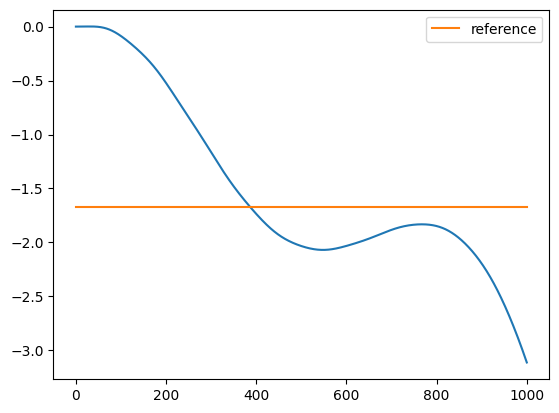

In [13]:
import matplotlib.pyplot as plt 

i = 5
plt.plot(controller_performance_sample.obs["obs"]["xpos_of_segment_end"][i])
plt.plot(controller_performance_sample.obs["ref"]["xpos_of_segment_end"][i], label="reference")
plt.legend()